# EDA Project Roadmap
## 1. Importing necessary libraries
    1. pandas for data processing
    2. numpy for mathematical operations
    3. matplotlib.plotly, seaborn & plotly.express for data vizualisations (instead if tableau)
## 2. get an overview and deep review of the data.
    1. using info & describe functions
    2. using head & tail functions to view the data
## 3. Handling missing values
    1. using isull.sum # Count missing values per column
    2. using heatmap sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
    3. fill or drop missing values according to the dataset and logic.
    4. check for outliets using sns.boxplot(x=data['column_name']) for numerical columns.
## 4. Data Structuring
    1. Creating required columns.
    2. changing the datatypes of the columns
## 5. vizualizing the data
    1. using seaborn and matplotlib to provide detailed vizulaisations
## 6. provide insights from vizualisations
    1. prepare a summery report including the insights.

# 1. **Introduction of the dataset and aim of the EDA**

<img src='https://storage.googleapis.com/kaggle-datasets-images/6184315/10039528/f855dd253c66d51e943834ed9ab9d155/dataset-cover.jpg?t=2024-11-28-11-57-32'></img>

## 1. **Dataset Introduction**

The dataset being analyzed contains approximately 1,5 million residential household sales from Denmark during the periode from 1992 to 2024

### Key Features:
- **date**: the transaction date.
- **house_id**: unique id for each house.
- **house_type**: Type of the house (categorical).
- **purchase_price'**: purchase price in DKK.
- **city**: location of the house.

## 2. **Aim of the EDA**

The primary aim of this **Exploratory Data Analysis (EDA)** is to explore the dataset and uncover patterns. Specifically, we will:
1. Analyze the distribution of key variables.
2. Identify missing values and handle them.
3. Investigate relationships between variables.
4. Detect any outliers or unusual patterns..

The insights from this EDA will help guide future modeling.

In [2]:
#EmpiricalDist helps you visualize and understand the distribution of variables, aiding in pattern recognition, understanding skewness, and making decisions about data transformations or statistical assumptions.
!pip install empiricaldist

In [3]:
#Missingno helps you identify, visualize, and understand missing data patterns in your dataset, enabling you to make informed decisions about how to handle missing values during preprocessing.
!pip install missingno

In [4]:

# For example, here's several helpful packages to load

# Base libraries
import time
# #Function: Provides time-related functions, like time.sleep() for pausing execution, time.time() for getting the current time in seconds, and various ways to measure time intervals.
# When to Keep: Useful if you're timing certain processes (e.g., performance analysis).
# Can Disregard?: If you're not measuring execution time or working with time-related functionality in your analysis, you can safely omit it.

#import datetime
# Function: Provides classes for manipulating dates and times, such as datetime.datetime and datetime.timedelta. You can easily perform operations like adding days to a date or comparing two timestamps.
# When to Keep: If your data involves timestamps or you need to perform date/time manipulations, keep this.
# Can Disregard?: If you don't need to work with dates or times explicitly, you can disregard it.

#import os
# Function: Allows interaction with the operating system, such as navigating file directories, checking for files, or working with environment variables.
# When to Keep: If your workflow requires file management (reading/writing files, checking file paths), you should keep this.
# Can Disregard?: If you don't need to interact with the filesystem, you can discard this.

# Scientific libraries
import numpy as np
# Function: Core scientific computing library in Python. Provides support for large multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on them.
# When to Keep: Essential for numerical operations, array manipulation, statistical calculations, etc.
# Can Disregard?: It’s unlikely you’ll discard this unless you're working with data in only Pandas DataFrames and don’t need arrays or advanced math operations.

import pandas as pd
# Function: Provides data structures like DataFrame and Series for data manipulation, especially useful for handling structured data (e.g., CSVs, databases).
# When to Keep: Critical for most EDA tasks. Essential for handling tabular data, cleaning, and analyzing it.
# Can Disregard?: Rarely will you discard this, unless you’re not working with structured data (e.g., JSON, XML) and you use only basic Python data structures.

from empiricaldist import Cdf, Pmf
# Function: Provides tools for working with empirical distributions. Cdf is the cumulative distribution function, and Pmf is the probability mass function, both useful for visualizing and analyzing data distributions.
# When to Keep: Keep if you're working with empirical distributions and need advanced plotting/analysis of how data is distributed (e.g., histogram analysis, KDEs).
# Can Disregard?: If you don’t need to perform statistical distribution analysis or advanced visualizations, you can discard this.

# Visual libraries
import matplotlib.pyplot as plt
# Function: The core library for creating static, animated, and interactive visualizations in Python.
# When to Keep: Essential for basic plotting (line plots, bar plots, histograms).
# Can Disregard?: Unlikely to discard if you need any form of visualizations, but if you prefer using Seaborn or other libraries exclusively, you might omit this (though Seaborn internally uses Matplotlib).

#from matplotlib import rcParams
# Function: Allows you to customize the default settings of Matplotlib plots, such as figure size, font size, axis labels, etc.
# When to Keep: Useful for setting global style preferences and improving plot readability. Essential for customizing the appearance of your visualizations.
# Can Disregard?: If you're fine with default Matplotlib settings and don’t need advanced plot customizations, you can skip this.

import seaborn as sns
# Function: A high-level interface for creating attractive statistical plots built on top of Matplotlib. It’s especially great for visualizing relationships between variables, distributions, and categorical data.
# When to Keep: Highly recommended for creating aesthetic and informative plots. It's much easier to use than raw Matplotlib for many common plot types.
# Can Disregard?: Only if you prefer using other visualization libraries (e.g., Plotly, or Matplotlib only), but Seaborn is generally a good choice for EDA.

import missingno as msno  # Visualize missing values
# Function: A specialized library for visualizing missing data. It helps you quickly assess patterns and relationships of missingness in your dataset.
# When to Keep: Extremely useful during EDA if your data has missing values. It simplifies the process of understanding and visualizing missing data.
# Can Disregard?: If you don’t have missing data or plan to handle it using other methods, you might not need this.

# Helper libraries
#from tqdm.notebook import tqdm, trange
# Function: Provides progress bars for loops in Jupyter notebooks, making it easier to track long-running computations.
# When to Keep: Useful if you're performing long-running tasks like data processing or training machine learning models.
# Can Disregard?: If your workflow doesn’t involve long-running tasks or you don’t need progress bars, you can discard this.

#from colorama import Fore, Back, Style
# Function: Provides cross-platform support for colored terminal text output (useful for adding color to print statements in the terminal).
# When to Keep: Useful if you want to style terminal outputs for better readability (e.g., for debugging or logging).
# Can Disregard?: If you don't need colored text output in the terminal, you can omit this.

import warnings
warnings.filterwarnings('ignore')
# Function: Used to manage warnings. warnings.filterwarnings('ignore') suppresses warnings, often used in notebooks or scripts to keep output clean.
# When to Keep: Useful if you want to suppress non-critical warnings during your analysis (for example, ignoring warnings about deprecated functions).
# Can Disregard?: If you prefer to see warnings or don't mind them, you can omit this.

# Visual setup
#import matplotlib.ticker as ticker
# Function: Provides tools for customizing the tick marks and labels of Matplotlib plots (e.g., controlling the appearance of axis labels and tick intervals).
# When to Keep: Useful for advanced control over tick marks (e.g., making ticks more readable or changing their frequency).
# Can Disregard?: If you're okay with the default tick settings in your plots, you can omit this.

#plt.style.use('ggplot')
# Function: Applies the ggplot2 style (a popular R plotting style) to Matplotlib plots, giving them a more polished, aesthetically-pleasing appearance.
# When to Keep: Useful for improving the visual style of your plots without needing to manually adjust settings.
# Can Disregard?: If you don’t need this specific style or are happy with the default Matplotlib style, you can skip it.

# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
# rcParams['figure.figsize'] = [12, 9]
# rcParams['font.size'] = 16
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# Function: These commands customize global settings for Matplotlib to control figure size, font size, and axes spines.
# When to Keep: Essential if you want specific control over the appearance of all plots.
# Can Disregard?: If you don't need specific customizations, you can omit them.

# custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
# sns.set_palette(custom_colors)
# %config InlineBackend.figure_format = 'retina'
# %config Completer.use_jedi = False
# Function: Sets the color palette for Seaborn plots.
# When to Keep: If you want to set a custom color palette to maintain consistency in your plots.
# Can Disregard?: If you're fine with the default Seaborn palette, you can omit this.

# Pandas options
#pd.set_option('max_colwidth', 40)
# Function: Sets the maximum column width in Pandas DataFrame display (helpful for wide text fields).
# When to Keep: Useful when displaying large text columns (e.g., in Jupyter Notebooks).
# Can Disregard?: If you're not displaying wide columns or are fine with the default settings, you can omit this.

pd.options.display.max_columns = None  # Possible to limit
# Function: Allows displaying all columns in a Pandas DataFrame.
# When to Keep: Useful when you want to see all columns, especially in large DataFrames.
# Can Disregard?: If you're okay with limiting the number of columns displayed, you can omit this.

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
# Function: Controls the interactive shell behavior, such as enabling the display of all output from the last expression in a cell (for Jupyter).
# When to Keep: Useful in Jupyter Notebooks if you want all expressions in a cell to be printed (not just the last one).
# Can Disregard?: If you're not using Jupyter or don’t need this behavior, you can omit it.

# Seed value for numpy.random
np.random.seed(42)

# 2. get an overview and deep review of the data.

In [5]:
# read the data
df_raw = pd.read_parquet('H:\python\housing\DKHousingPrices.parquet')

In [6]:
df_raw.head()

date quarter  house_id   house_type    sales_type  year_build  \
0 2024-10-26  2024Q4         0        Villa  regular_sale        1974   
1 2024-10-26  2024Q4         2  Summerhouse  regular_sale        1956   
2 2024-10-26  2024Q4         1         Farm  regular_sale        1955   
3 2024-10-25  2024Q4         3    Apartment   family_sale        1945   
4 2024-10-25  2024Q4         4        Villa  regular_sale        1967   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0         4350000                                  0.0         5  215.0   
1          450000                                  0.0         3   36.0   
2         6600000                                  0.0         3  180.0   
3         1495000                                  0.0         2   64.0   
4         3375000                                  0.0         5  176.0   

      sqm_price                     address  zip_code        city  \
0  20232.558594               Kildevangen 5      8382    Hinnerup   
1  12500.000000                Lykkestien 2      4400  Kalundborg   
2  36666.667969               Sæderupvej 58      9260     Gistrup   
3  23359.375000  Tage-Hansens Gade 5, 1. tv      8000    Aarhus C   
4  19176.136719          Chr.Winthers Vej 5      8600   Silkeborg   

                 area   region  nom_interest_rate%  dk_ann_infl_rate%  \
0  East & mid jutland  Jutland                 3.1                NaN   
1       Other islands  Zealand                 3.1                NaN   
2       North jutland  Jutland                 3.1                NaN   
3  East & mid jutland  Jutland                 3.1                NaN   
4  East & mid jutland  Jutland                 3.1                NaN   

   yield_on_mortgage_credit_bonds%  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

In [7]:
# 0 'date': is the transaction date
# 1 'quarter': is the quarter based on a standard calendar year
# 2 'house_id': unique house id (could be dropped)
# 3 'house_type': can be 'Villa', 'Farm', 'Summerhouse', 'Apartment', 'Townhouse'
# 4 'sales_type': can be 'regular_sale', 'family_sale', 'other_sale', 'auction', '-' (“-“ could be dropped)
# 5 'year_build': range 1000 to 2024 (could be narrowed more)
# 6 'purchase_price': is purchase price in DKK
# 7 '%_change_between_offer_and_purchase': could differ negatively, be zero or positive
# 8 'no_rooms': number of rooms
# 9 'sqm': number of square meters
# 10 'sqm_price': 'purchase_price' divided by 'sqm_price'
# 11 'address': is the address
# 12 'zip_code': is the zip code
# 13 'city': is the city
# 14 'area': 'East & mid jutland', 'North jutland', 'Other islands', 'Capital, Copenhagen', 'South jutland', 'North Zealand', 'Fyn & islands', 'Bornholm'
# 15 'region': 'Jutland', 'Zealand', 'Fyn & islands', 'Bornholm'
# 16 'nom_interest_rate%': Danish nominal interest rate show pr. quarter however actual rate is not converted from annualized to quarterly
# 17 'dk_ann_infl_rate%': Danish annual inflation rate show pr. quarter however actual rate is not converted from annualized to quarterly
# 18 'yield_on_mortgage_credit_bonds%': 30 year mortgage bond rate (without spread)

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507908 entries, 0 to 1507907
Data columns (total 19 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   date                                 1507908 non-null  datetime64[ns]
 1   quarter                              1507908 non-null  period[Q-DEC] 
 2   house_id                             1507908 non-null  int64         
 3   house_type                           1507908 non-null  category      
 4   sales_type                           1507908 non-null  category      
 5   year_build                           1507908 non-null  int16         
 6   purchase_price                       1507908 non-null  int32         
 7   %_change_between_offer_and_purchase  1507908 non-null  float32       
 8   no_rooms                             1507908 non-null  int8          
 9   sqm                                  1507906 non-null  fl

In [9]:
df_raw.describe()

date      house_id    year_build  \
count                        1507908  1.507908e+06  1.507908e+06   
mean   2012-10-18 21:00:05.987633664  7.539535e+05  1.954943e+03   
min              1992-01-05 00:00:00  0.000000e+00  1.000000e+03   
25%              2005-09-06 00:00:00  3.769768e+05  1.931000e+03   
50%              2015-03-15 00:00:00  7.539535e+05  1.965000e+03   
75%              2020-09-23 00:00:00  1.130930e+06  1.980000e+03   
max              2024-10-26 00:00:00  1.507907e+06  2.024000e+03   
std                              NaN  4.352957e+05  4.584169e+01   

       purchase_price  %_change_between_offer_and_purchase      no_rooms  \
count    1.507908e+06                         1.507908e+06  1.507908e+06   
mean     1.915469e+06                        -2.078361e+00  4.371574e+00   
min      2.500100e+05                        -4.900000e+01  1.000000e+00   
25%      8.000000e+05                        -3.000000e+00  3.000000e+00   
50%      1.400000e+06                         0.000000e+00  4.000000e+00   
75%      2.450000e+06                         0.000000e+00  5.000000e+00   
max      4.680000e+07                         4.900000e+01  1.500000e+01   
std      1.765654e+06                         4.793036e+00  1.650485e+00   

                sqm     sqm_price      zip_code  nom_interest_rate%  \
count  1.507906e+06  1.507906e+06  1.507908e+06        1.507908e+06   
mean   1.292528e+02  1.634525e+04  5.959594e+03        1.679423e+00   
min    2.600000e+01  2.698574e+02  1.050000e+03        0.000000e+00   
25%    8.900000e+01  6.741573e+03  4.000000e+03        0.000000e+00   
50%    1.230000e+02  1.200658e+04  6.000000e+03        7.500000e-01   
75%    1.600000e+02  2.131783e+04  8.260000e+03        3.250000e+00   
max    9.970000e+02  7.500000e+04  9.990000e+03        9.500000e+00   
std    5.715229e+01  1.362068e+04  2.369319e+03        2.041650e+00   

       dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  
count       1.506715e+06                     1.506715e+06  
mean        1.929928e+00                     4.112551e+00  
min         2.500000e-01                     1.100000e+00  
25%         7.900000e-01                     2.120000e+00  
50%         1.850000e+00                     4.340000e+00  
75%         2.340000e+00                     5.500000e+00  
max         7.700000e+00                     1.014000e+01  
std         1.634174e+00                     2.198248e+00

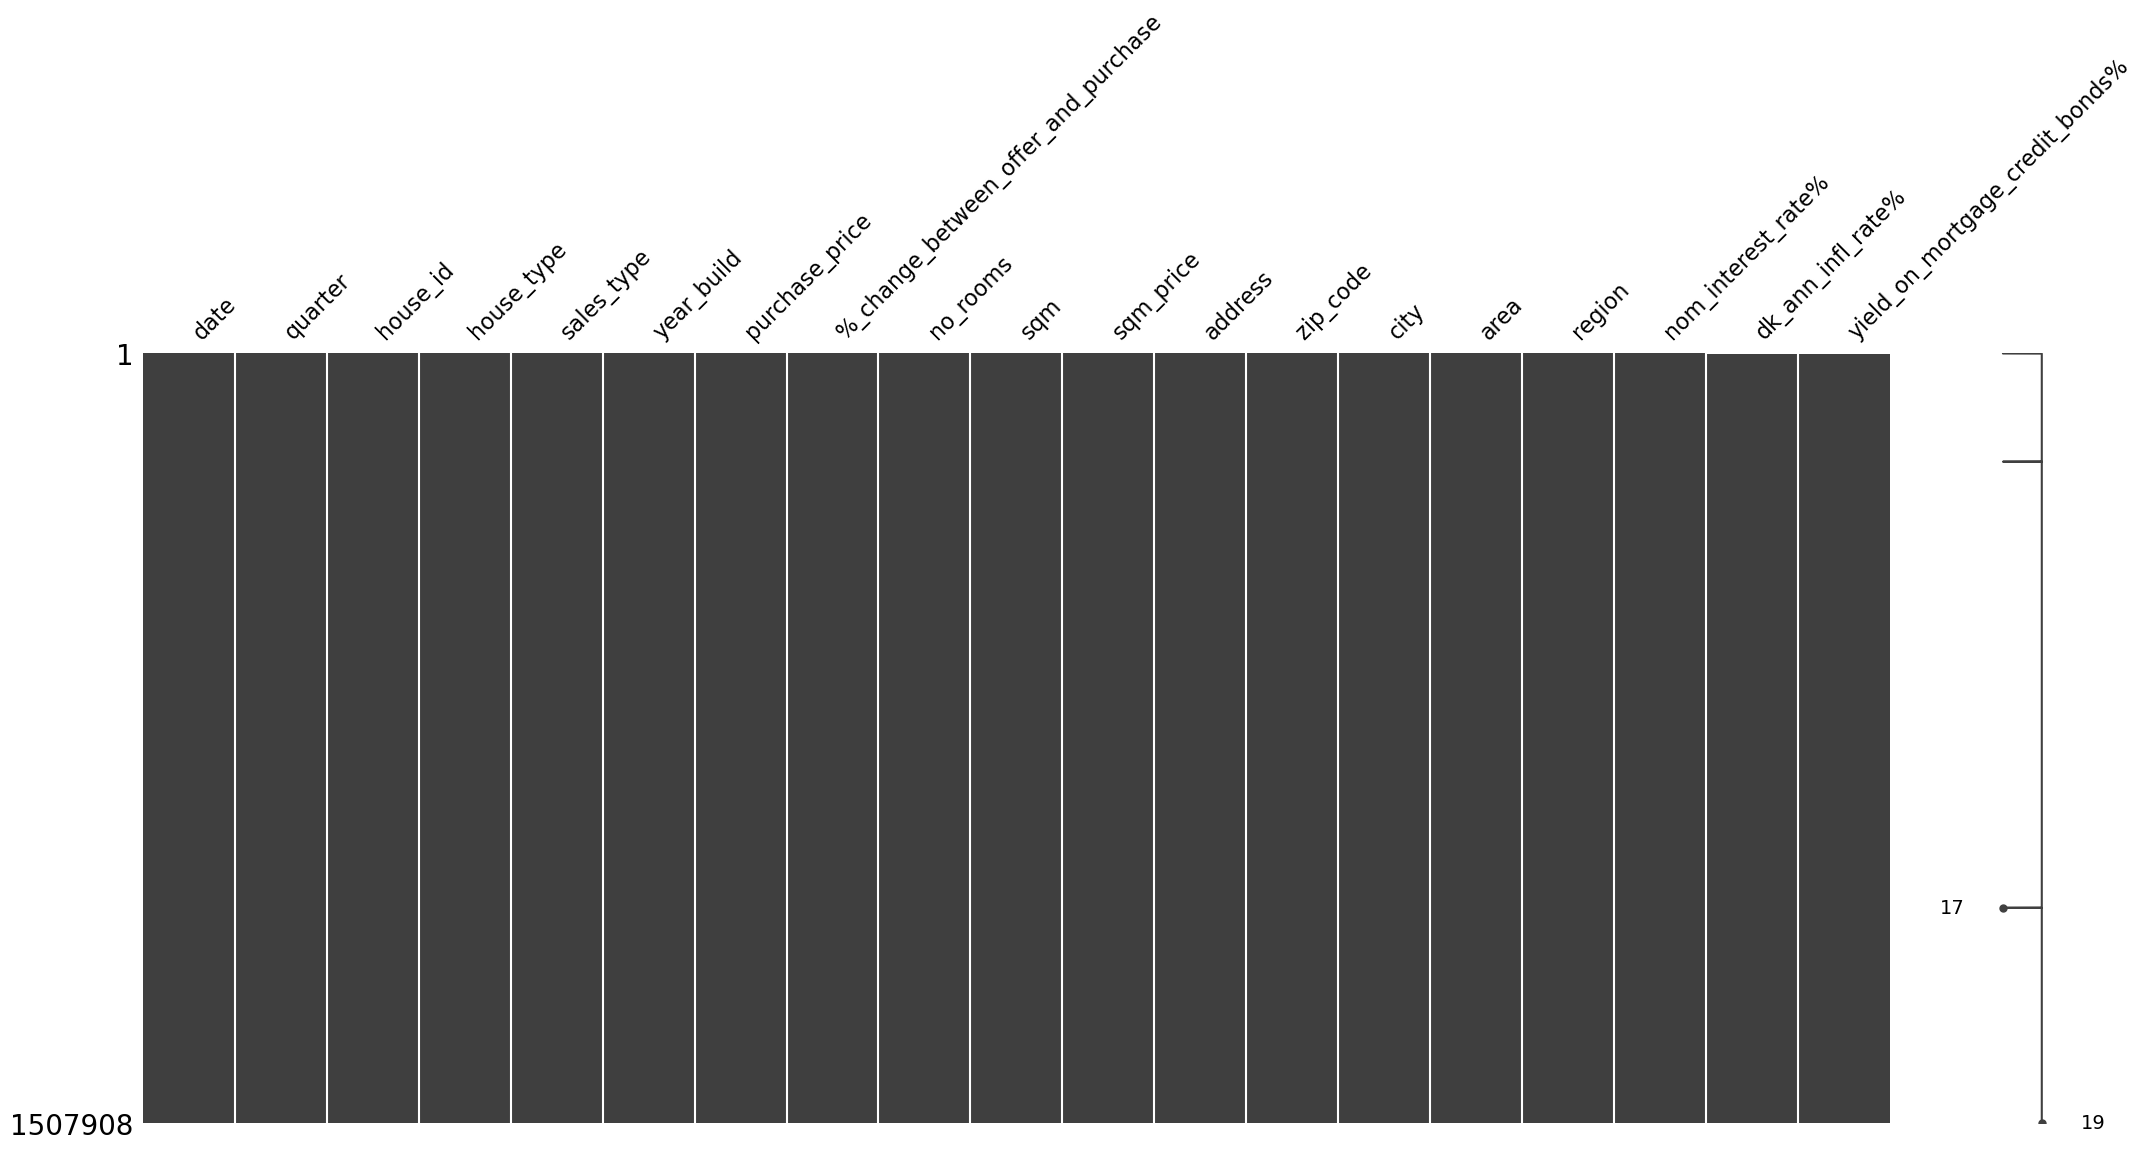

In [10]:
# visualize missing values
msno.matrix(df_raw);

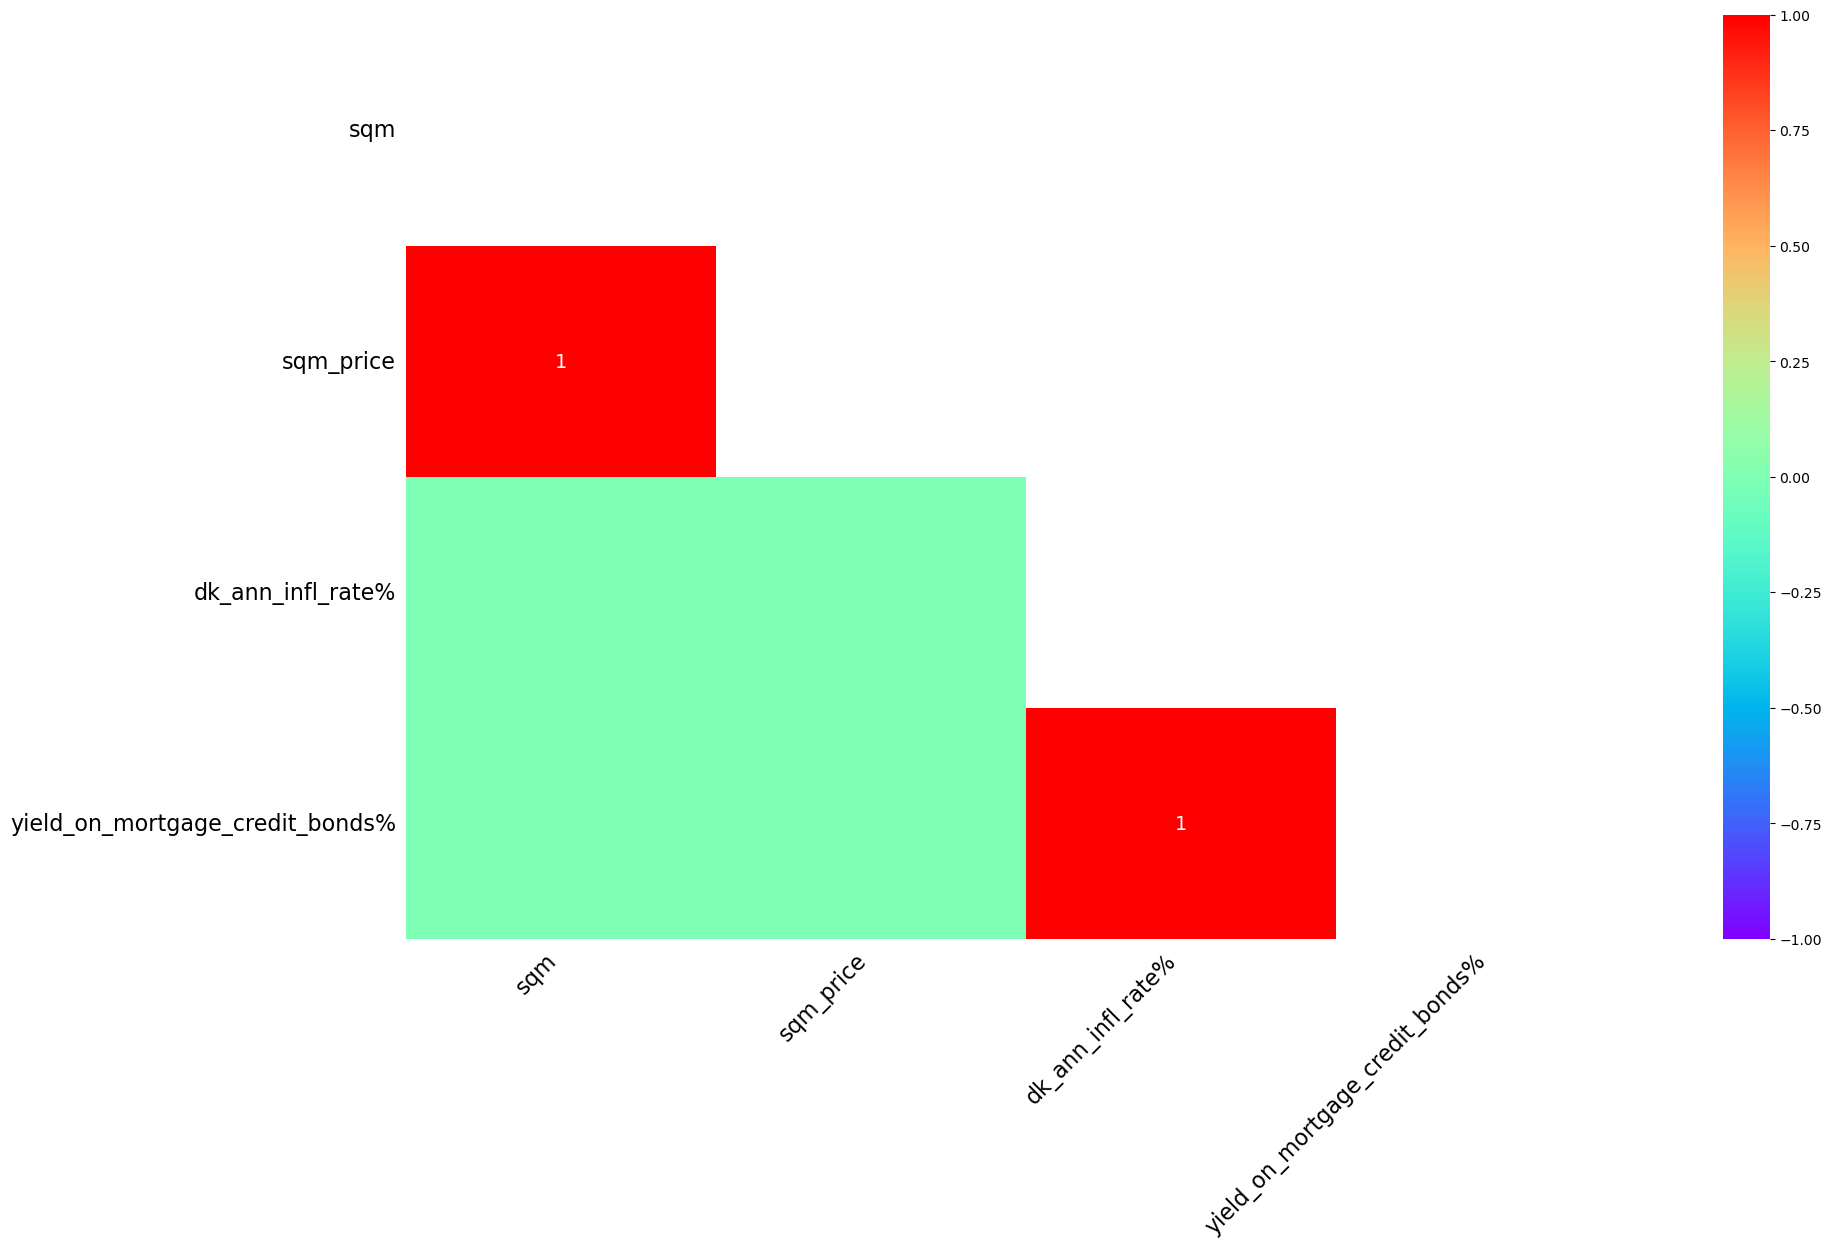

In [11]:
msno.heatmap(df_raw, cmap='rainbow');

In [12]:
df_raw.isnull().sum()

date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       2
sqm_price                                 2
address                                   0
zip_code                                  0
city                                      0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                      1193
yield_on_mortgage_credit_bonds%        1193
dtype: int64

In [13]:
df_raw.sample(5)

date quarter  house_id   house_type    sales_type  year_build  \
181839  2022-06-20  2022Q2    170811        Villa   family_sale        2004   
1358524 1998-10-14  1998Q4   1354316    Apartment  regular_sale        1999   
1068900 2007-01-30  2007Q1   1062263  Summerhouse  regular_sale        1993   
413648  2020-06-01  2020Q2    404565        Villa  regular_sale        1900   
1237802 2002-12-07  2002Q4   1233523    Apartment  regular_sale        1939   

         purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
181839           816000                                  0.0         5   98.0   
1358524         1777000                                  0.0         3  108.0   
1068900         1550000                                  0.0         3   63.0   
413648          1465000                                 -1.0         5  232.0   
1237802          717780                                  0.0         2   39.0   

            sqm_price                       address  zip_code           city  \
181839    8326.530273  Marina Fiskenæs Feriepark 18      6300        Gråsten   
1358524  16453.703125                  Nordkajen 16      3600  Frederikssund   
1068900  24603.173828                 Ringvejen 157      6792           Rømø   
413648    6314.655273                   Hustedvej 1      6880           Tarm   
1237802  18404.615234        Ringkøbingvej 6, 1. tv      8000       Aarhus C   

                       area   region  nom_interest_rate%  dk_ann_infl_rate%  \
181839        South jutland  Jutland                0.00               7.70   
1358524       North Zealand  Zealand                4.25               1.85   
1068900       South jutland  Jutland                3.50               1.69   
413648        South jutland  Jutland                0.00               0.42   
1237802  East & mid jutland  Jutland                3.25               2.42   

         yield_on_mortgage_credit_bonds%  
181839                              3.73  
1358524                             6.27  
1068900                             5.70  
413648                              1.10  
1237802                             6.69

In [14]:
df_raw.dtypes

date                                   datetime64[ns]
quarter                                 period[Q-DEC]
house_id                                        int64
house_type                                   category
sales_type                                   category
year_build                                      int16
purchase_price                                  int32
%_change_between_offer_and_purchase           float32
no_rooms                                         int8
sqm                                           float32
sqm_price                                     float32
address                                        object
zip_code                                        int16
city                                           object
area                                         category
region                                       category
nom_interest_rate%                            float32
dk_ann_infl_rate%                             float32
yield_on_mortgage_credit_bon

### Issues List For the Dataset
- Missing values in several cols: sqm, sqm_price, dk_ann_infl_rate% and dk_ann_infl_rate%
- update column names to be more appropriate.
- extract year, quarter, month and day from the date column.
- check for extra white spaces and remove them
- Drop these columns: quarter, address, zip_code

## 4. Handling missing values and Data Structuring

In [15]:
df = df_raw.copy()

### 4.1. update column names to be more appropriate

In [16]:
df.columns

Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'address', 'zip_code', 'city', 'area', 'region',
       'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%'],
      dtype='object')

In [17]:
updated_columns = {
    'date': 'purchase_date',
    'year_build': 'year_built',
    '%_change_between_offer_and_purchase': 'offer_to_purchase_change_percent',
    'no_rooms': 'number_of_rooms',
    'sqm': 'house_size_sqm',
    'sqm_price': 'house_sqm_price',
    'nom_interest_rate%': 'nominal_interest_rate_percent',
    'dk_ann_infl_rate%': 'dk_annual_inflation_rate_percent',
    'yield_on_mortgage_credit_bonds%': 'yield_on_mortgage_bonds_percent'
}

In [18]:
#update the column name
df.rename(columns=updated_columns, inplace=True)

In [19]:
df.columns

Index(['purchase_date', 'quarter', 'house_id', 'house_type', 'sales_type',
       'year_built', 'purchase_price', 'offer_to_purchase_change_percent',
       'number_of_rooms', 'house_size_sqm', 'house_sqm_price', 'address',
       'zip_code', 'city', 'area', 'region', 'nominal_interest_rate_percent',
       'dk_annual_inflation_rate_percent', 'yield_on_mortgage_bonds_percent'],
      dtype='object')

### 4.2. extract year, quarter, month and day from the date column.

In [20]:
df['purchase_year'] = df['purchase_date'].dt.year
df['purchase_quarter'] = df['purchase_date'].dt.quarter
df['purchase_month'] = df['purchase_date'].dt.strftime('%b')
df['purchase_day'] = pd.to_datetime(df['purchase_date']).dt.day_name()

In [21]:
df.columns

Index(['purchase_date', 'quarter', 'house_id', 'house_type', 'sales_type',
       'year_built', 'purchase_price', 'offer_to_purchase_change_percent',
       'number_of_rooms', 'house_size_sqm', 'house_sqm_price', 'address',
       'zip_code', 'city', 'area', 'region', 'nominal_interest_rate_percent',
       'dk_annual_inflation_rate_percent', 'yield_on_mortgage_bonds_percent',
       'purchase_year', 'purchase_quarter', 'purchase_month', 'purchase_day'],
      dtype='object')

### 4.3. check for extra white spaces and remove them

In [22]:
# Check for extra white spaces in the entire DataFrame
df.map(lambda x: isinstance(x, str) and x.strip() != x).any()
#This will return True for columns that have extra spaces.

purchase_date                       False
quarter                             False
house_id                            False
house_type                          False
sales_type                          False
year_built                          False
purchase_price                      False
offer_to_purchase_change_percent    False
number_of_rooms                     False
house_size_sqm                      False
house_sqm_price                     False
address                             False
zip_code                            False
city                                False
area                                False
region                              False
nominal_interest_rate_percent       False
dk_annual_inflation_rate_percent    False
yield_on_mortgage_bonds_percent     False
purchase_year                       False
purchase_quarter                    False
purchase_month                      False
purchase_day                        False
dtype: bool

### 4.4. Drop these columns: quarter, address, zip_code

In [23]:
df = df.drop(columns = ['quarter', 'address', 'zip_code'])

In [24]:
df.sample(5)

purchase_date  house_id   house_type    sales_type  year_built  \
470303     2019-09-29    461750  Summerhouse  regular_sale        2022   
739905     2015-06-05    733412    Townhouse  regular_sale        2015   
68817      2023-12-04     52977        Villa  regular_sale        1988   
1454795    1994-11-03   1452770    Apartment  regular_sale        1981   
1230608    2003-03-07   1226351        Villa  regular_sale        1900   

         purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
470303          2525000                               0.0                3   
739905          3445000                               0.0                4   
68817           2750000                              -2.0                5   
1454795         1219130                               0.0                3   
1230608          780000                               0.0                3   

         house_size_sqm  house_sqm_price            city                 area  \
470303            138.0     18297.101562  Sjællands Odde        Other islands   
739905            122.0     28237.705078         Værløse        North Zealand   
68817             152.0     18092.105469         Horsens   East & mid jutland   
1454795           100.0     12191.299805   Rungsted Kyst  Capital, Copenhagen   
1230608            86.0      9069.767578         Løsning   East & mid jutland   

          region  nominal_interest_rate_percent  \
470303   Zealand                           0.00   
739905   Zealand                           0.00   
68817    Jutland                           3.60   
1454795  Zealand                           5.00   
1230608  Jutland                           2.75   

         dk_annual_inflation_rate_percent  yield_on_mortgage_bonds_percent  \
470303                               0.76                             1.35   
739905                               0.45                             2.78   
68817                                3.31                             4.79   
1454795                              1.99                             8.39   
1230608                              2.08                             5.11   

         purchase_year  purchase_quarter purchase_month purchase_day  
470303            2019                 3            Sep       Sunday  
739905            2015                 2            Jun       Friday  
68817             2023                 4            Dec       Monday  
1454795           1994                 4            Nov     Thursday  
1230608           2003                 1            Mar       Friday

In [25]:
#df.to_csv('dk_housing_prices.csv', index=False)

### 4.6. separating the dataframes due to inputs from before year 1800

In [26]:
# Define the cutoff years
cutoff_year_farms = 1800
cutoff_year_non_farms = 1900

# 1. Farms only, built from year 1800 onward
farms_after_1800 = df[(df['house_type'] == 'Farm') & (df['year_built'] >= cutoff_year_farms)].copy()

# 2. Farms only, built before year 1800
farms_before_1800 = df[(df['house_type'] == 'Farm') & (df['year_built'] < cutoff_year_farms)].copy()

# 3. Non-farms, built from year 1900 onward
non_farms_after_1900 = df[(df['house_type'] != 'Farm') & (df['year_built'] >= cutoff_year_non_farms)].copy()

# 4. Non-farms, built before year 1900
non_farms_before_1900 = df[(df['house_type'] != 'Farm') & (df['year_built'] < cutoff_year_non_farms)].copy()

# Display the shapes of the DataFrames to confirm
print(f"Farms built from 1800 onward: {farms_after_1800.shape[0]}")
print(f"Farms built before 1800: {farms_before_1800.shape[0]}")
print(f"Non-farms built from 1900 onward: {non_farms_after_1900.shape[0]}")
print(f"Non-farms built before 1900: {non_farms_before_1900.shape[0]}")

Farms built from 1800 onward: 72381
Farms built before 1800: 1566
Non-farms built from 1900 onward: 1320522
Non-farms built before 1900: 113439


In [27]:
# List of dataframes and their corresponding titles
dataframes_list = [
    farms_after_1800,
    farms_before_1800,
    non_farms_after_1900,
    non_farms_before_1900
]

## 5. vizualizing the data

In [28]:
for i, df in enumerate(dataframes_list, 1):
    print(f"DataFrame {i} - .head():")
    display(df.head())

DataFrame 1 - .head():


purchase_date  house_id house_type    sales_type  year_built  \
2      2024-10-26         1       Farm  regular_sale        1955   
57     2024-10-23        36       Farm   family_sale        1972   
61     2024-10-23        40       Farm  regular_sale        1943   
152    2024-10-20       139       Farm  regular_sale        1942   
161    2024-10-20       140       Farm    other_sale        1928   

     purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
2           6600000                               0.0                3   
57         10000000                               0.0                7   
61           998000                               0.0                4   
152          310000                               0.0                7   
161         3816875                               0.0                6   

     house_size_sqm  house_sqm_price      city           area   region  \
2             180.0     36666.667969   Gistrup  North jutland  Jutland   
57            262.0     38167.937500   Thisted  South jutland  Jutland   
61            154.0      6480.519531     Farsø  North jutland  Jutland   
152           223.0      1390.134521   Føvling  South jutland  Jutland   
161           218.0     17508.601562  Helsinge  North Zealand  Zealand   

     nominal_interest_rate_percent  dk_annual_inflation_rate_percent  \
2                              3.1                               NaN   
57                             3.1                               NaN   
61                             3.1                               NaN   
152                            3.1                               NaN   
161                            3.1                               NaN   

     yield_on_mortgage_bonds_percent  purchase_year  purchase_quarter  \
2                                NaN           2024                 4   
57                               NaN           2024                 4   
61                               NaN           2024                 4   
152                              NaN           2024                 4   
161                              NaN           2024                 4   

    purchase_month purchase_day  
2              Oct     Saturday  
57             Oct    Wednesday  
61             Oct    Wednesday  
152            Oct       Sunday  
161            Oct       Sunday

DataFrame 2 - .head():


purchase_date  house_id house_type    sales_type  year_built  \
625     2024-10-08       597       Farm  regular_sale        1725   
2343    2024-09-22     40400       Farm  regular_sale        1750   
2950    2024-09-17     41192       Farm  regular_sale        1700   
3712    2024-09-12     41746       Farm  regular_sale        1773   
3923    2024-09-11     41960       Farm  regular_sale        1775   

      purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
625           850000                               0.0                4   
2343         1695000                               0.0                3   
2950         2800000                               0.0                8   
3712         3750000                               0.0                7   
3923         1800000                               0.0                7   

      house_size_sqm  house_sqm_price        city                area  \
625            105.0      8095.238281      Knebel  East & mid jutland   
2343            92.0     18423.912109  Astermarie            Bornholm   
2950           202.0     13861.385742      Vojens       South jutland   
3712           155.0     24193.548828     Bogø By       Other islands   
3923           235.0      7659.574707    Nordborg       South jutland   

        region  nominal_interest_rate_percent  \
625    Jutland                           3.10   
2343  Bornholm                           3.35   
2950   Jutland                           3.35   
3712   Zealand                           3.35   
3923   Jutland                           3.35   

      dk_annual_inflation_rate_percent  yield_on_mortgage_bonds_percent  \
625                                NaN                              NaN   
2343                              1.13                             4.34   
2950                              1.13                             4.34   
3712                              1.13                             4.34   
3923                              1.13                             4.34   

      purchase_year  purchase_quarter purchase_month purchase_day  
625            2024                 4            Oct      Tuesday  
2343           2024                 3            Sep       Sunday  
2950           2024                 3            Sep      Tuesday  
3712           2024                 3            Sep     Thursday  
3923           2024                 3            Sep    Wednesday

DataFrame 3 - .head():


purchase_date  house_id   house_type    sales_type  year_built  \
0    2024-10-26         0        Villa  regular_sale        1974   
1    2024-10-26         2  Summerhouse  regular_sale        1956   
3    2024-10-25         3    Apartment   family_sale        1945   
4    2024-10-25         4        Villa  regular_sale        1967   
5    2024-10-24        14        Villa  regular_sale        1979   

   purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
0         4350000                               0.0                5   
1          450000                               0.0                3   
3         1495000                               0.0                2   
4         3375000                               0.0                5   
5         3000000                               0.0                6   

   house_size_sqm  house_sqm_price        city                area   region  \
0           215.0     20232.558594    Hinnerup  East & mid jutland  Jutland   
1            36.0     12500.000000  Kalundborg       Other islands  Zealand   
3            64.0     23359.375000    Aarhus C  East & mid jutland  Jutland   
4           176.0     19176.136719   Silkeborg  East & mid jutland  Jutland   
5           208.0     14423.077148       Odder  East & mid jutland  Jutland   

   nominal_interest_rate_percent  dk_annual_inflation_rate_percent  \
0                            3.1                               NaN   
1                            3.1                               NaN   
3                            3.1                               NaN   
4                            3.1                               NaN   
5                            3.1                               NaN   

   yield_on_mortgage_bonds_percent  purchase_year  purchase_quarter  \
0                              NaN           2024                 4   
1                              NaN           2024                 4   
3                              NaN           2024                 4   
4                              NaN           2024                 4   
5                              NaN           2024                 4   

  purchase_month purchase_day  
0            Oct     Saturday  
1            Oct     Saturday  
3            Oct       Friday  
4            Oct       Friday  
5            Oct     Thursday

DataFrame 4 - .head():


purchase_date  house_id house_type    sales_type  year_built  \
15    2024-10-24        13  Apartment  regular_sale        1885   
47    2024-10-23        25  Apartment   family_sale        1896   
48    2024-10-23        26  Apartment   family_sale        1896   
54    2024-10-23        24  Townhouse  regular_sale        1777   
76    2024-10-22        97      Villa  regular_sale        1870   

    purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
15         3400000                               0.0                2   
47          640000                               0.0                4   
48          640000                               0.0                2   
54          675000                               0.0                3   
76          550000                               0.0                5   

    house_size_sqm  house_sqm_price             city                 area  \
15            46.0     73913.046875  Frederiksberg C  Capital, Copenhagen   
47            84.0      7619.047852       Nykøbing F        Other islands   
48            33.0     19393.939453       Nykøbing F        Other islands   
54            49.0     13775.509766        Rudkøbing        Fyn & islands   
76           117.0      4700.854492         Avernakø        Fyn & islands   

           region  nominal_interest_rate_percent  \
15        Zealand                            3.1   
47        Zealand                            3.1   
48        Zealand                            3.1   
54  Fyn & islands                            3.1   
76  Fyn & islands                            3.1   

    dk_annual_inflation_rate_percent  yield_on_mortgage_bonds_percent  \
15                               NaN                              NaN   
47                               NaN                              NaN   
48                               NaN                              NaN   
54                               NaN                              NaN   
76                               NaN                              NaN   

    purchase_year  purchase_quarter purchase_month purchase_day  
15           2024                 4            Oct     Thursday  
47           2024                 4            Oct    Wednesday  
48           2024                 4            Oct    Wednesday  
54           2024                 4            Oct    Wednesday  
76           2024                 4            Oct      Tuesday

### 5.1. Univariate Analysis

In [29]:
dataframes = [
    ("Farms Built From 1800 Onward", farms_after_1800),
    ("Farms Built Before 1800", farms_before_1800),
    ("Non-Farms Built From 1900 Onward", non_farms_after_1900),
    ("Non-Farms Built Before 1900", non_farms_before_1900)
]

In [30]:
# farms_after_1800 = farms_after_1800[(farms_after_1800['house_type'] == 'Farm') &(farms_after_1800['house_type'].notna())]
# farms_before_1800 = farms_before_1800[(farms_before_1800['house_type'] == 'Farm') &(farms_before_1800['house_type'].notna())]
# non_farms_after_1900 = non_farms_after_1900[(non_farms_after_1900['house_type'] != 'Farm') & (non_farms_after_1900['house_type'].notna())]
# non_farms_before_1900 = non_farms_before_1900[(non_farms_before_1900['house_type'] != 'Farm') & (non_farms_before_1900['house_type'].notna())]

In [31]:
for title, df in dataframes:
    # Convert 'house_type' to categorical
    df['house_type'] = pd.Categorical(df['house_type'])
    # Remove categories with zero counts
    df['house_type'] = df['house_type'].cat.remove_categories(df['house_type'].value_counts()[df['house_type'].value_counts() == 0].index)

In [32]:
farms_after_1800['house_type'].value_counts()

house_type
Farm    72381
Name: count, dtype: int64

#### 5.1.1. house_type Distribution

Farms Built From 1800 Onward


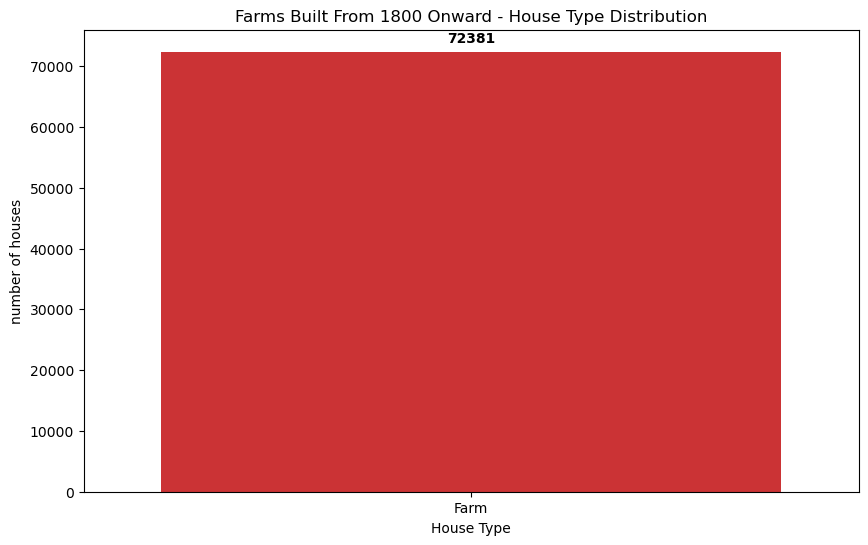

Farms Built Before 1800


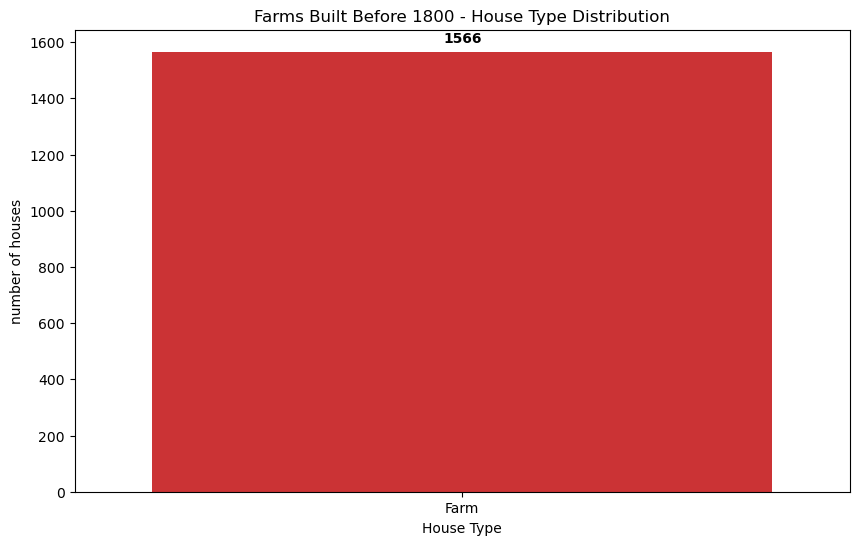

Non-Farms Built From 1900 Onward


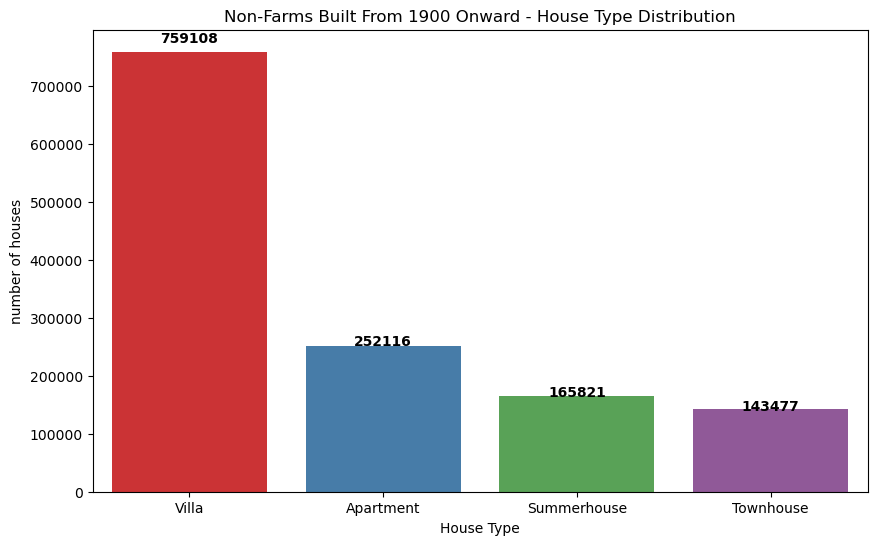

Non-Farms Built Before 1900


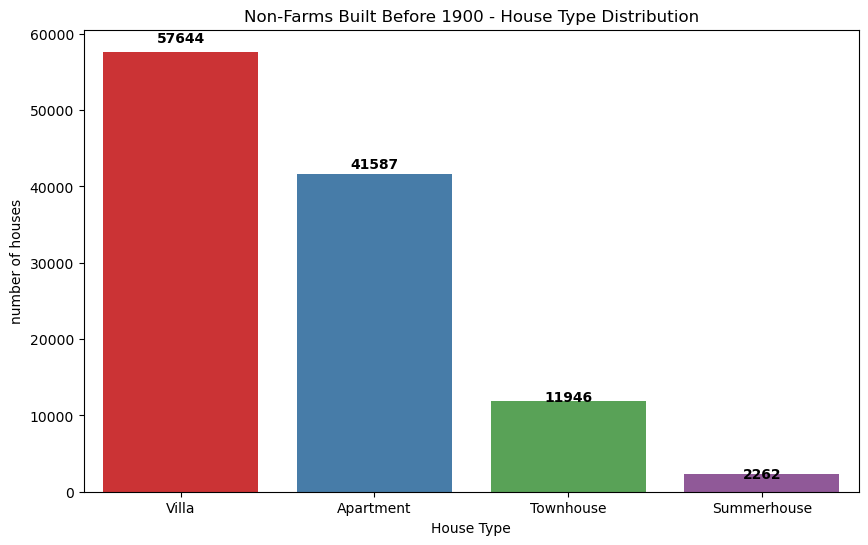

In [33]:
for title, df in dataframes:
    print(title)
    # Count the occurrences of each 'house_type'
    house_type_counts = df['house_type'].value_counts()
    # Sort the categories by count in descending order
    sorted_categories = house_type_counts.index
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='house_type', palette='Set1', order=sorted_categories)
    ax.set_title(f"{title} - House Type Distribution")
    ax.set_xlabel('House Type')
    ax.set_ylabel('number of houses')
    # Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.03, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    plt.show()

#### 5.1.2. Distribution of sales type

Farms Built From 1800 Onward


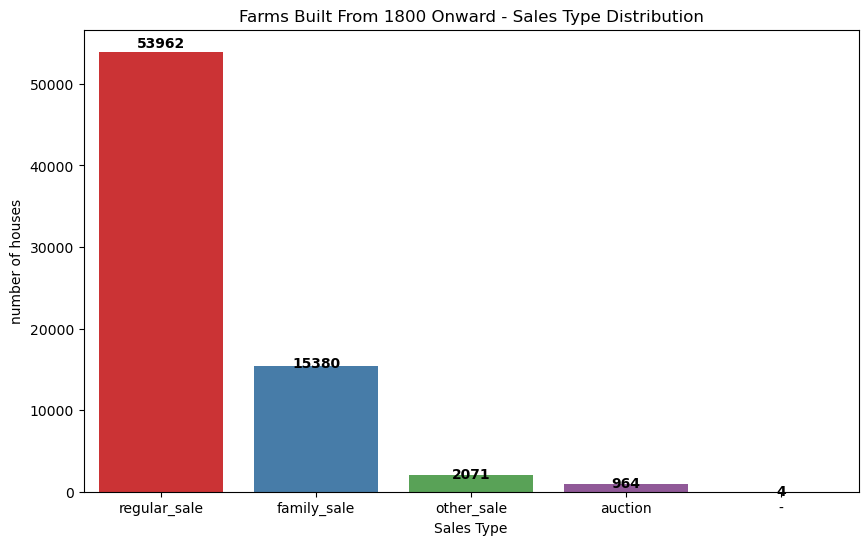

Farms Built Before 1800


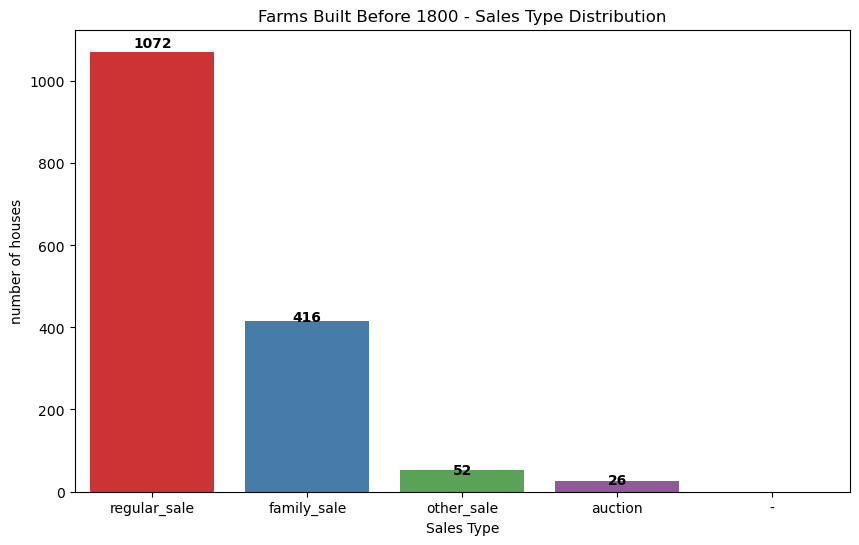

Non-Farms Built From 1900 Onward


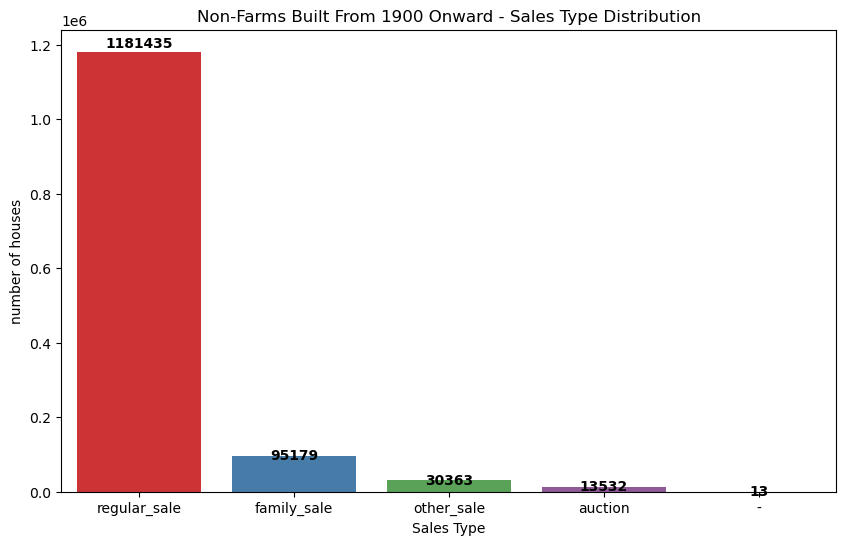

Non-Farms Built Before 1900


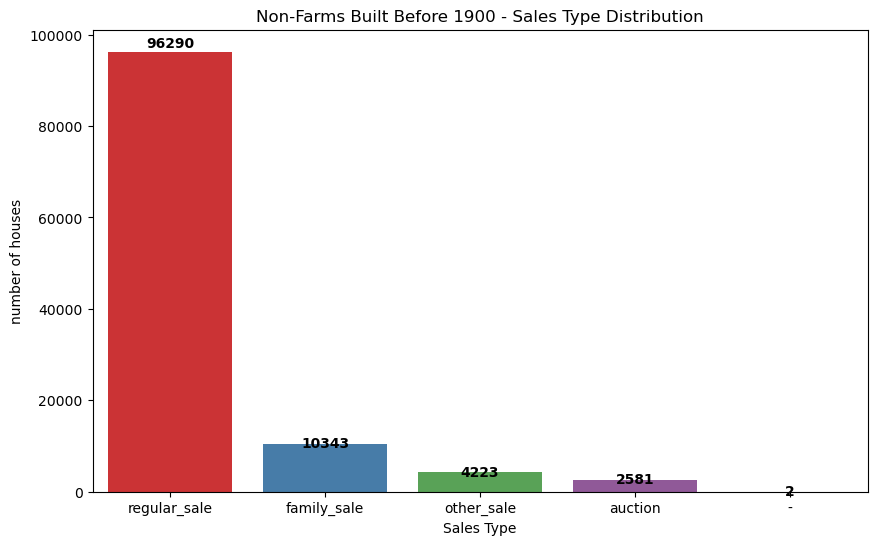

In [34]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    sales_type_counts = df['sales_type'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_sales_categories = sales_type_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='sales_type', palette='Set1', order=sorted_sales_categories)
    
    ax.set_title(f"{title} - Sales Type Distribution")
    ax.set_xlabel('Sales Type')
    ax.set_ylabel('number of houses')
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.3. Distribution of year built

Farms Built From 1800 Onward


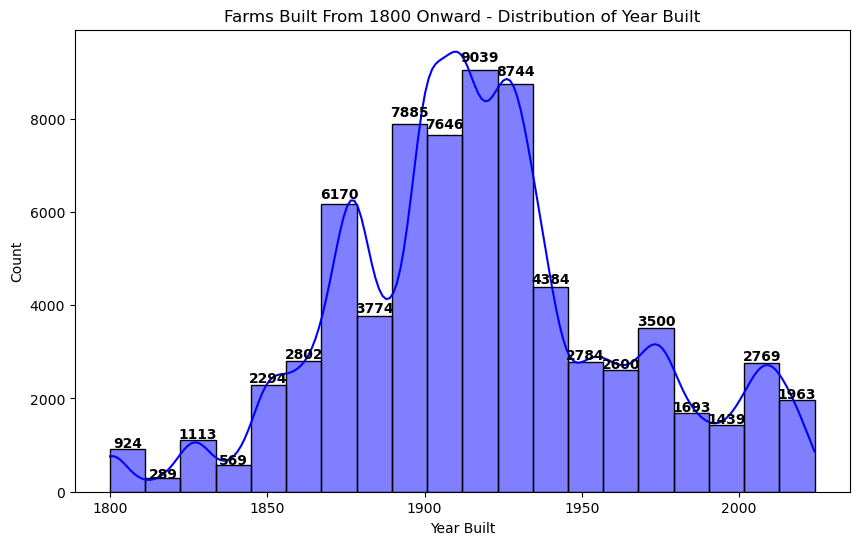

Farms Built Before 1800


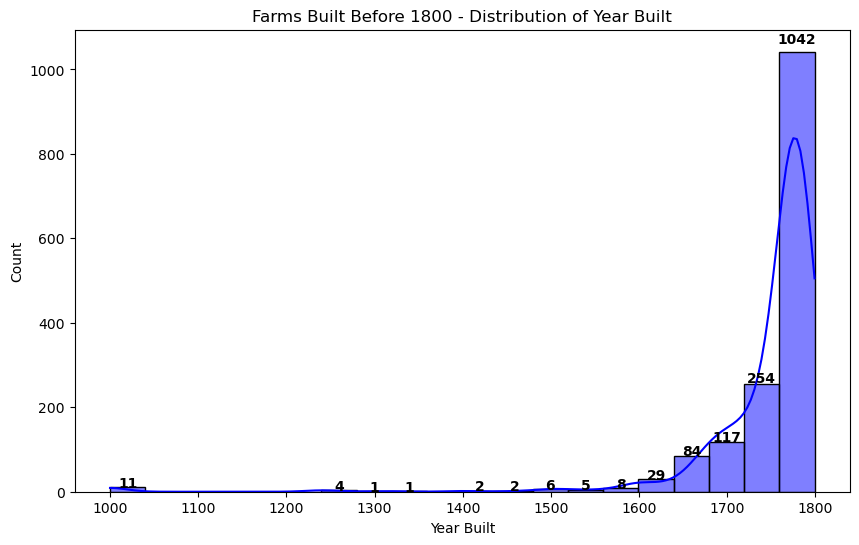

Non-Farms Built From 1900 Onward


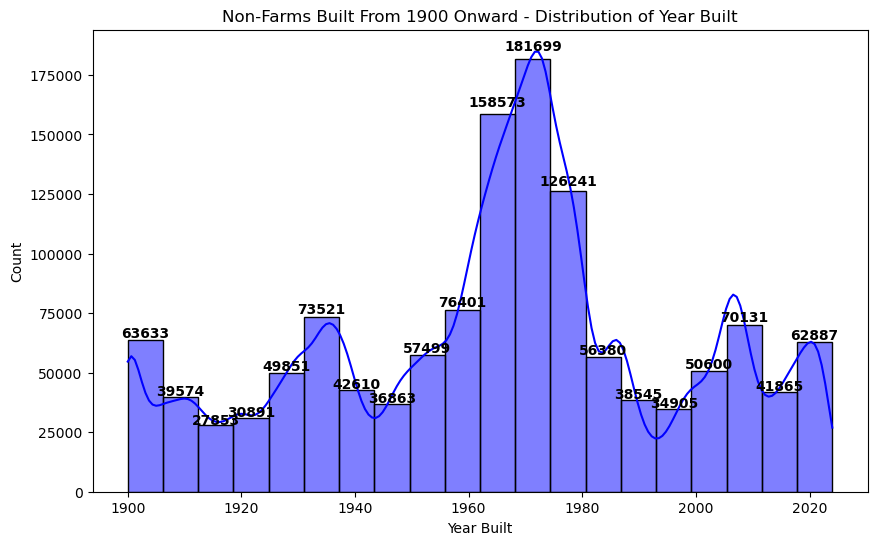

Non-Farms Built Before 1900


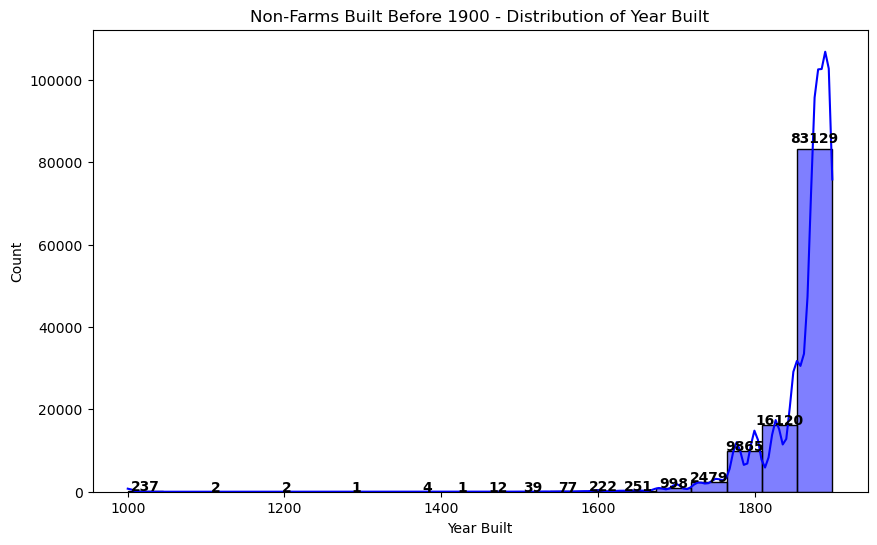

In [35]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='year_built', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of Year Built")
    plt.xlabel('Year Built')
    plt.ylabel('Count')
    plt.show()

#### 5.1.4. Distribution of purchase price

Farms Built From 1800 Onward


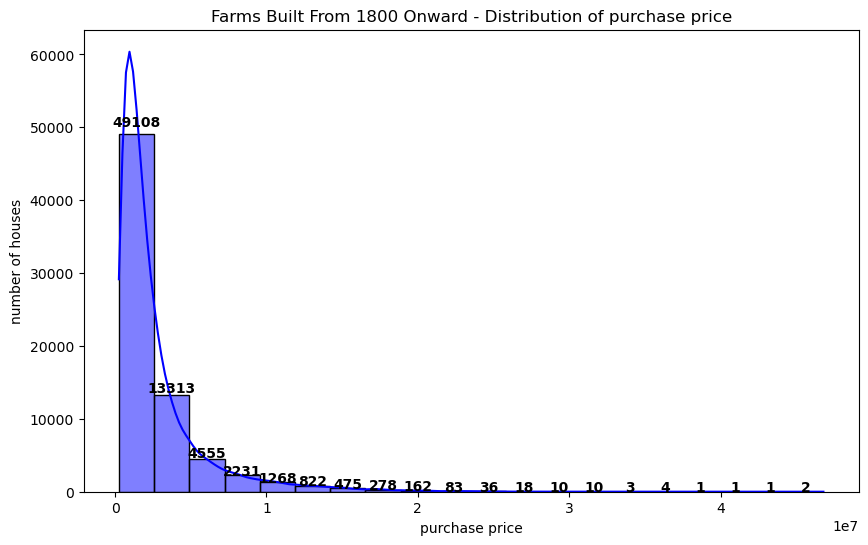

Farms Built Before 1800


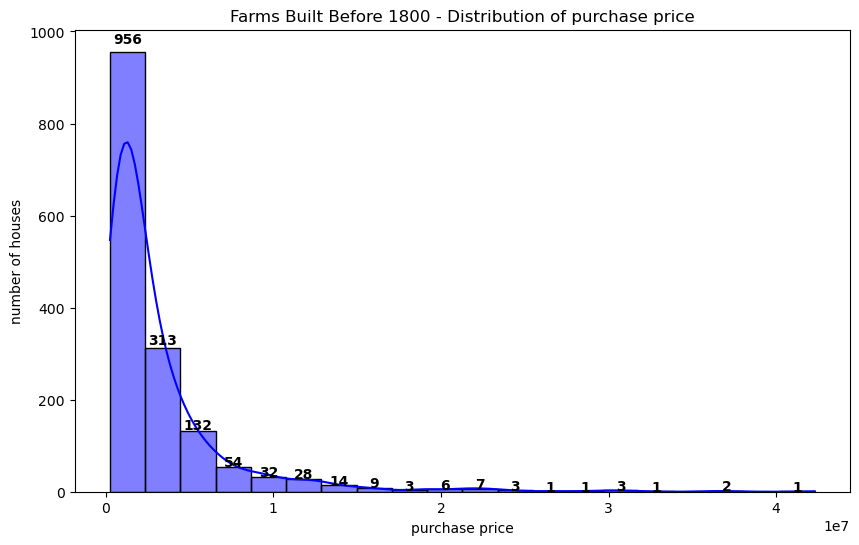

Non-Farms Built From 1900 Onward


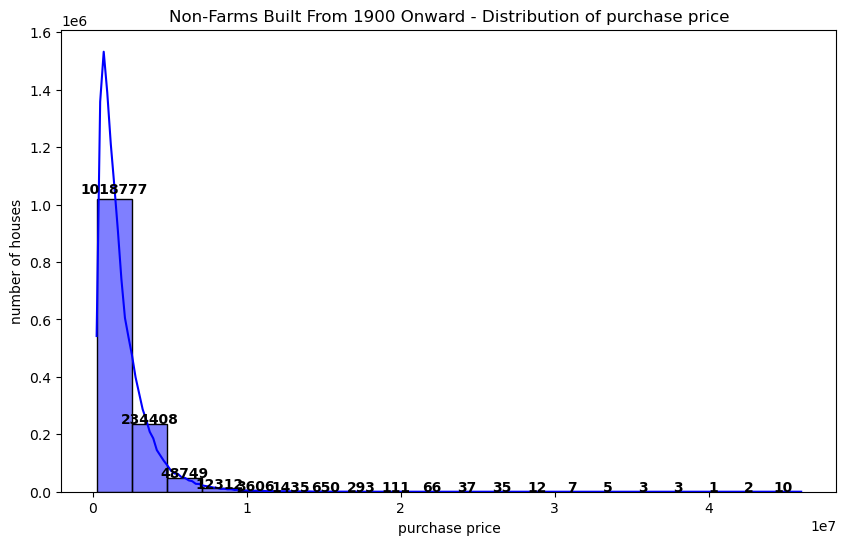

Non-Farms Built Before 1900


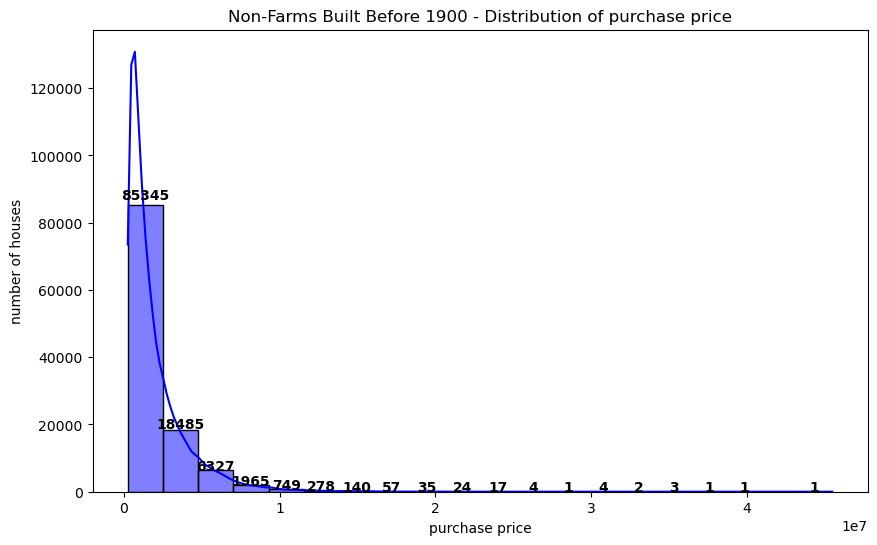

In [36]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='purchase_price', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of purchase price")
    plt.xlabel('purchase price')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.5. offer_to_purchase_change_percent distribution

Farms Built From 1800 Onward


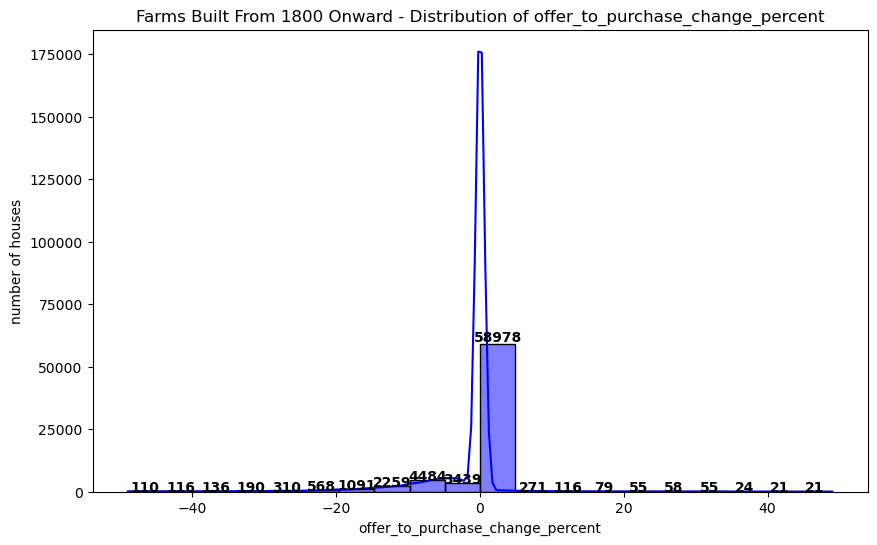

Farms Built Before 1800


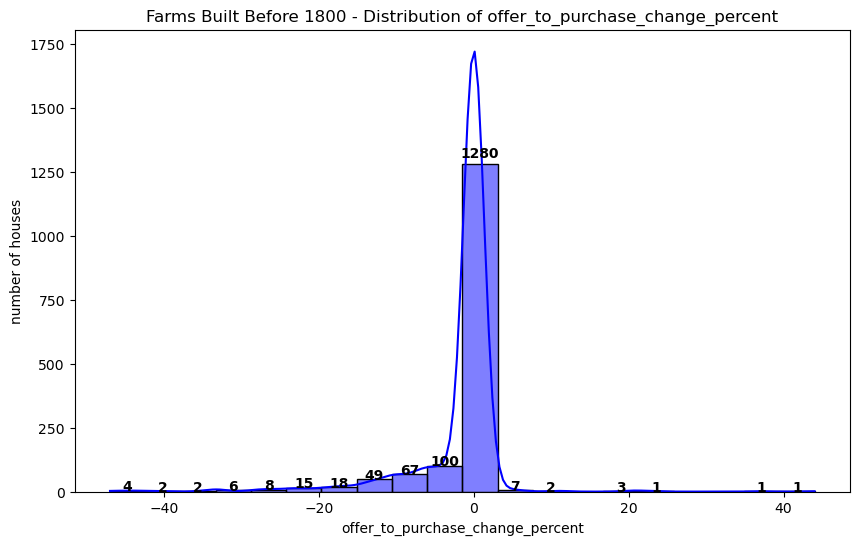

Non-Farms Built From 1900 Onward


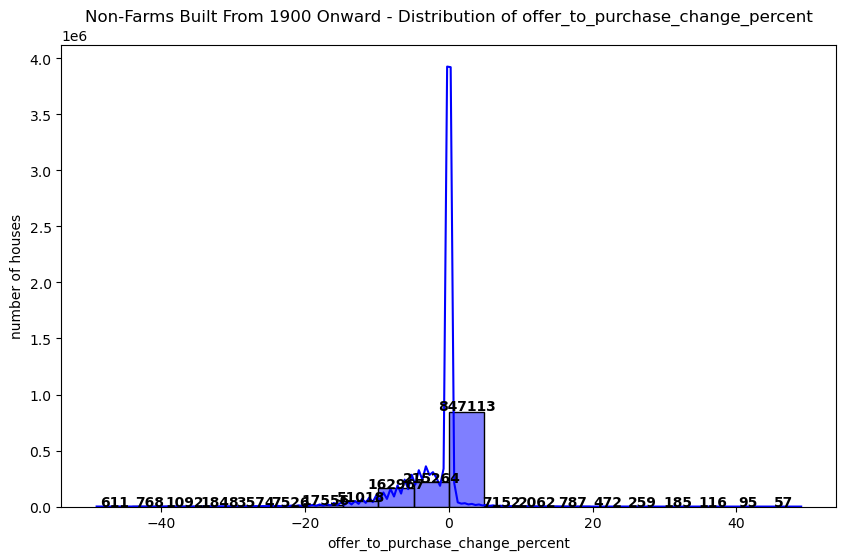

Non-Farms Built Before 1900


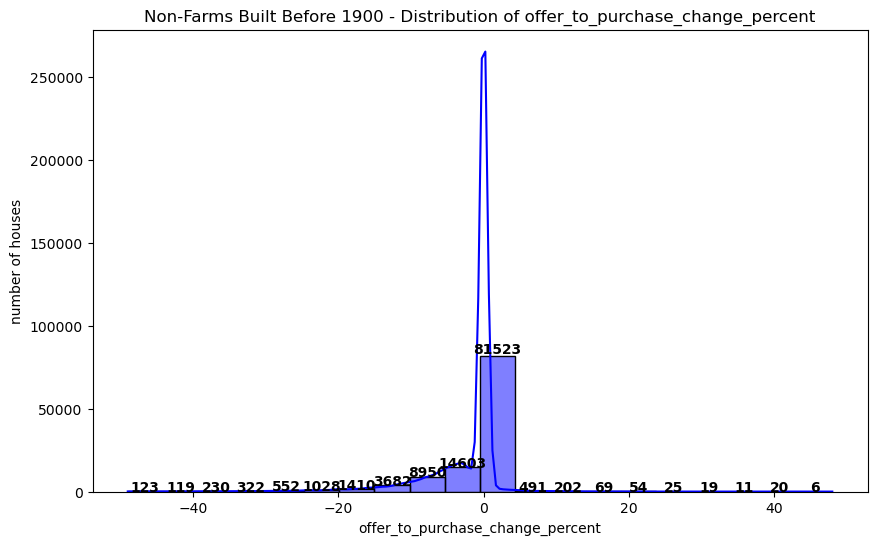

In [37]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='offer_to_purchase_change_percent', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of offer_to_purchase_change_percent")
    plt.xlabel('offer_to_purchase_change_percent')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.6. number_of_rooms distribution

Farms Built From 1800 Onward


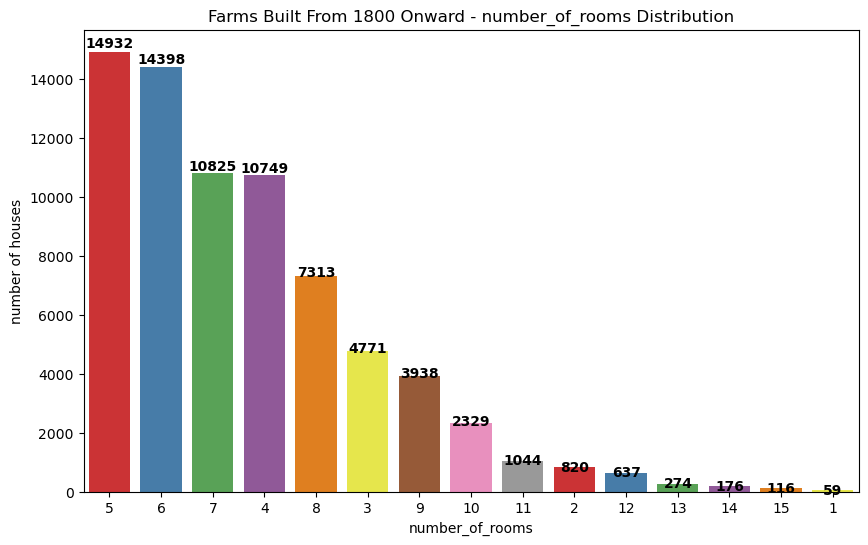

Farms Built Before 1800


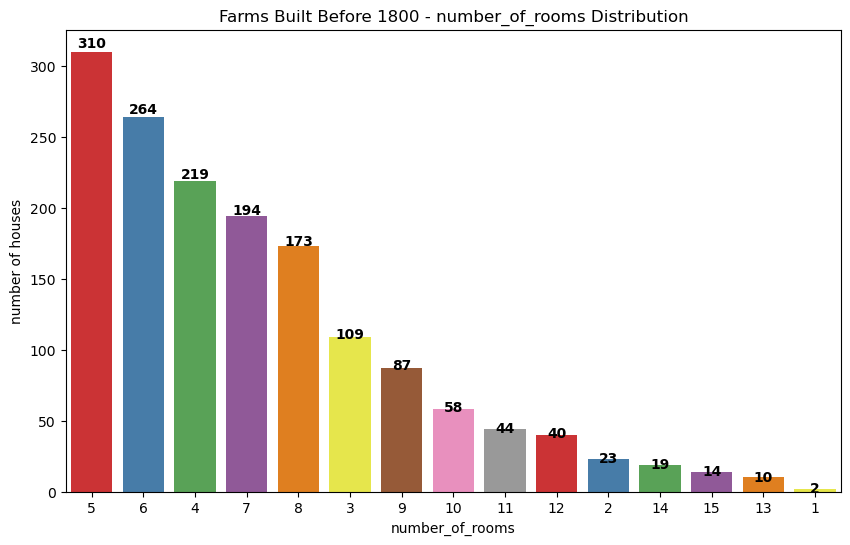

Non-Farms Built From 1900 Onward


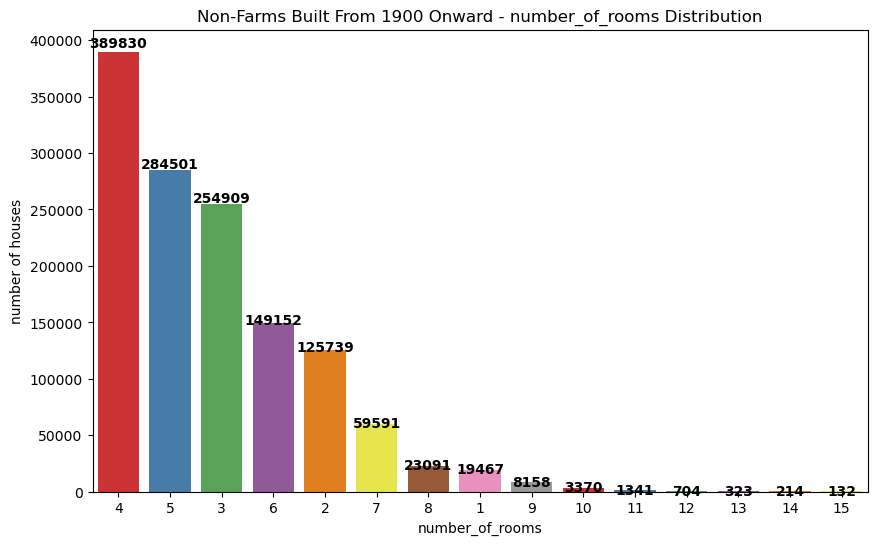

Non-Farms Built Before 1900


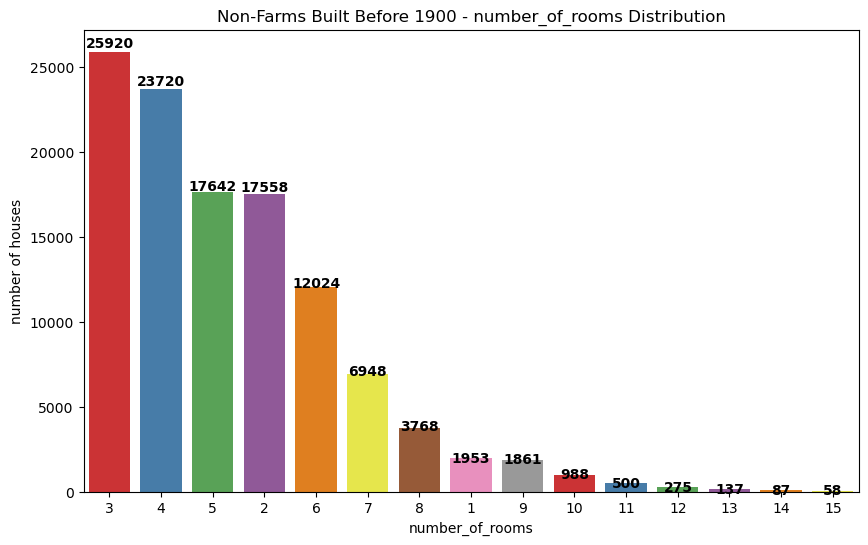

In [38]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    number_of_rooms_counts = df['number_of_rooms'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_number_of_rooms_categories = number_of_rooms_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='number_of_rooms', palette='Set1', order=sorted_number_of_rooms_categories)
    
    ax.set_title(f"{title} - number_of_rooms Distribution")
    ax.set_xlabel('number_of_rooms')
    ax.set_ylabel('number of houses')
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.7. house_size_sqm distribution

Farms Built From 1800 Onward


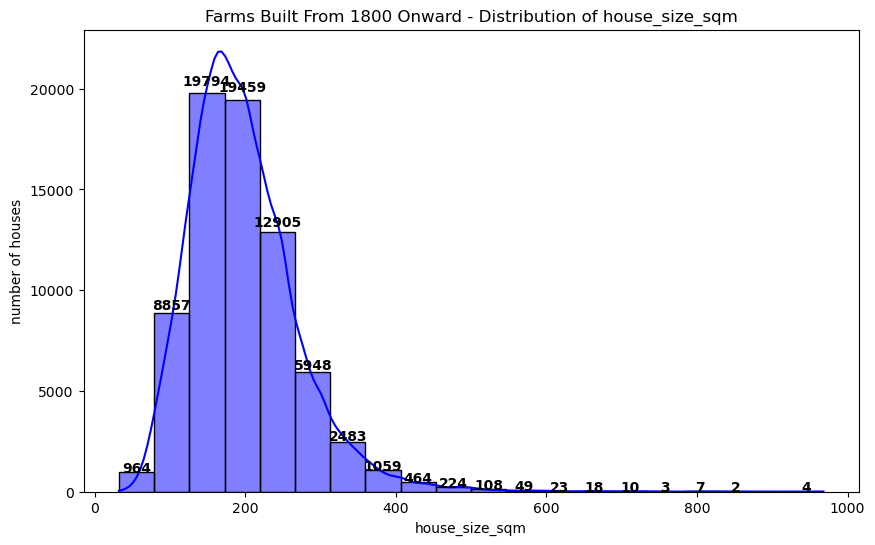

Farms Built Before 1800


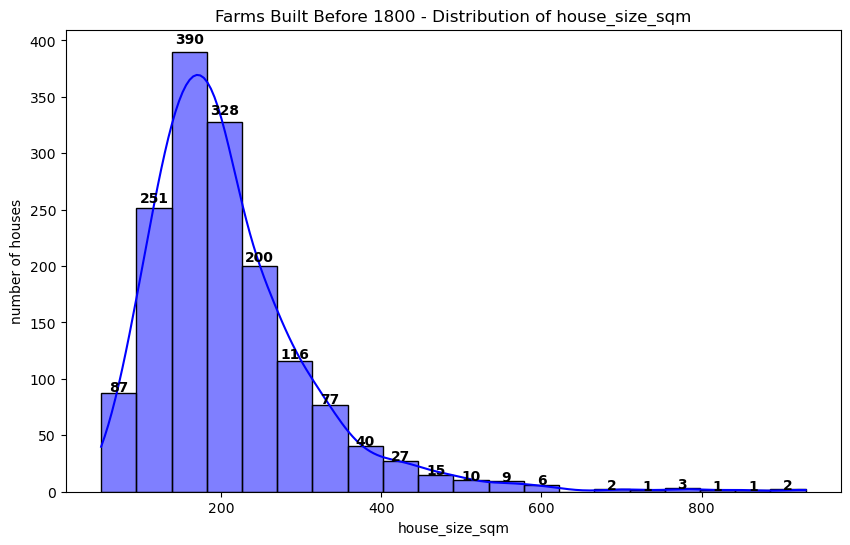

Non-Farms Built From 1900 Onward


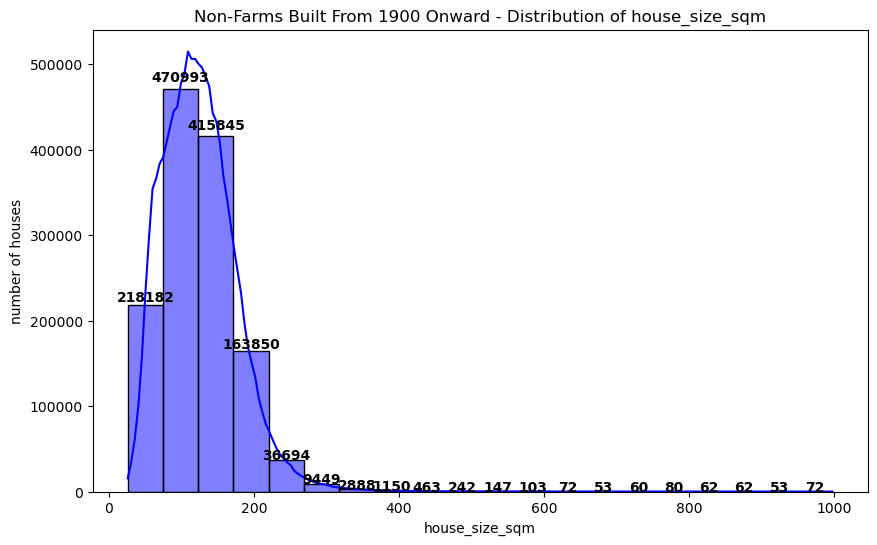

Non-Farms Built Before 1900


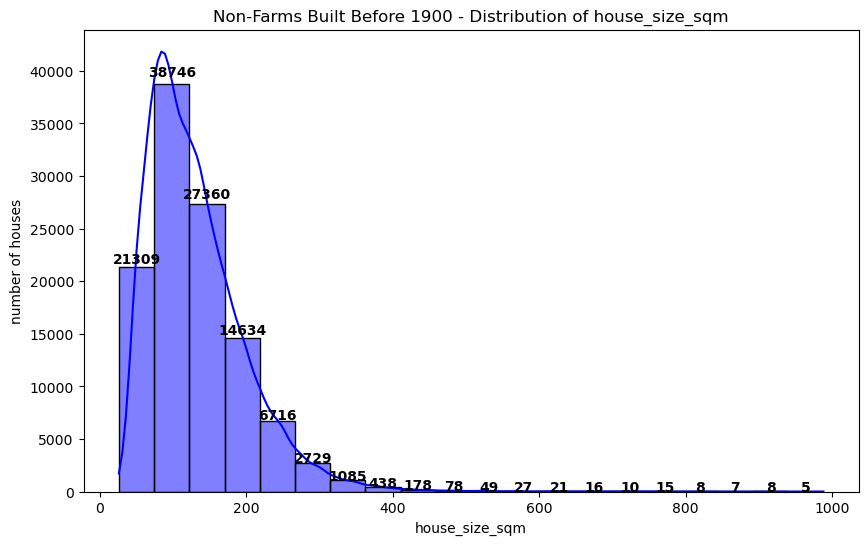

In [39]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='house_size_sqm', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of house_size_sqm")
    plt.xlabel('house_size_sqm')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.8. house_sqm_price distribution

Farms Built From 1800 Onward


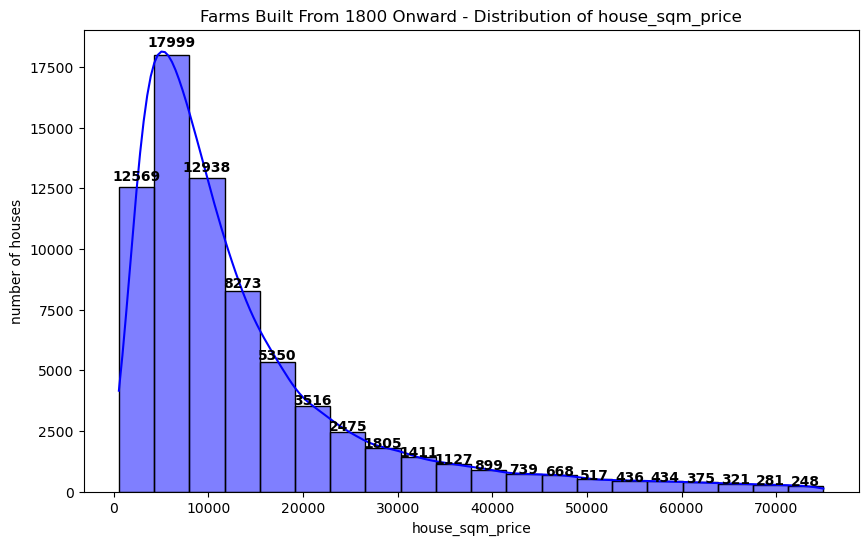

Farms Built Before 1800


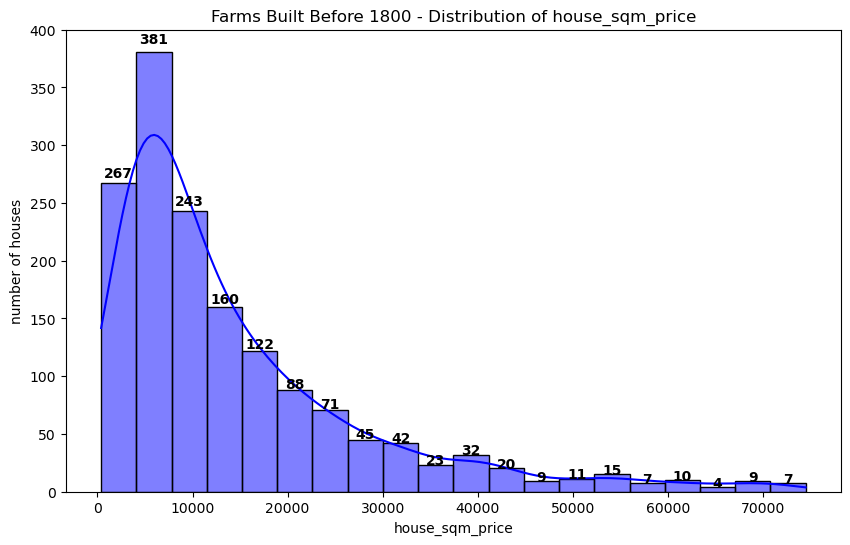

Non-Farms Built From 1900 Onward


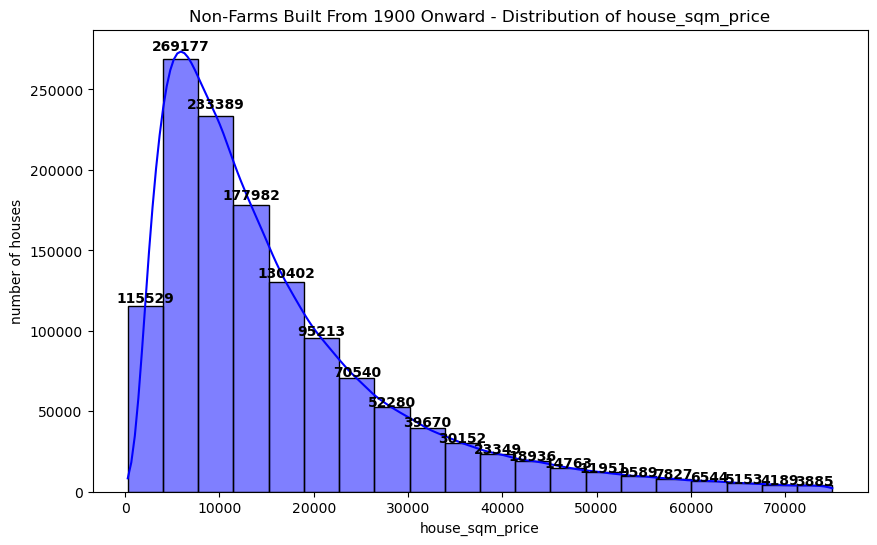

Non-Farms Built Before 1900


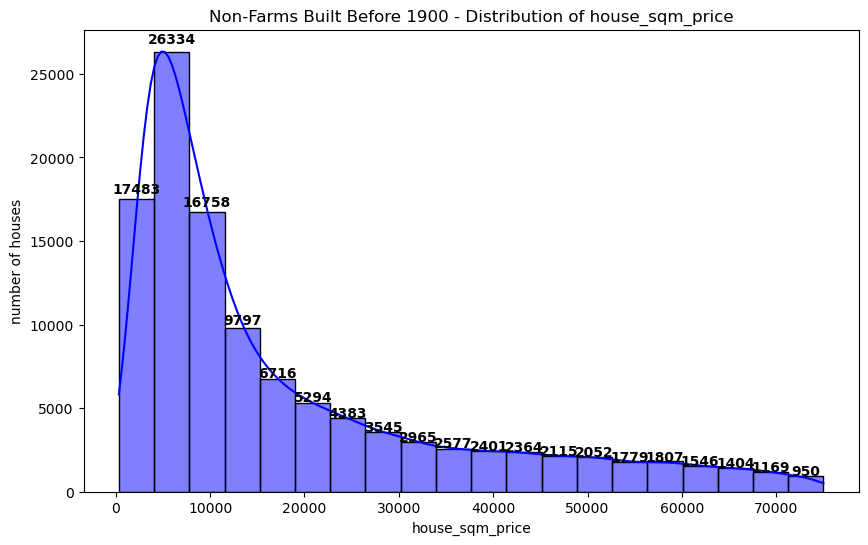

In [40]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='house_sqm_price', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of house_sqm_price")
    plt.xlabel('house_sqm_price')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.9.1. city distribution (top 15)

Farms Built From 1800 Onward


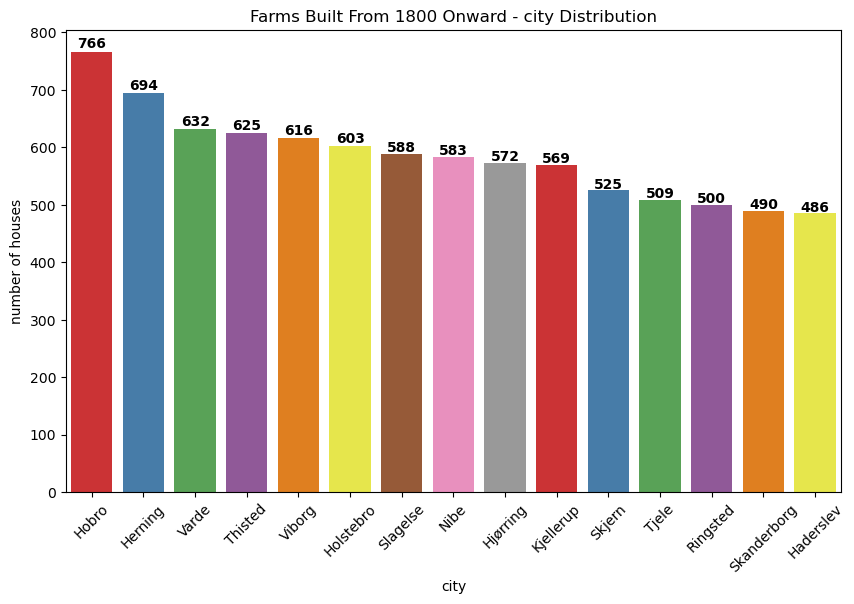

Farms Built Before 1800


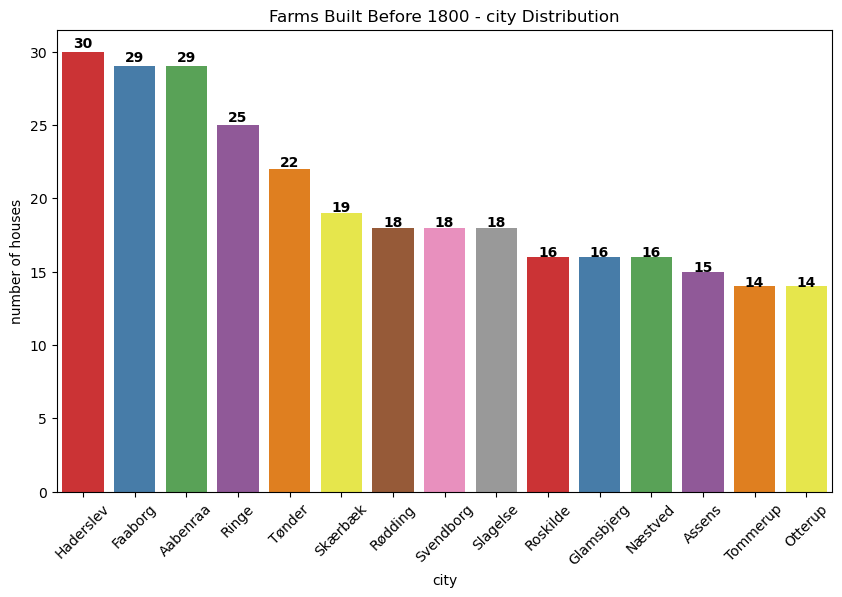

Non-Farms Built From 1900 Onward


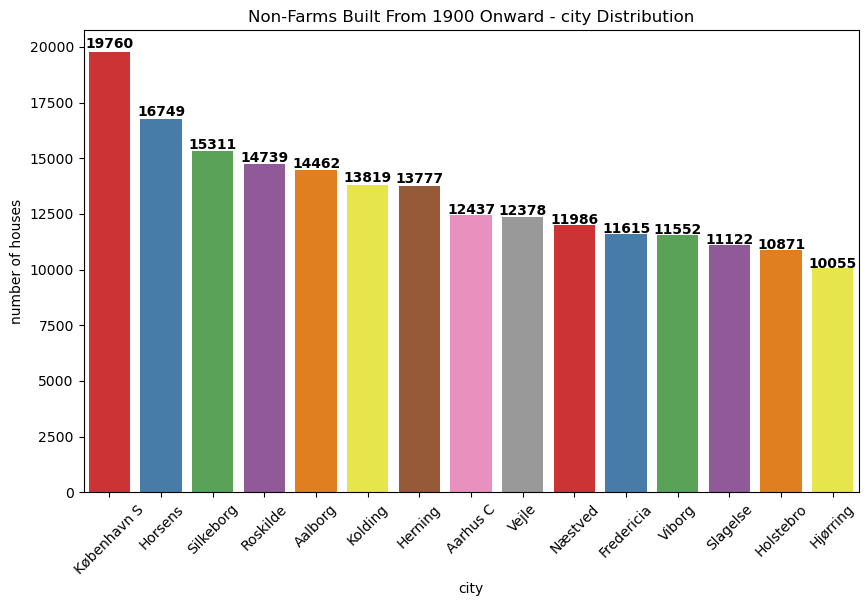

Non-Farms Built Before 1900


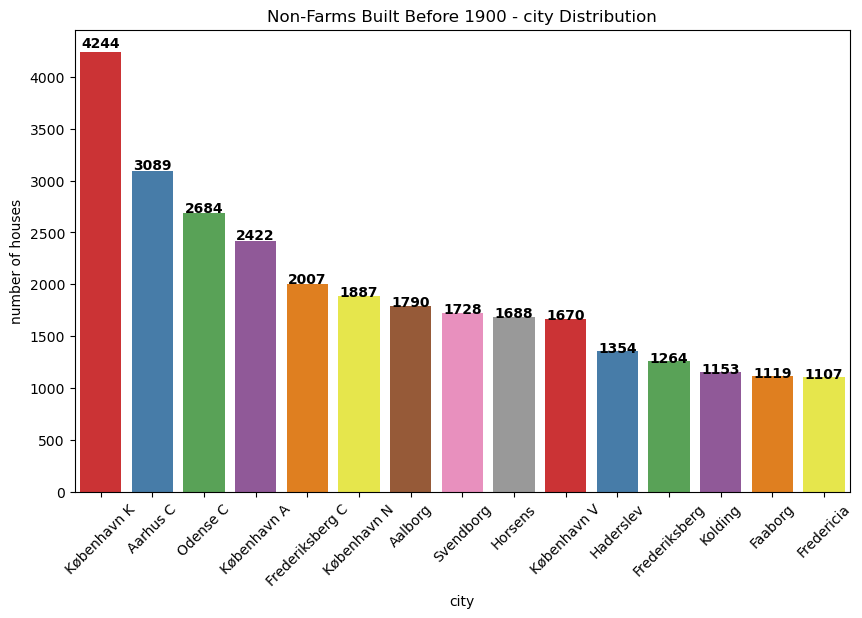

In [48]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    city_counts = df['city'].value_counts().head(15)
    
    # Sort the categories by count in descending order
    sorted_city_categories = city_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='city', palette='Set1', order=sorted_city_categories)
    
    ax.set_title(f"{title} - city Distribution")
    ax.set_xlabel('city')
    ax.set_ylabel('number of houses')
    plt.xticks(rotation=45)
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.9.2. city distribution (bottom 15)

Farms Built From 1800 Onward


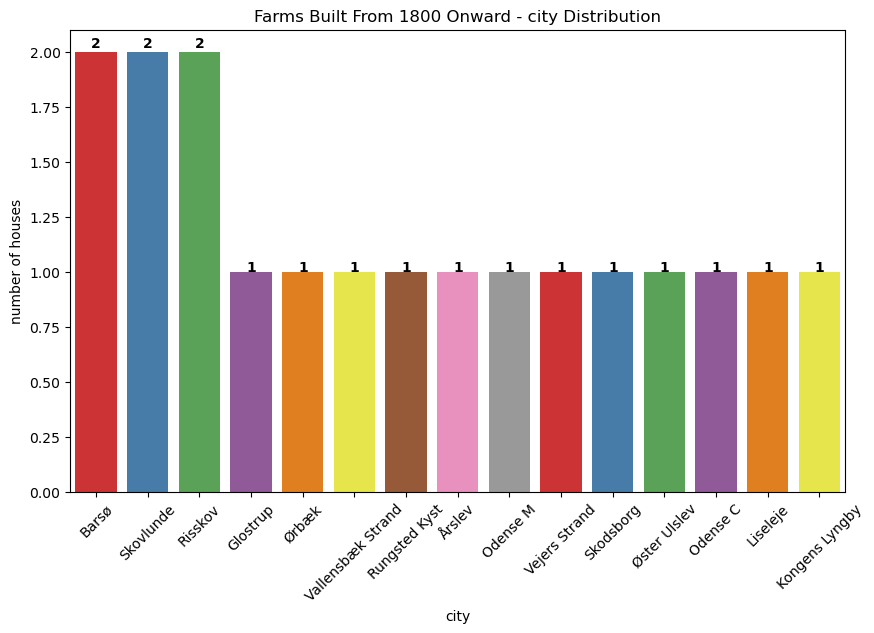

Farms Built Before 1800


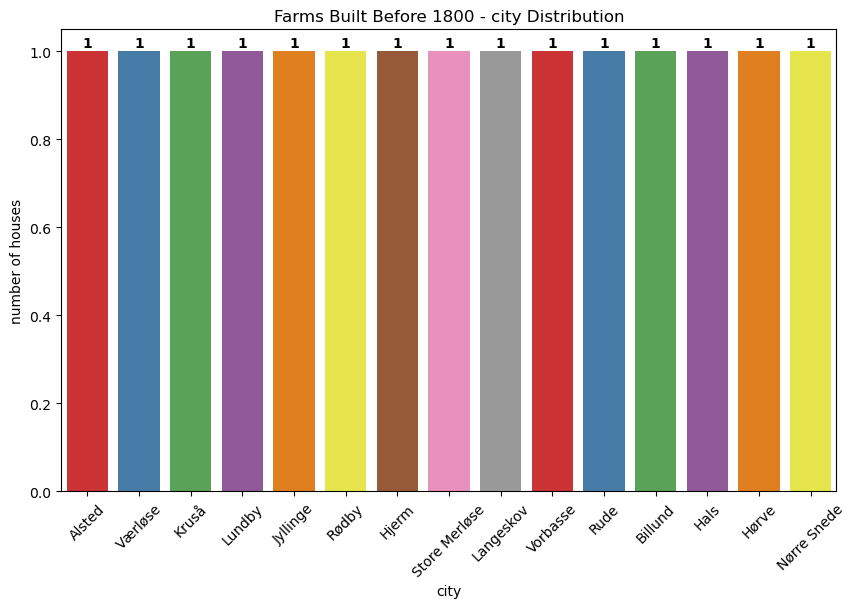

Non-Farms Built From 1900 Onward


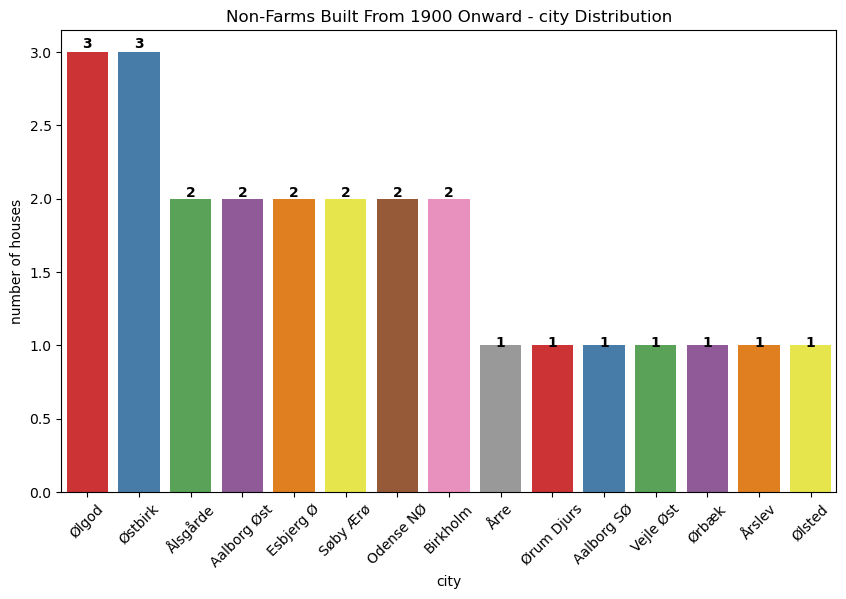

Non-Farms Built Before 1900


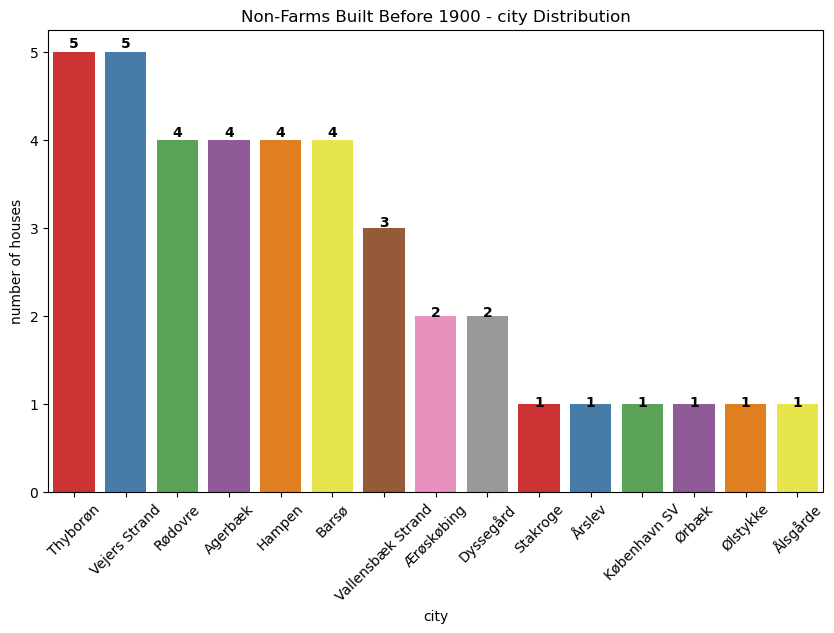

In [49]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    city_counts = df['city'].value_counts().tail(15)
    
    # Sort the categories by count in descending order
    sorted_city_categories = city_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='city', palette='Set1', order=sorted_city_categories)
    
    ax.set_title(f"{title} - city Distribution")
    ax.set_xlabel('city')
    ax.set_ylabel('number of houses')
    plt.xticks(rotation=45)
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.10. area distribution

Farms Built From 1800 Onward


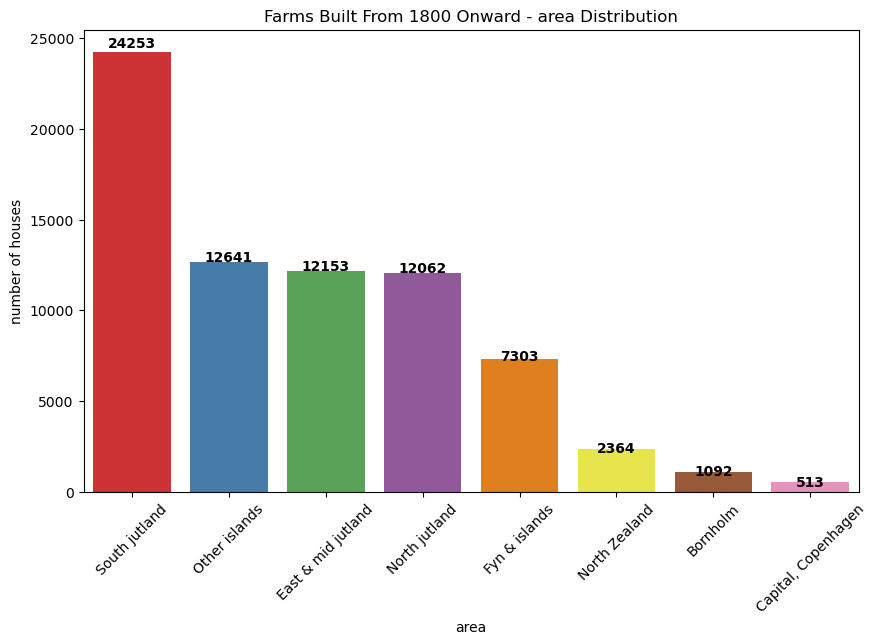

Farms Built Before 1800


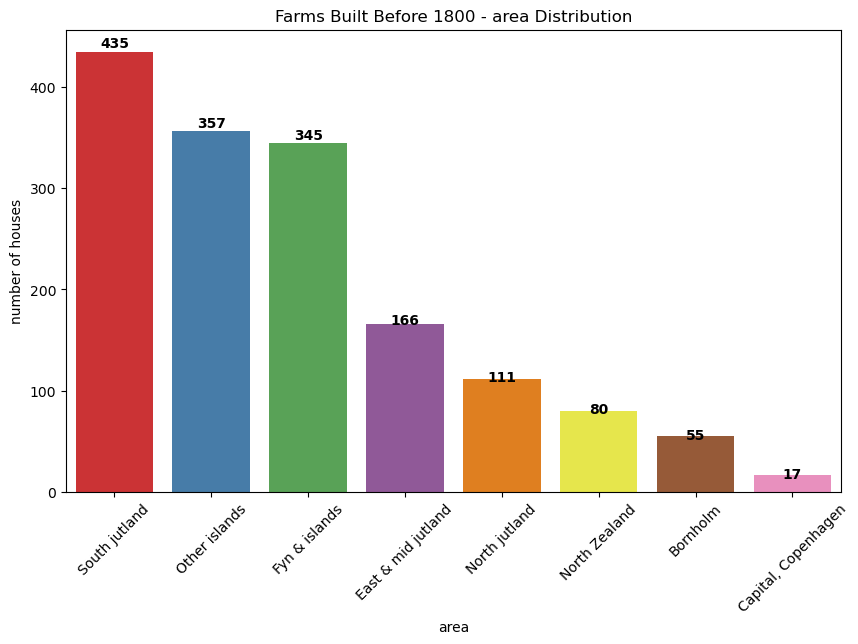

Non-Farms Built From 1900 Onward


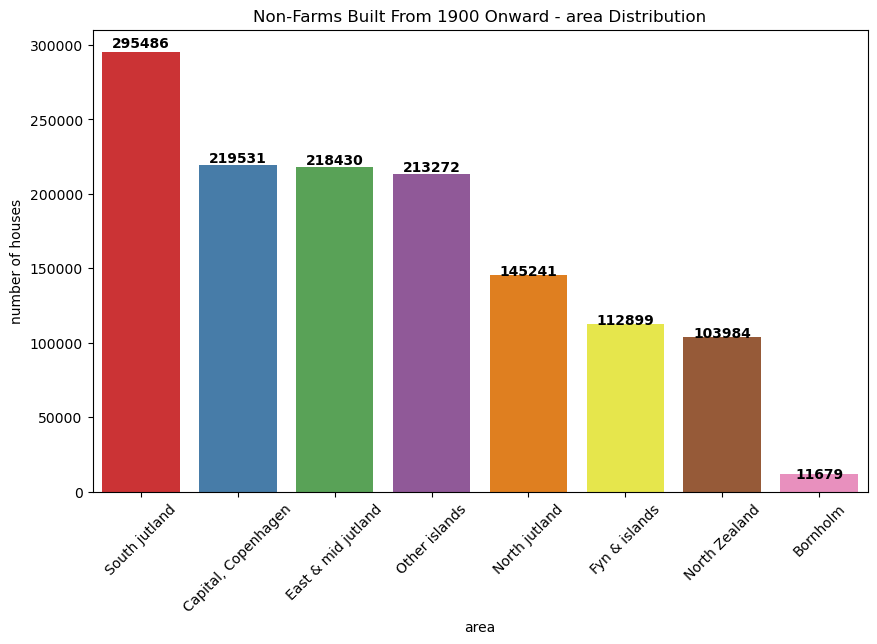

Non-Farms Built Before 1900


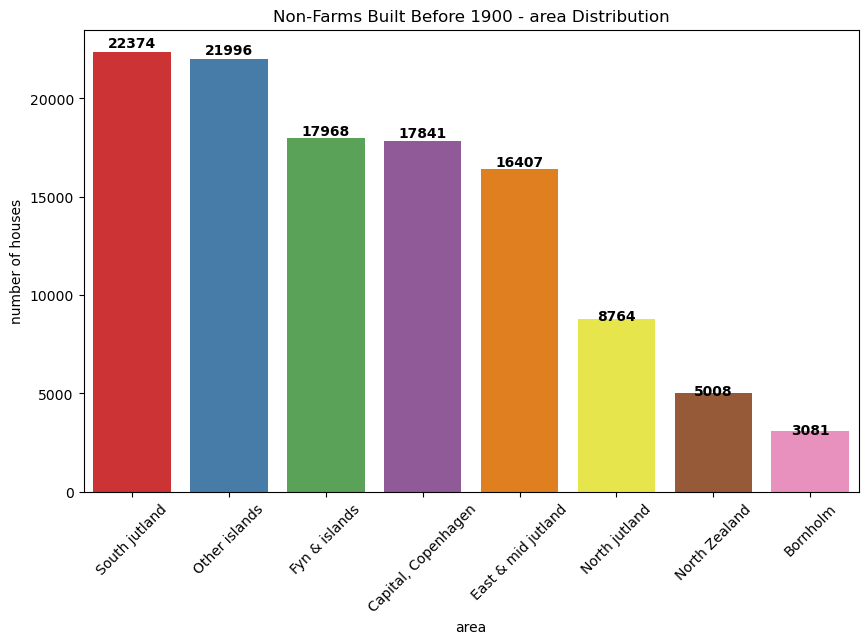

In [52]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    area_counts = df['area'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_area_categories = area_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='area', palette='Set1', order=sorted_area_categories)
    
    ax.set_title(f"{title} - area Distribution")
    ax.set_xlabel('area')
    ax.set_ylabel('number of houses')
    plt.xticks(rotation=45)
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.11. region distribution

Farms Built From 1800 Onward


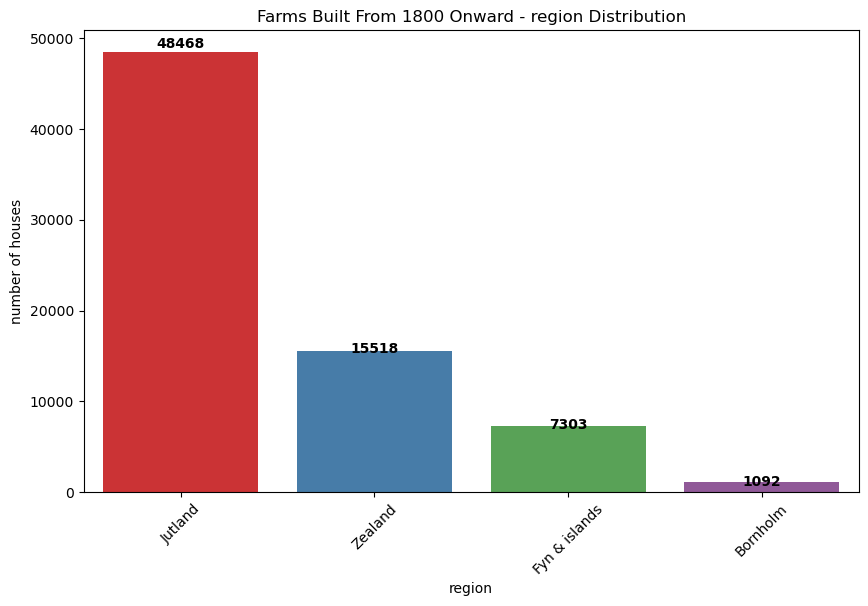

Farms Built Before 1800


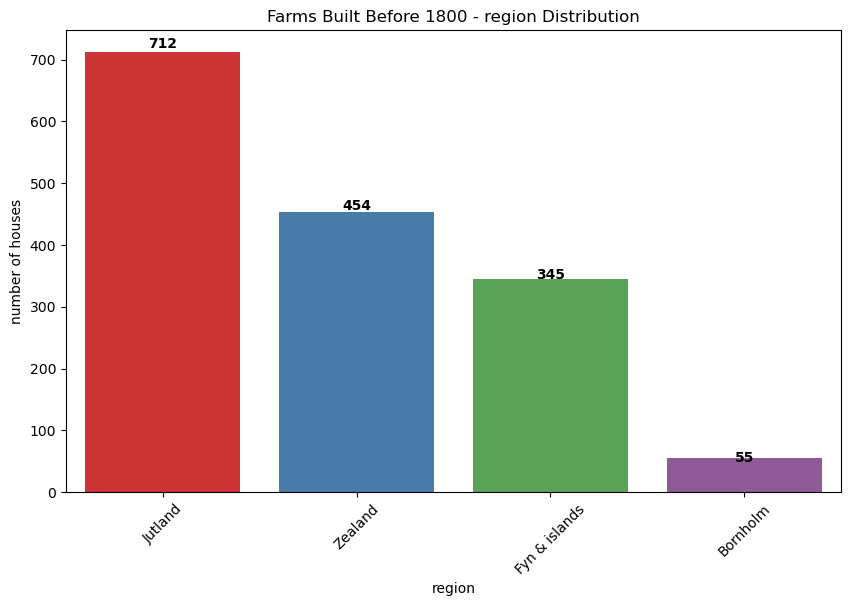

Non-Farms Built From 1900 Onward


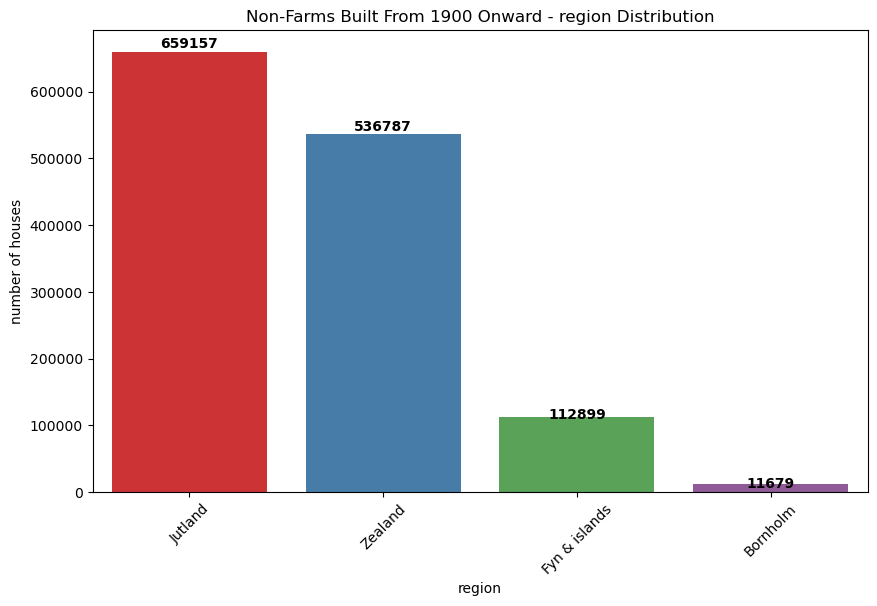

Non-Farms Built Before 1900


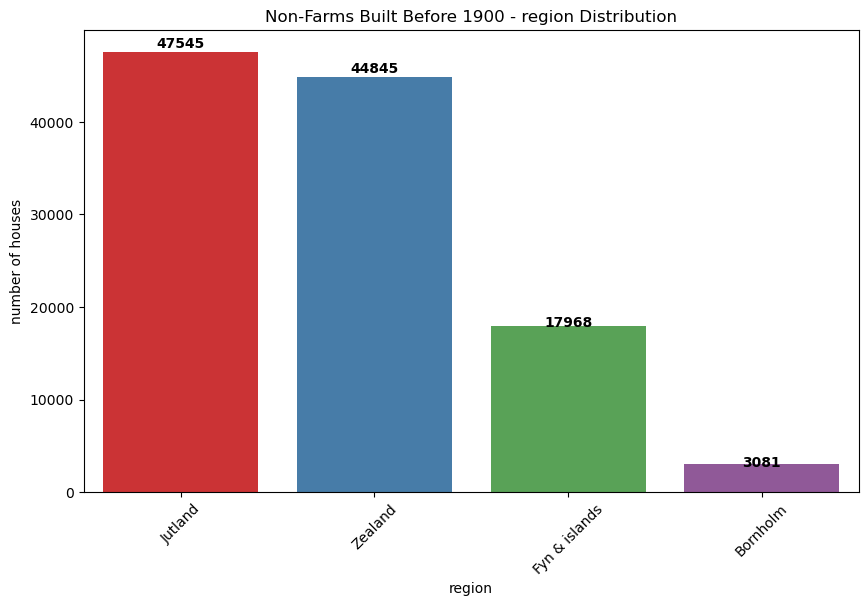

In [53]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    region_counts = df['region'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_region_categories = region_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='region', palette='Set1', order=sorted_region_categories)
    
    ax.set_title(f"{title} - region Distribution")
    ax.set_xlabel('region')
    ax.set_ylabel('number of houses')
    plt.xticks(rotation=45)
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.12. nominal_interest_rate_percent distribution

Farms Built From 1800 Onward


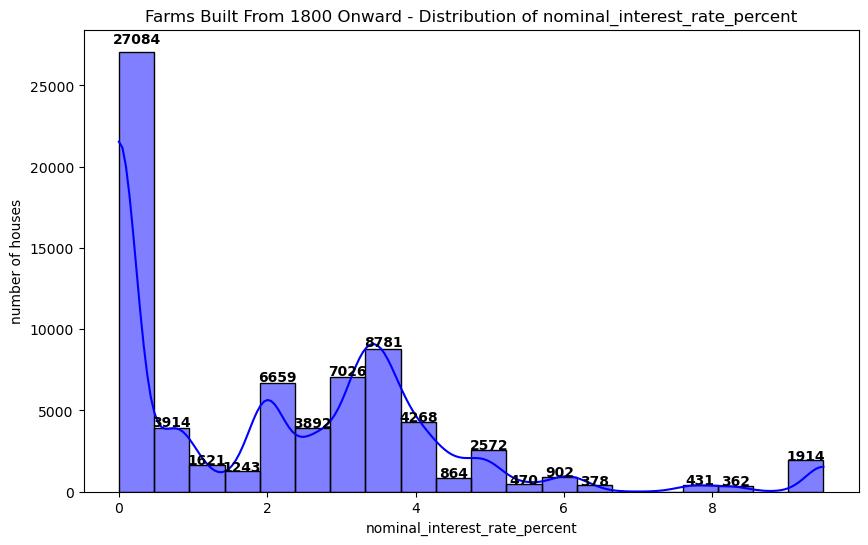

Farms Built Before 1800


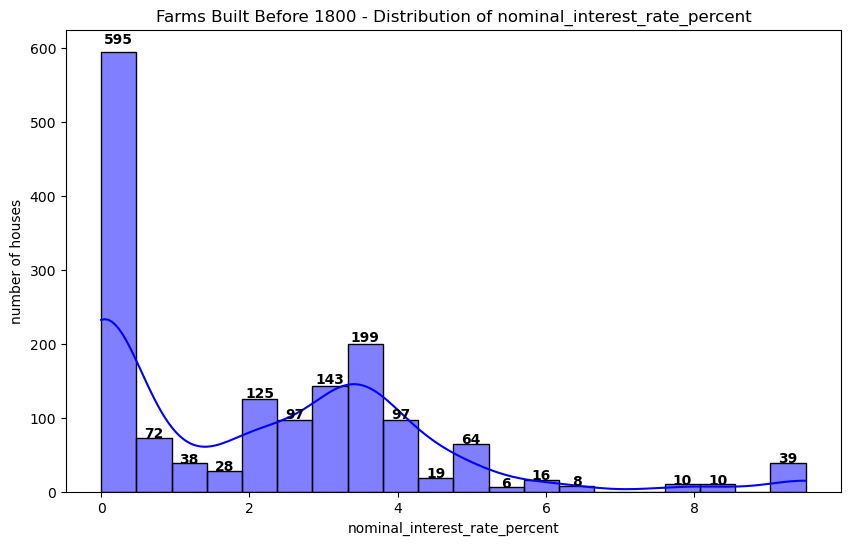

Non-Farms Built From 1900 Onward


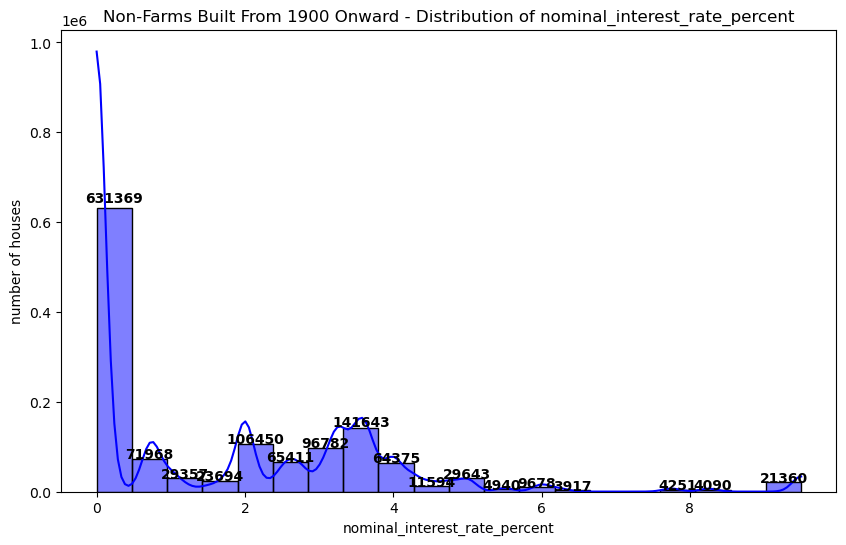

Non-Farms Built Before 1900


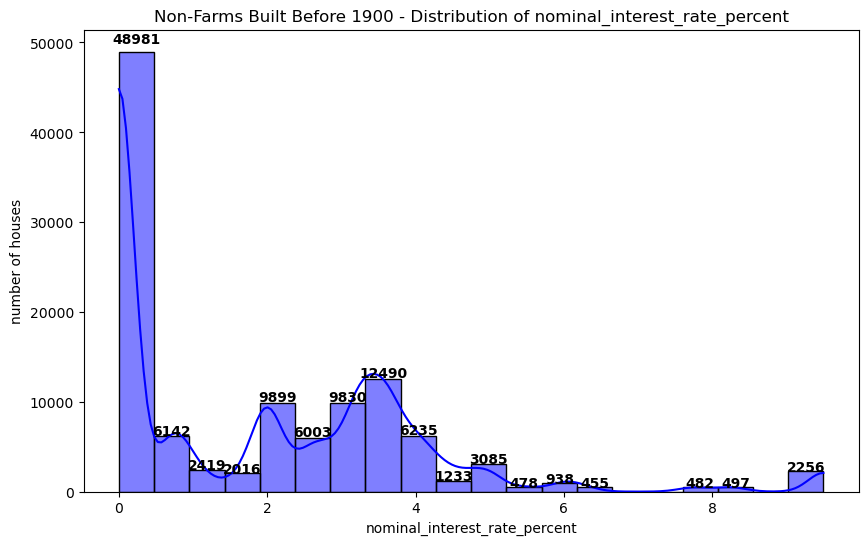

In [54]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='nominal_interest_rate_percent', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of nominal_interest_rate_percent")
    plt.xlabel('nominal_interest_rate_percent')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.13. yield_on_mortgage_bonds_percent distribution

Farms Built From 1800 Onward


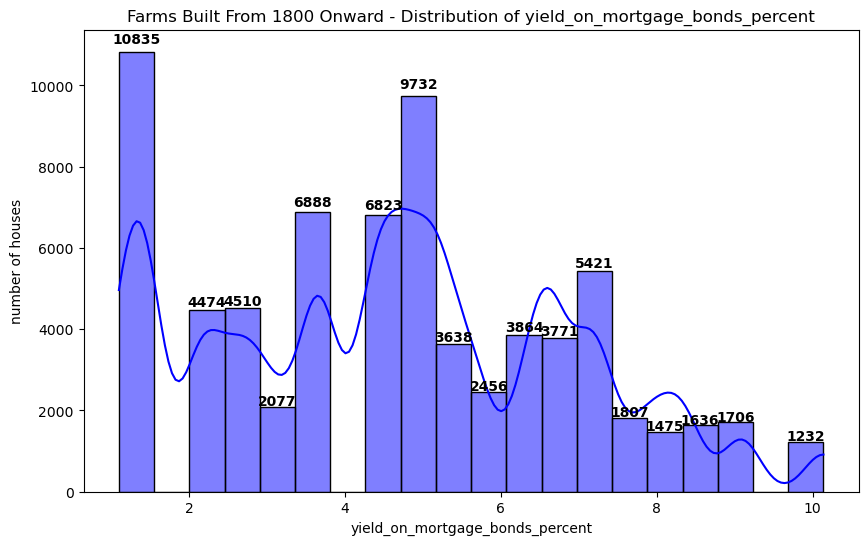

Farms Built Before 1800


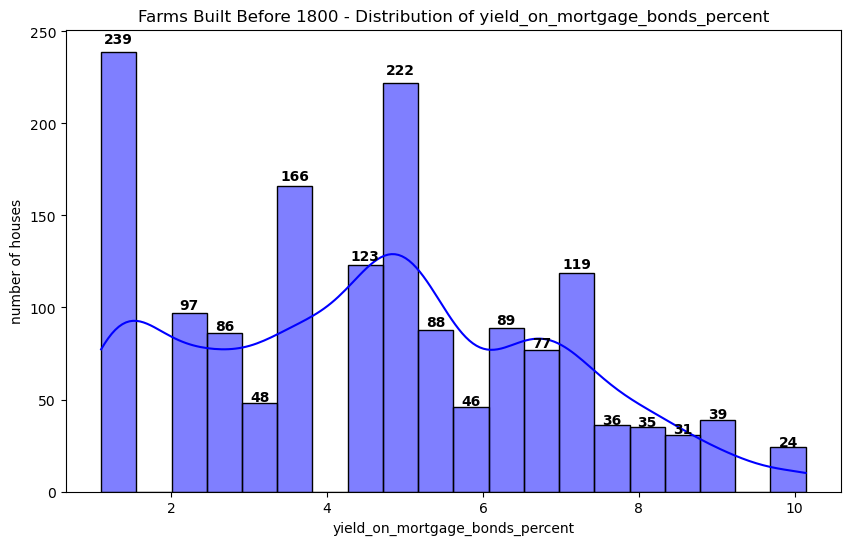

Non-Farms Built From 1900 Onward


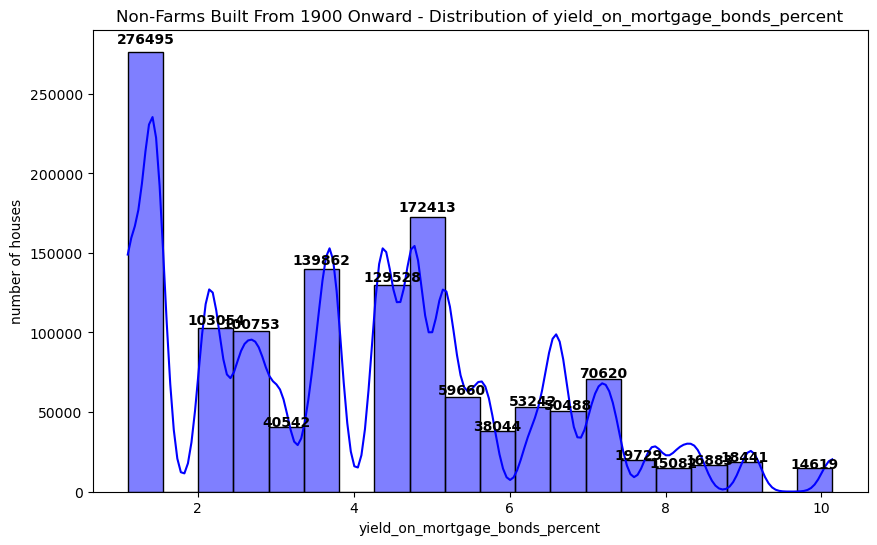

Non-Farms Built Before 1900


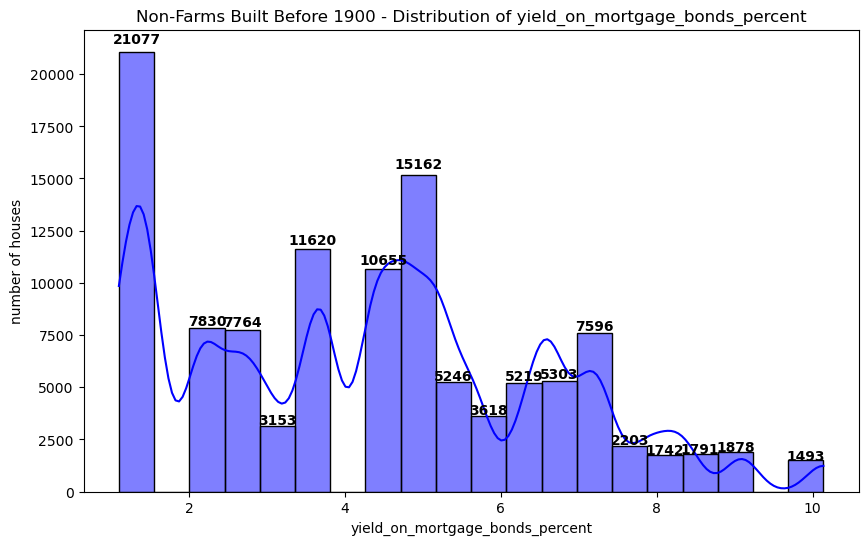

In [55]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(10, 6))

    # Plot the histogram
    ax = sns.histplot(data=df, x='yield_on_mortgage_bonds_percent', bins=20, kde=True, color='blue')

    # Adding labels above the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-empty bins
            ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02,  # Dynamic label position
                    str(int(height)), ha='center', fontsize=10, color='black', fontweight='bold')

    plt.title(f"{title} - Distribution of yield_on_mortgage_bonds_percent")
    plt.xlabel('yield_on_mortgage_bonds_percent')
    plt.ylabel('number of houses')
    plt.show()

#### 5.1.13. purchase_year distribution

Farms Built From 1800 Onward


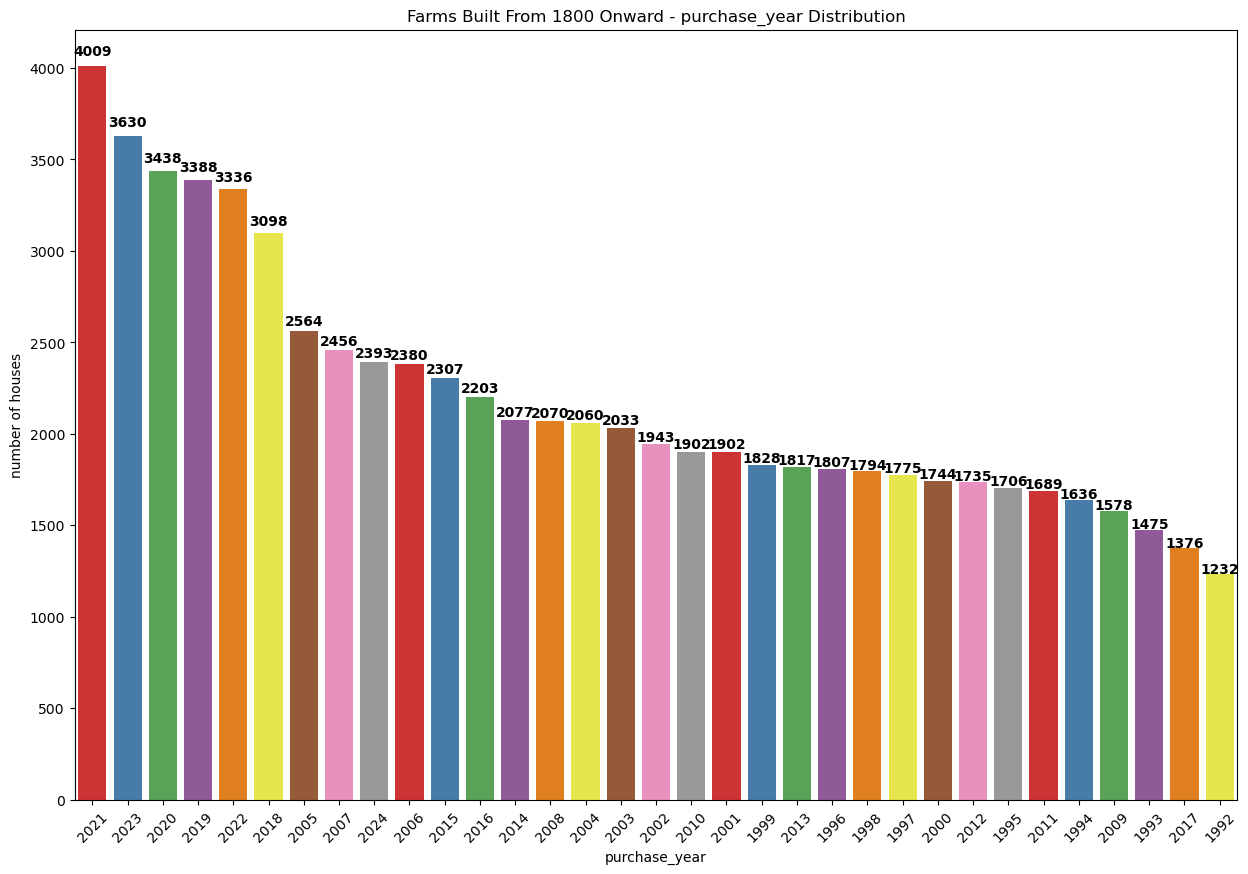

Farms Built Before 1800


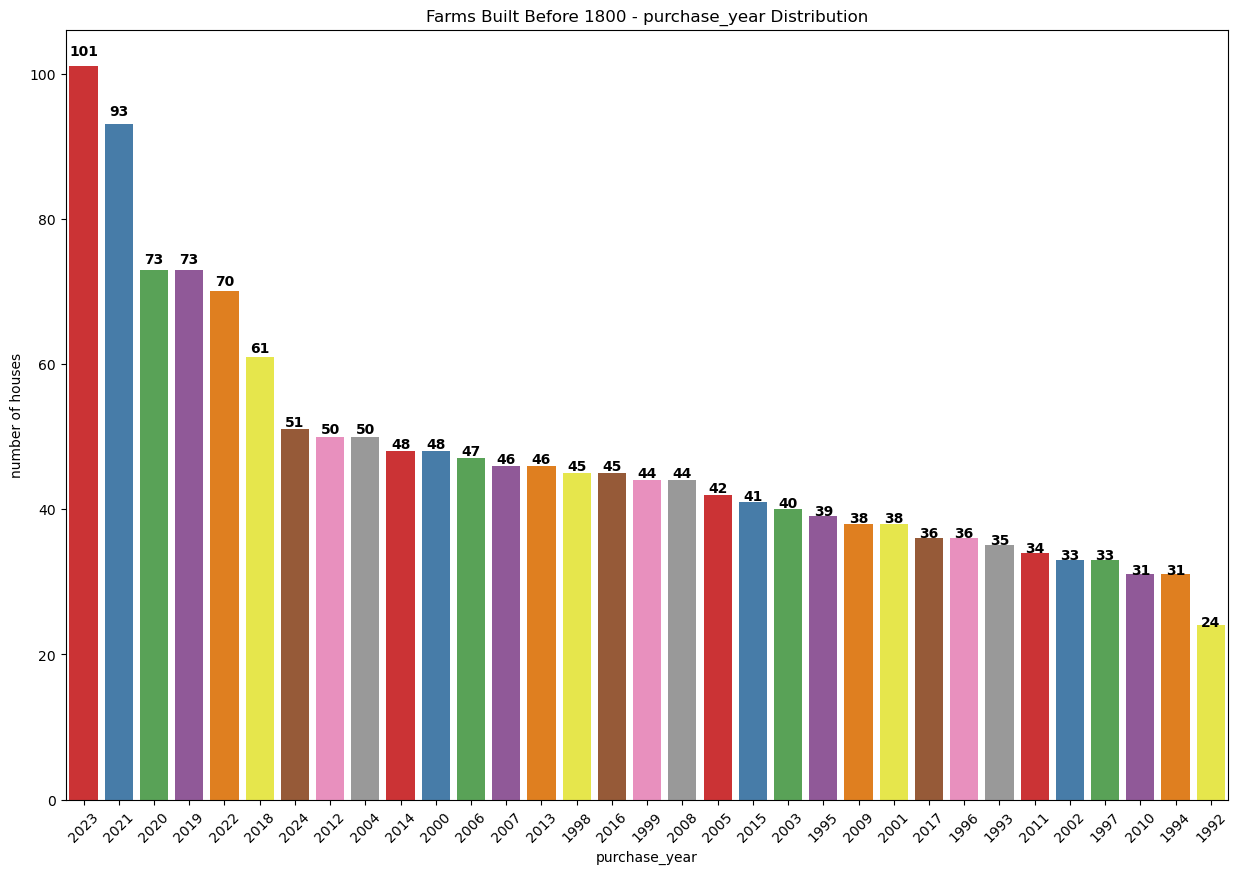

Non-Farms Built From 1900 Onward


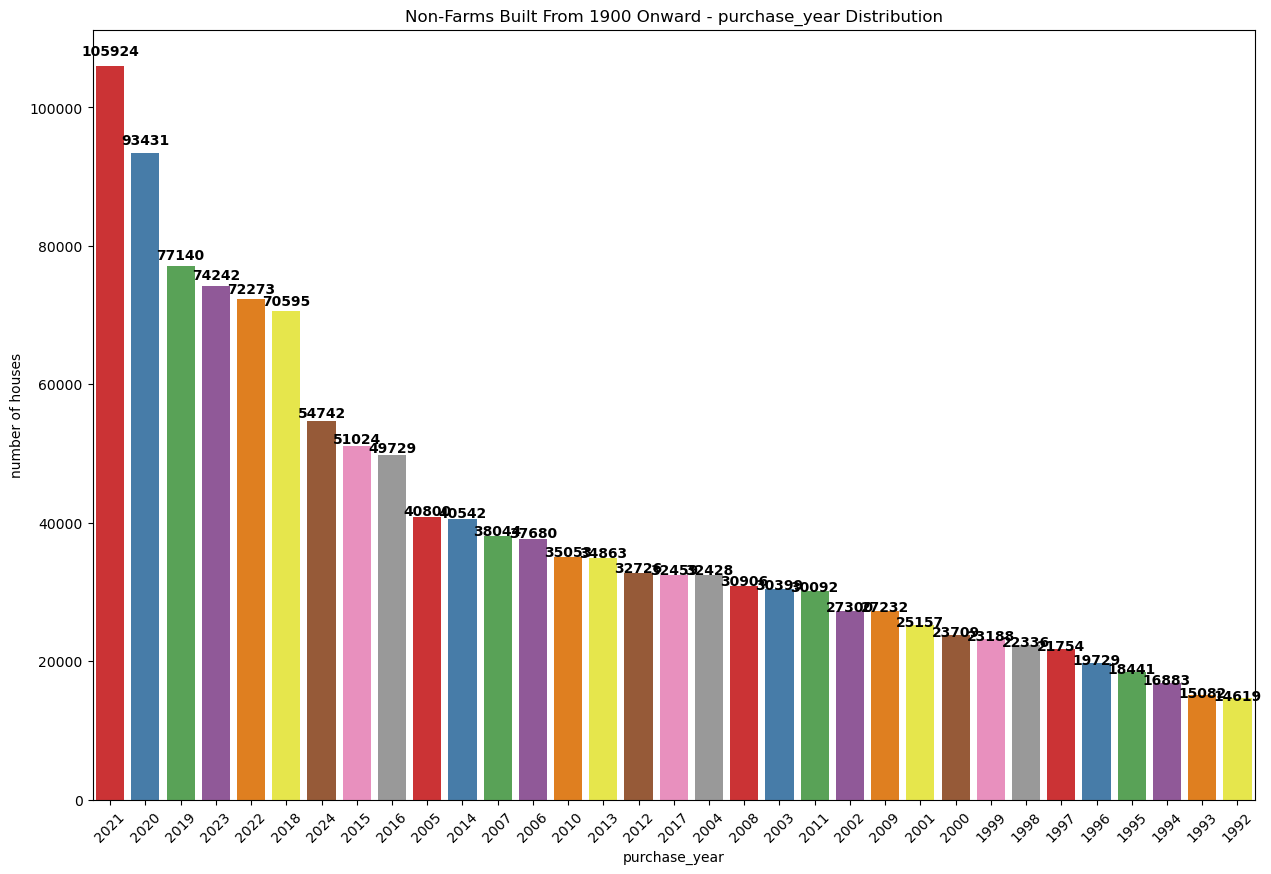

Non-Farms Built Before 1900


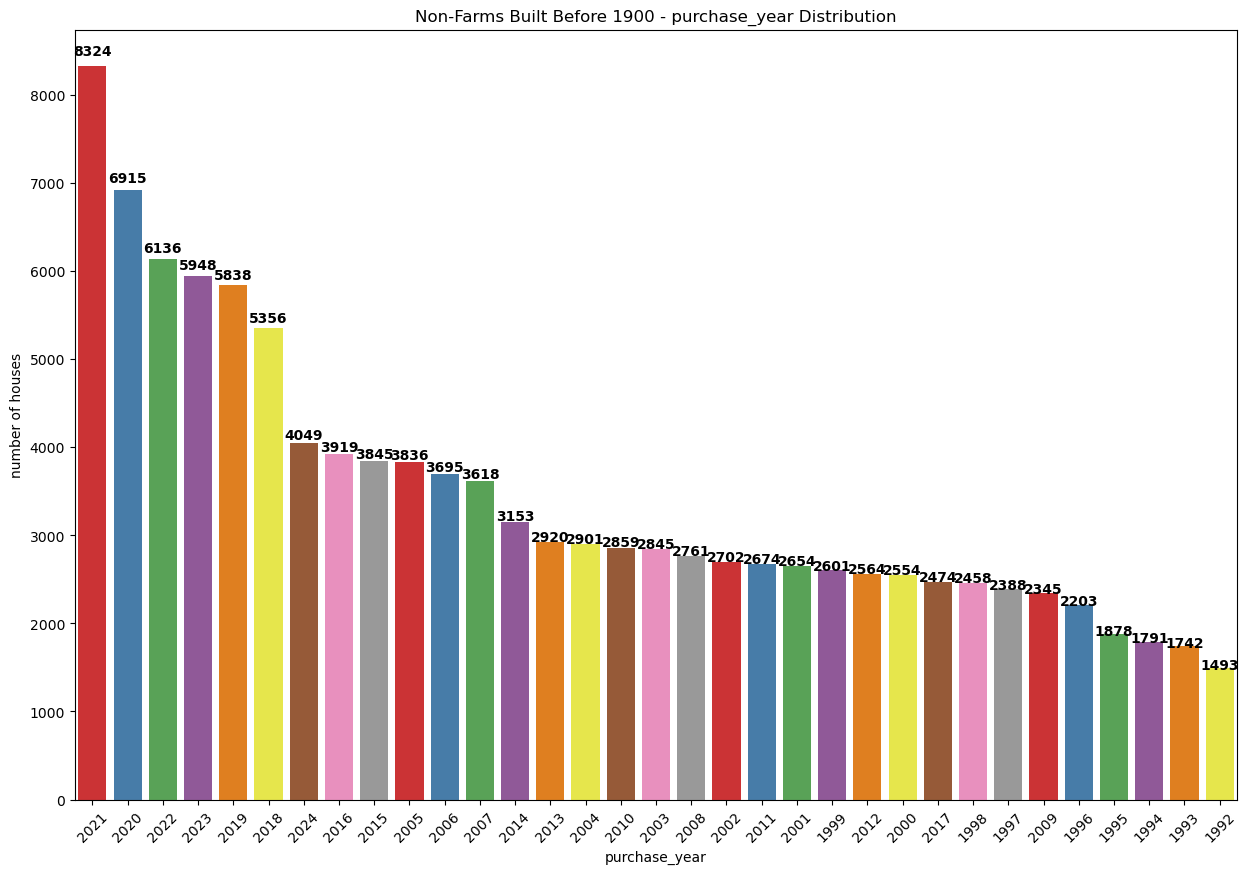

In [57]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    purchase_year_counts = df['purchase_year'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_purchase_year_categories = purchase_year_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(data=df, x='purchase_year', palette='Set1', order=sorted_purchase_year_categories)
    
    ax.set_title(f"{title} - purchase_year Distribution")
    ax.set_xlabel('purchase_year')
    ax.set_ylabel('number of houses')
    plt.xticks(rotation=45)
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.14. purchase_quarter distribution

Farms Built From 1800 Onward


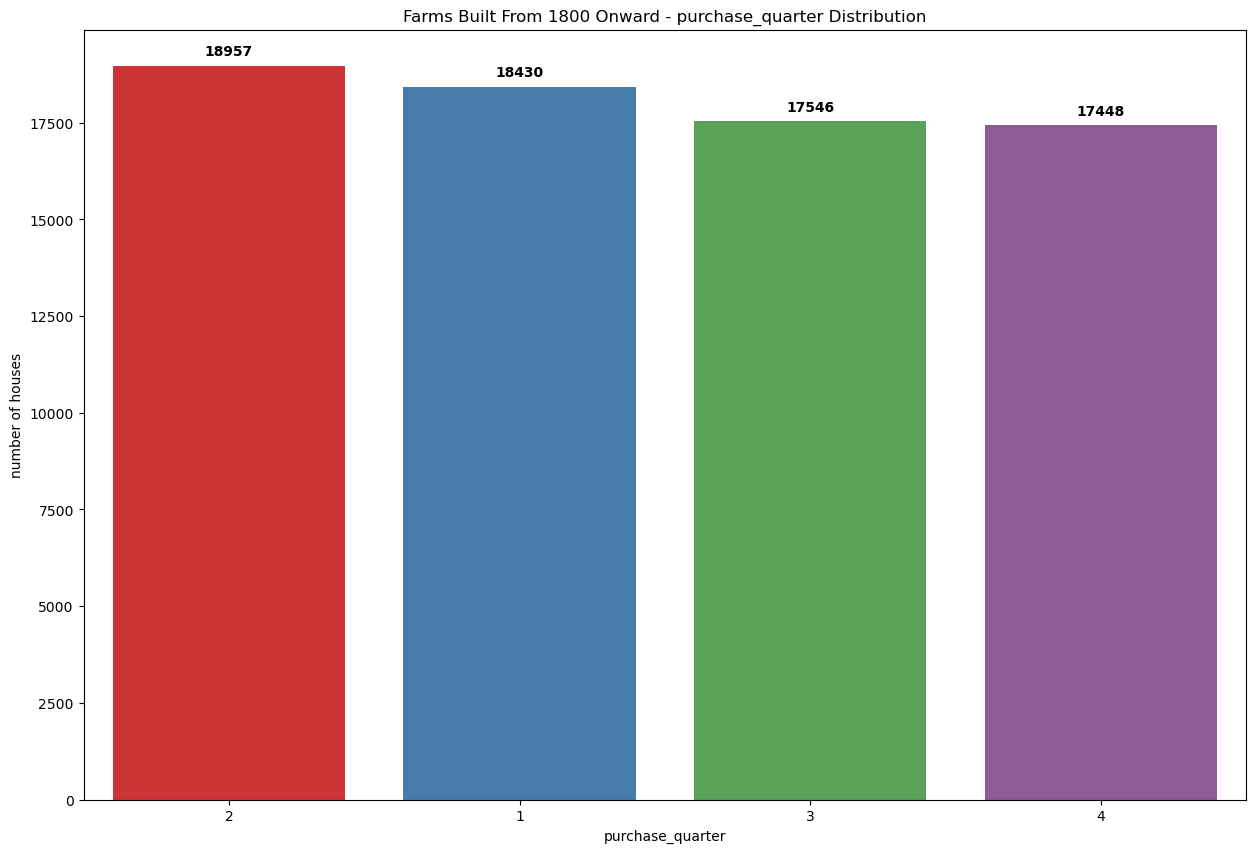

Farms Built Before 1800


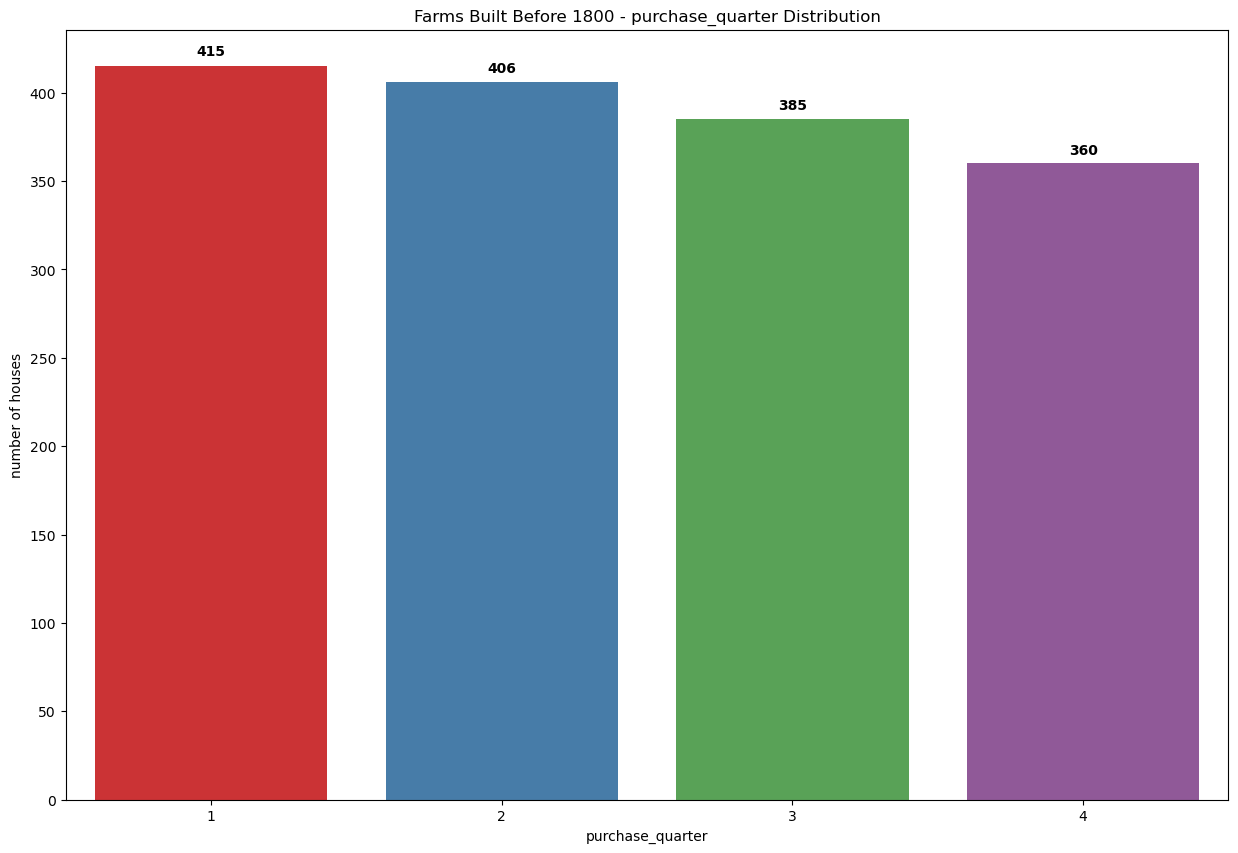

Non-Farms Built From 1900 Onward


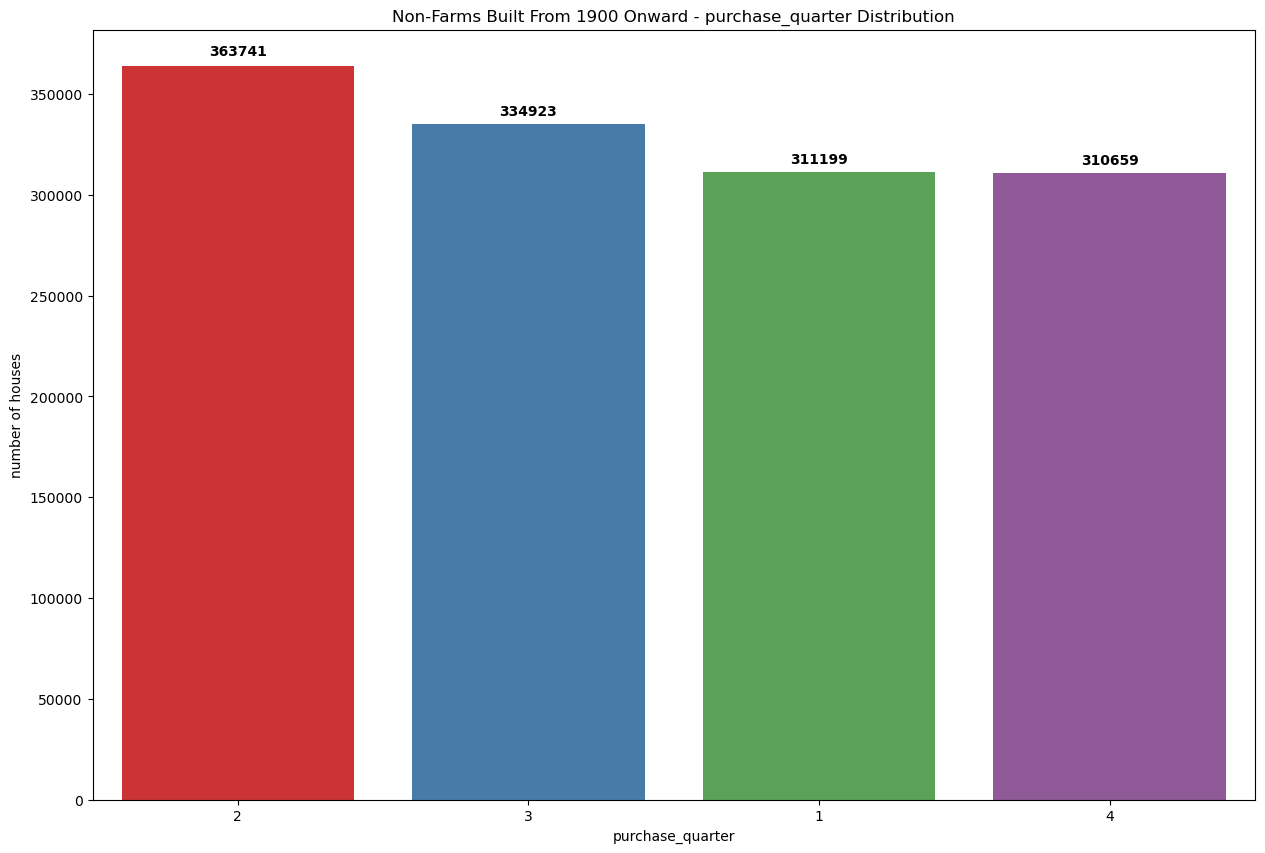

Non-Farms Built Before 1900


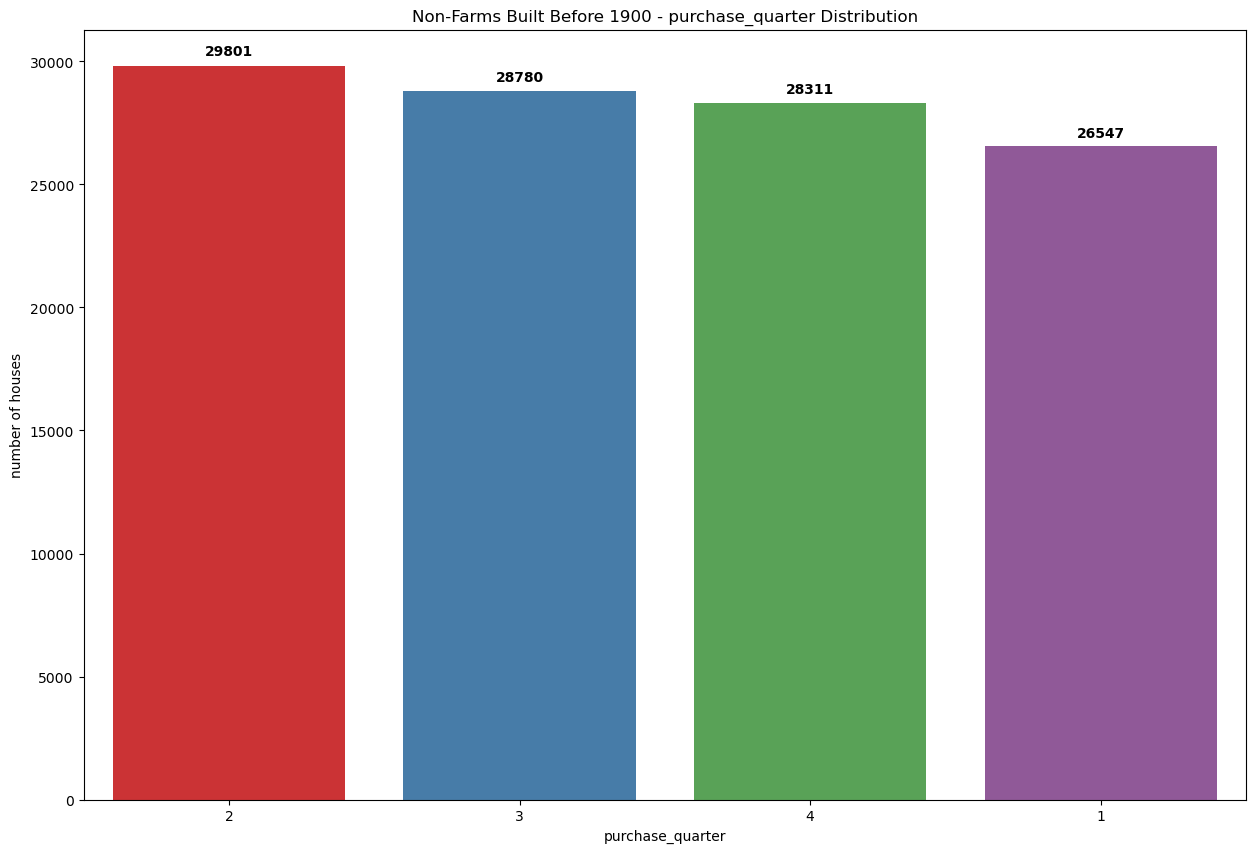

In [59]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    purchase_quarter_counts = df['purchase_quarter'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_purchase_quarter_categories = purchase_quarter_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(data=df, x='purchase_quarter', palette='Set1', order=sorted_purchase_quarter_categories)
    
    ax.set_title(f"{title} - purchase_quarter Distribution")
    ax.set_xlabel('purchase_quarter')
    ax.set_ylabel('number of houses')
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.5. purchase_month distribution

Farms Built From 1800 Onward


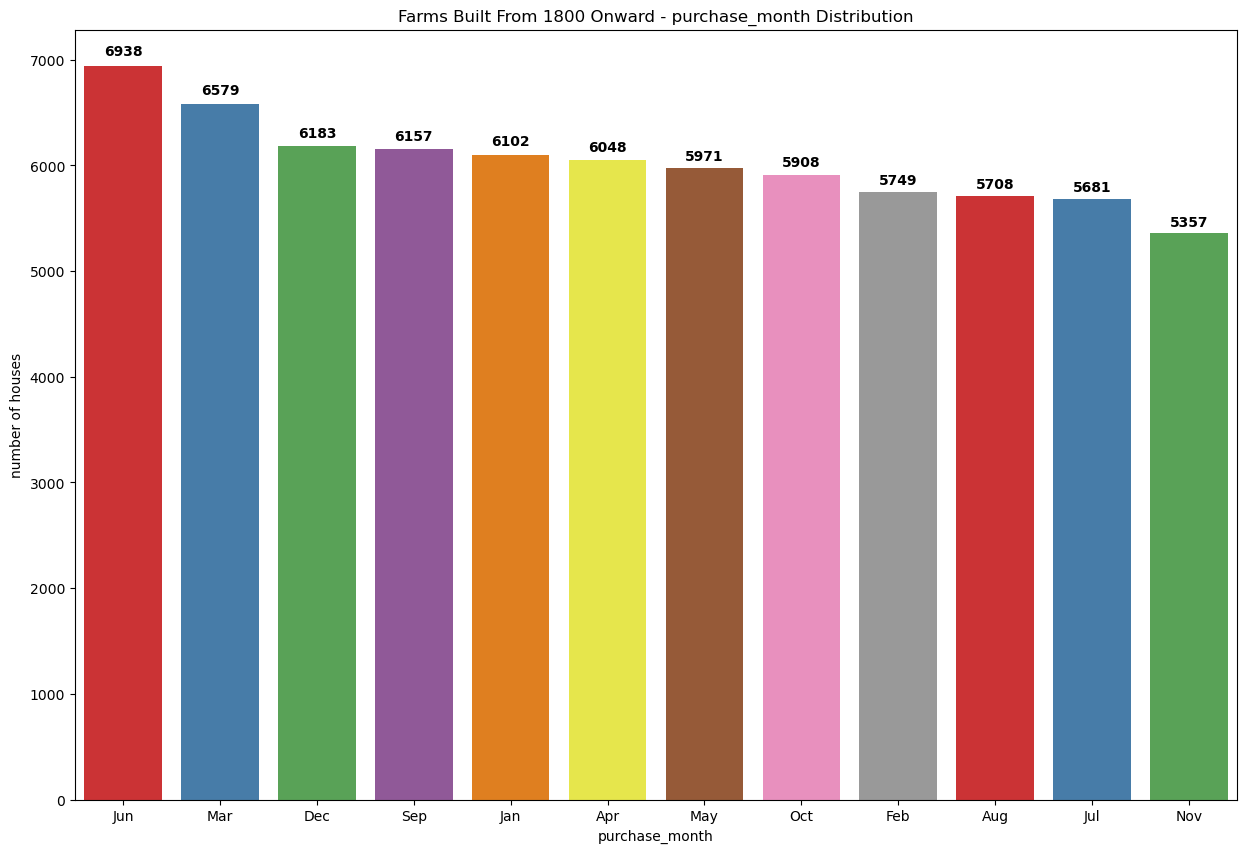

Farms Built Before 1800


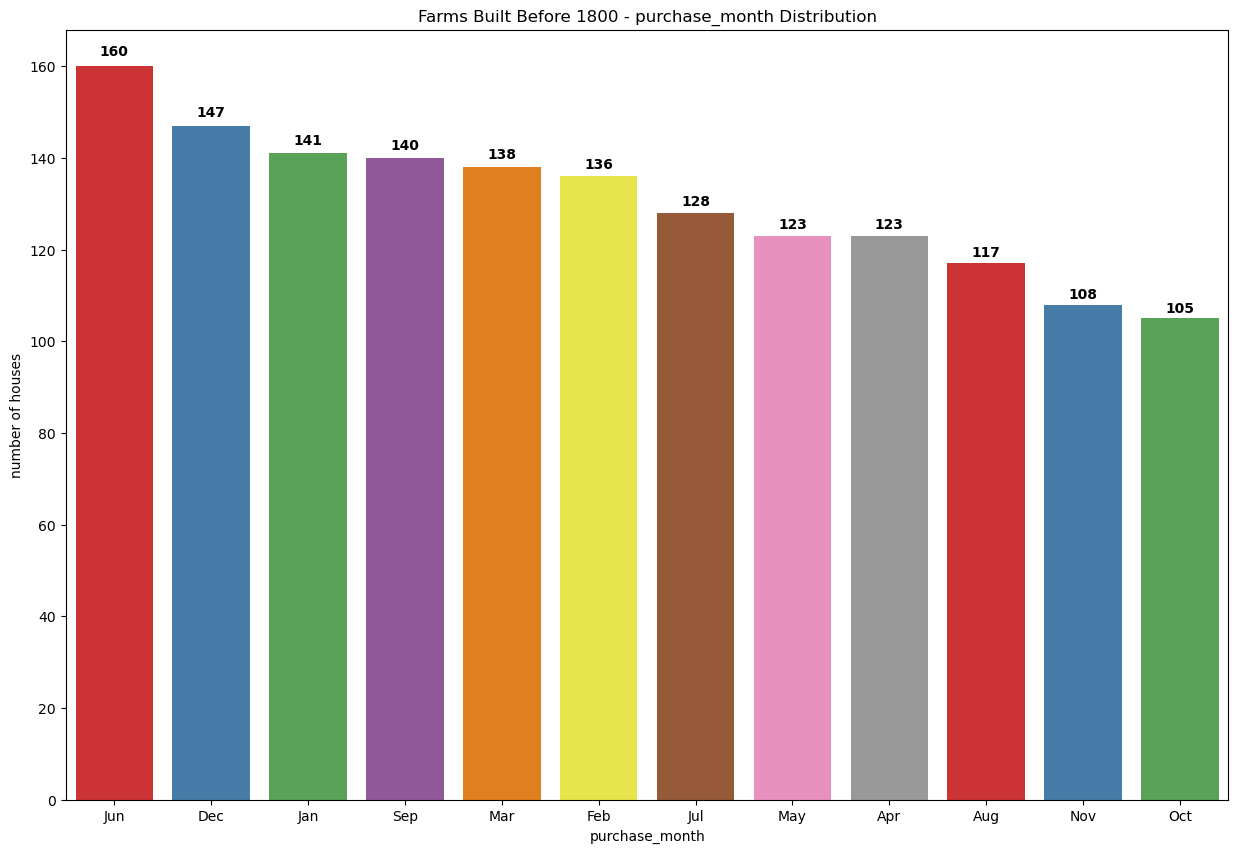

Non-Farms Built From 1900 Onward


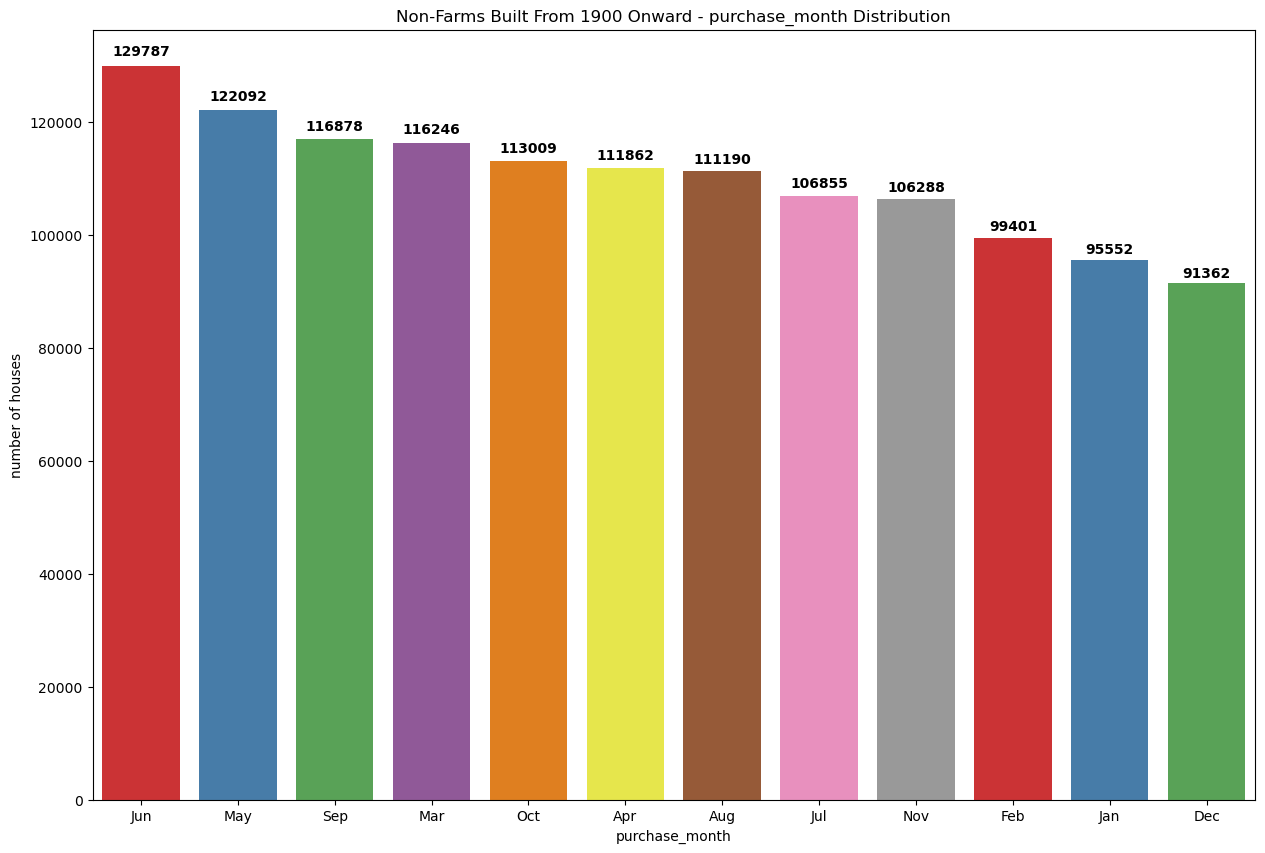

Non-Farms Built Before 1900


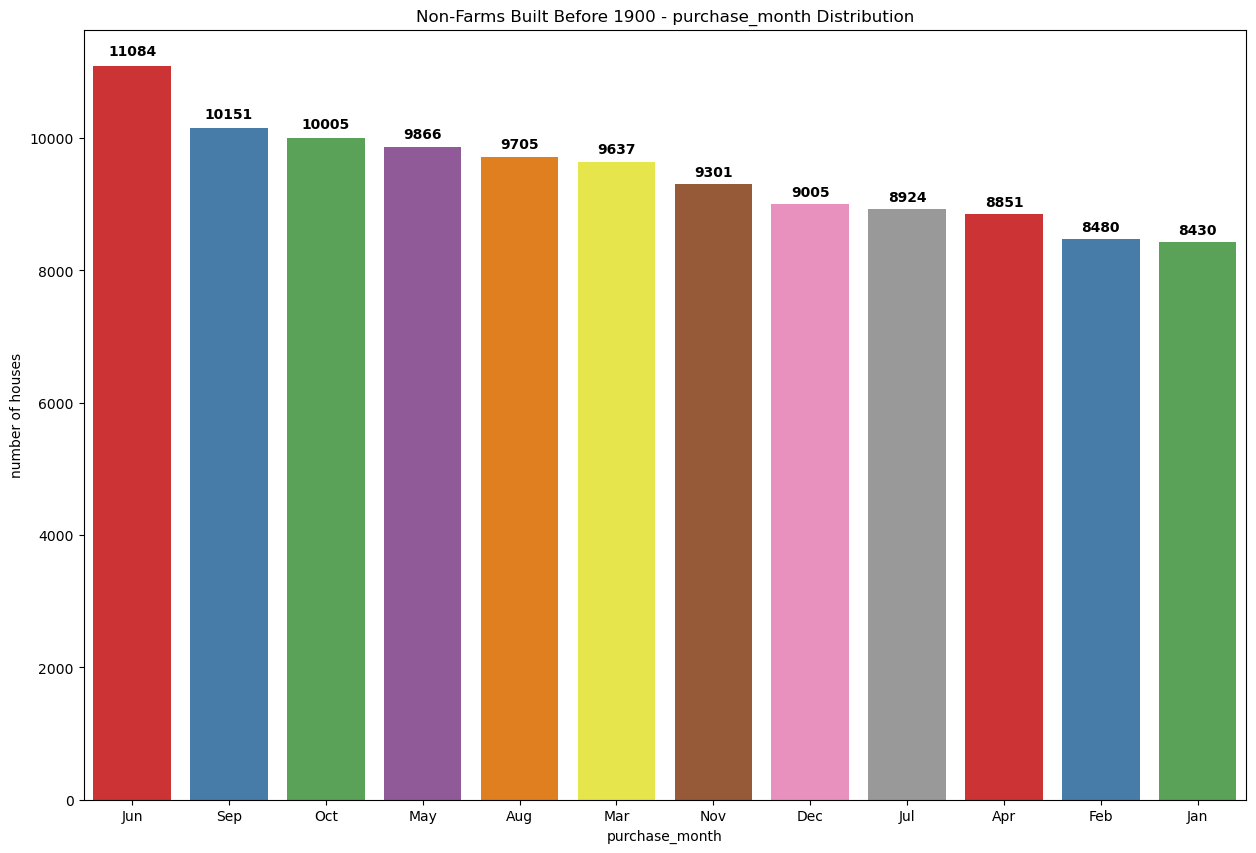

In [60]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    purchase_month_counts = df['purchase_month'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_purchase_month_categories = purchase_month_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(data=df, x='purchase_month', palette='Set1', order=sorted_purchase_month_categories)
    
    ax.set_title(f"{title} - purchase_month Distribution")
    ax.set_xlabel('purchase_month')
    ax.set_ylabel('number of houses')
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

#### 5.1.5. purchase_day distribution

Farms Built From 1800 Onward


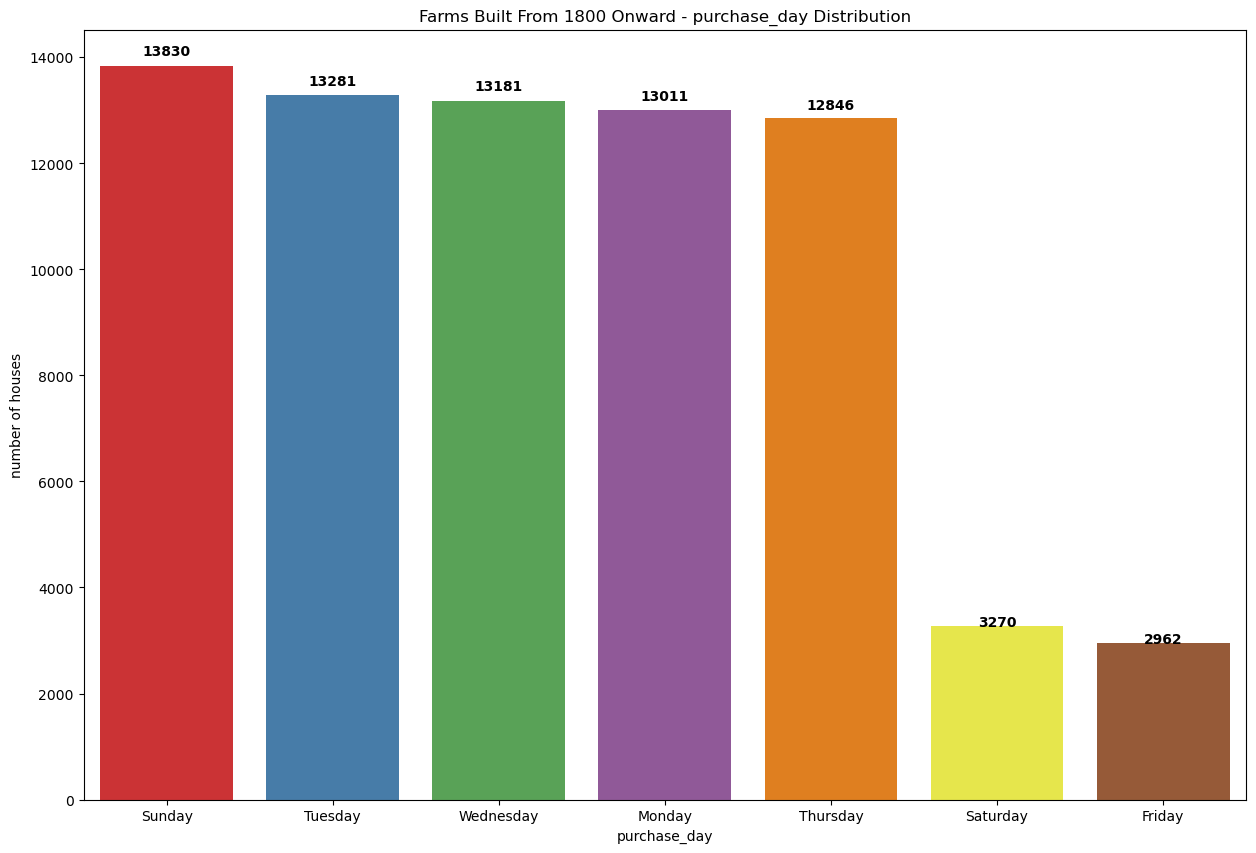

Farms Built Before 1800


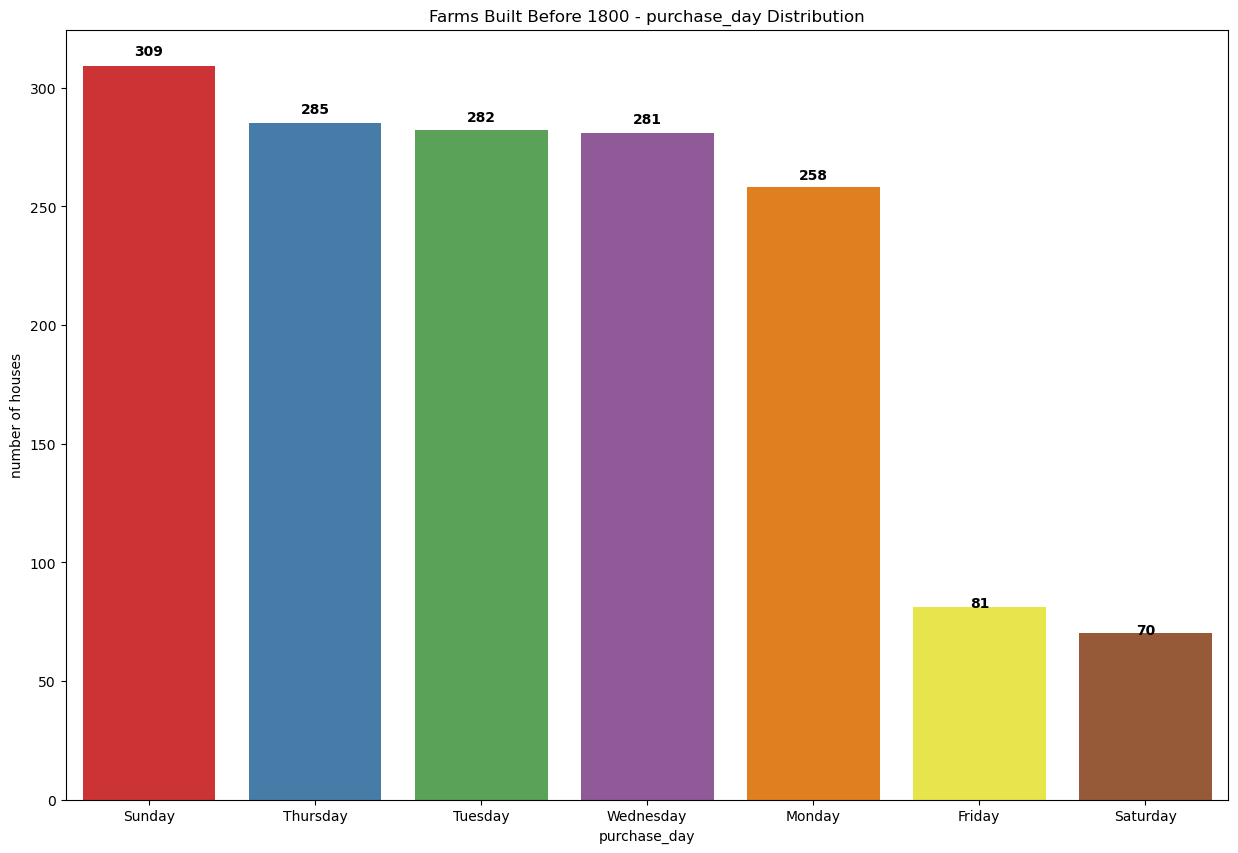

Non-Farms Built From 1900 Onward


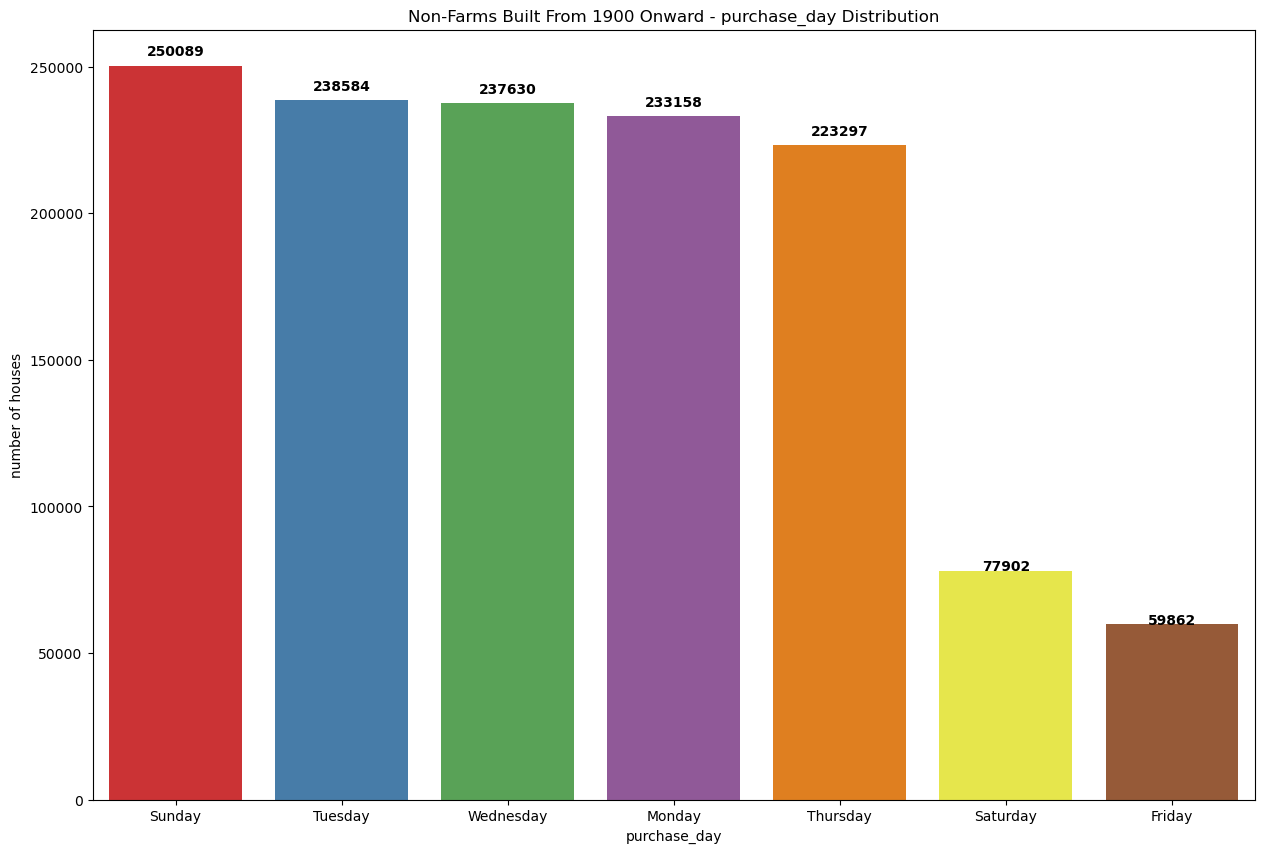

Non-Farms Built Before 1900


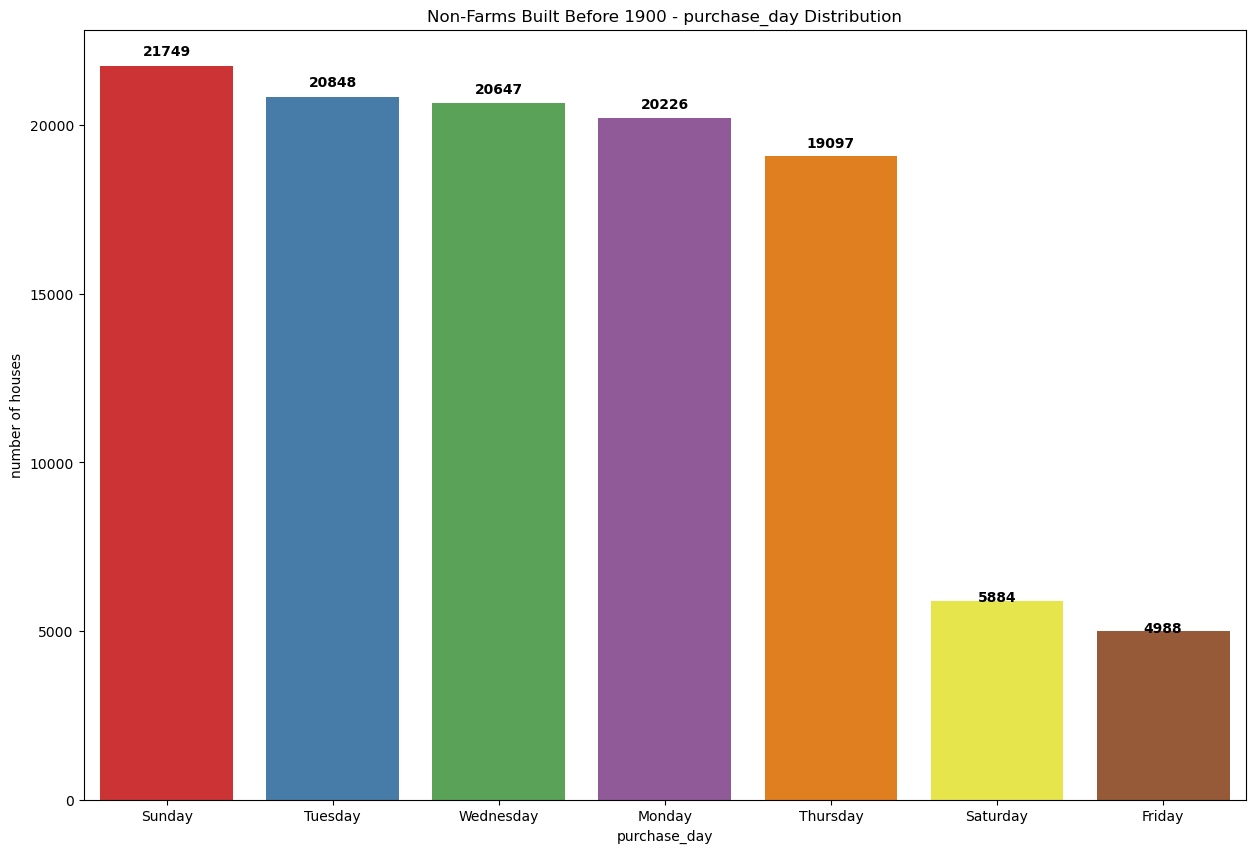

In [61]:
for title, df in dataframes:
    print(title)
    
    # Count the occurrences of each 'sales_type'
    purchase_day_counts = df['purchase_day'].value_counts()
    
    # Sort the categories by count in descending order
    sorted_purchase_day_categories = purchase_day_counts.index
    
    # Create the countplot with the sorted categories
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(data=df, x='purchase_day', palette='Set1', order=sorted_purchase_day_categories)
    
    ax.set_title(f"{title} - purchase_day Distribution")
    ax.set_xlabel('purchase_day')
    ax.set_ylabel('number of houses')
    
    #Add labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, str(int(height)), ha="center", va="center", fontsize=10, color='black', fontweight='bold')
    
    plt.show()

### 5.2. Bivariate Analysis

In [62]:
df.head()

purchase_date  house_id house_type    sales_type  year_built  \
15    2024-10-24        13  Apartment  regular_sale        1885   
47    2024-10-23        25  Apartment   family_sale        1896   
48    2024-10-23        26  Apartment   family_sale        1896   
54    2024-10-23        24  Townhouse  regular_sale        1777   
76    2024-10-22        97      Villa  regular_sale        1870   

    purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
15         3400000                               0.0                2   
47          640000                               0.0                4   
48          640000                               0.0                2   
54          675000                               0.0                3   
76          550000                               0.0                5   

    house_size_sqm  house_sqm_price             city                 area  \
15            46.0     73913.046875  Frederiksberg C  Capital, Copenhagen   
47            84.0      7619.047852       Nykøbing F        Other islands   
48            33.0     19393.939453       Nykøbing F        Other islands   
54            49.0     13775.509766        Rudkøbing        Fyn & islands   
76           117.0      4700.854492         Avernakø        Fyn & islands   

           region  nominal_interest_rate_percent  \
15        Zealand                            3.1   
47        Zealand                            3.1   
48        Zealand                            3.1   
54  Fyn & islands                            3.1   
76  Fyn & islands                            3.1   

    dk_annual_inflation_rate_percent  yield_on_mortgage_bonds_percent  \
15                               NaN                              NaN   
47                               NaN                              NaN   
48                               NaN                              NaN   
54                               NaN                              NaN   
76                               NaN                              NaN   

    purchase_year  purchase_quarter purchase_month purchase_day  
15           2024                 4            Oct     Thursday  
47           2024                 4            Oct    Wednesday  
48           2024                 4            Oct    Wednesday  
54           2024                 4            Oct    Wednesday  
76           2024                 4            Oct      Tuesday

Farms Built From 1800 Onward


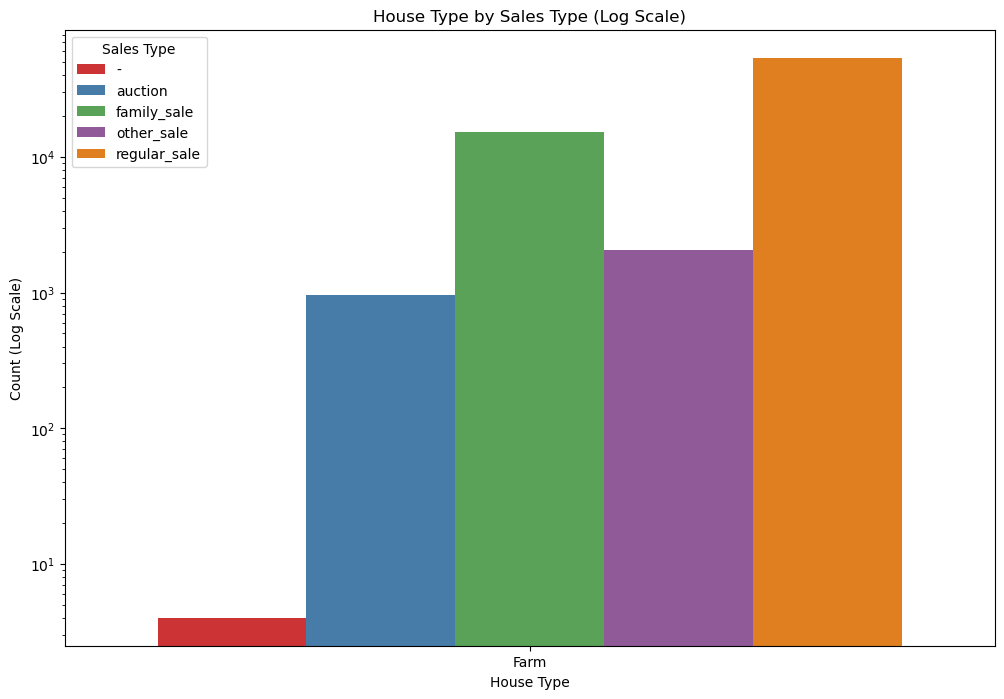

Farms Built Before 1800


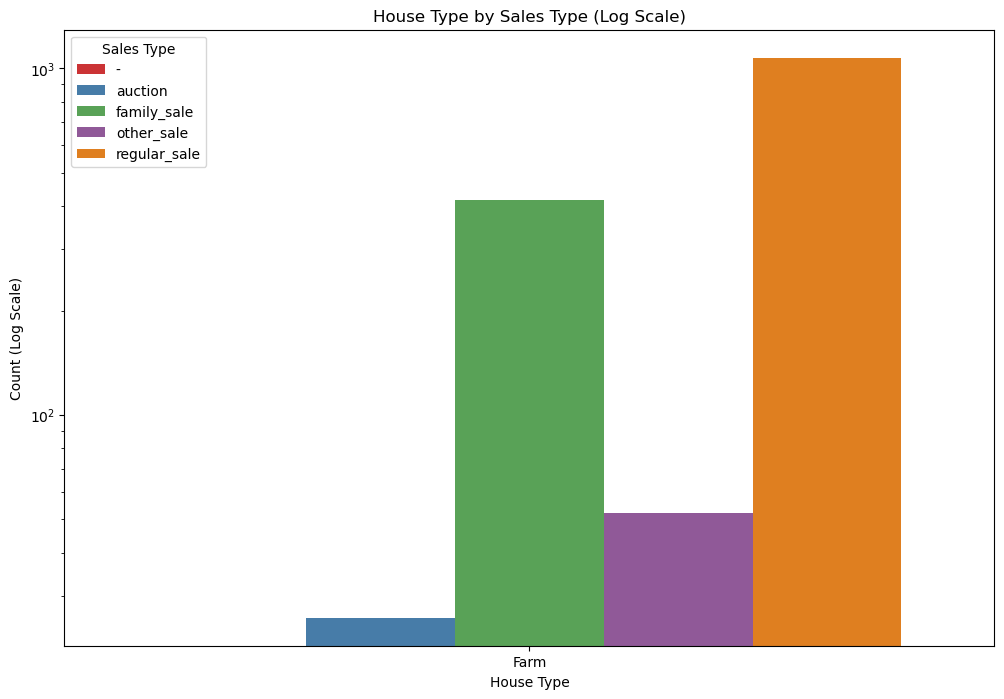

Non-Farms Built From 1900 Onward


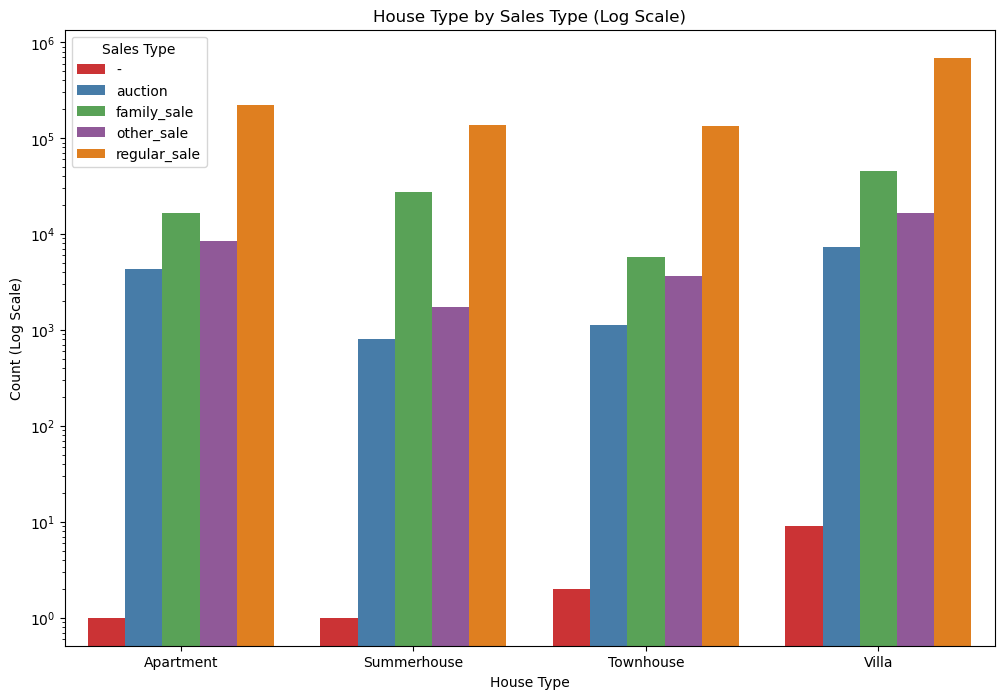

Non-Farms Built Before 1900


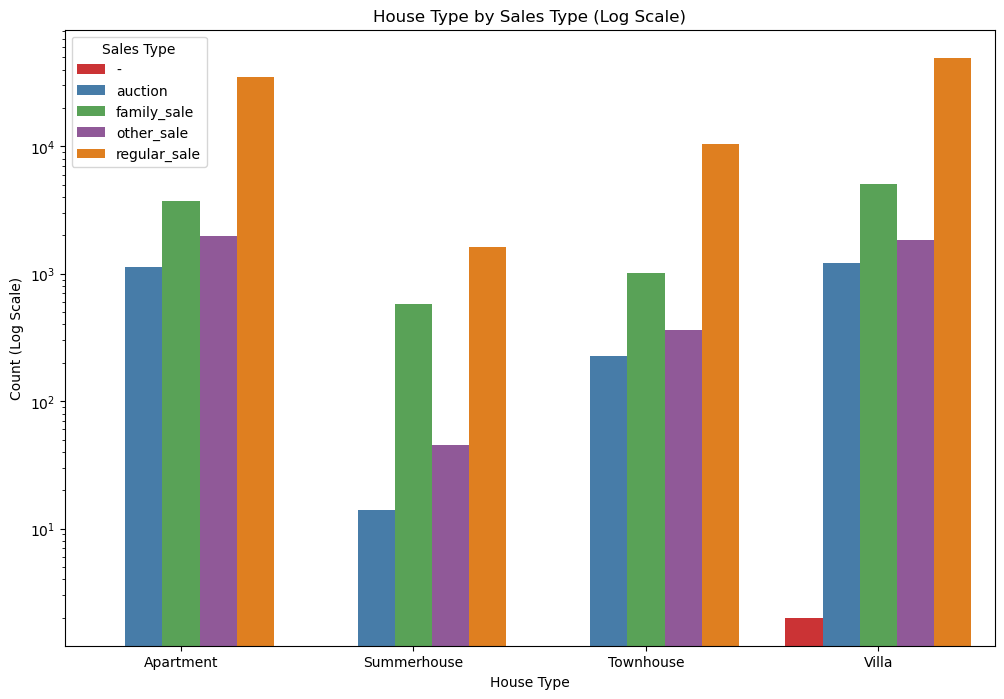

In [65]:
for title, df in dataframes:
    print(title)
    # Group by house_type and sales_type, then count occurrences
    grouped = df.groupby(['house_type', 'sales_type']).size().reset_index(name='count')

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=grouped, x='house_type', y='count', hue='sales_type', palette='Set1')

    # Apply logarithmic scaling to the y-axis
    ax.set_yscale('log')

    # Add labels and title
    plt.title('House Type by Sales Type (Log Scale)')
    plt.xlabel('House Type')
    plt.ylabel('Count (Log Scale)')
    plt.legend(title='Sales Type')

    plt.show()

Farms Built From 1800 Onward


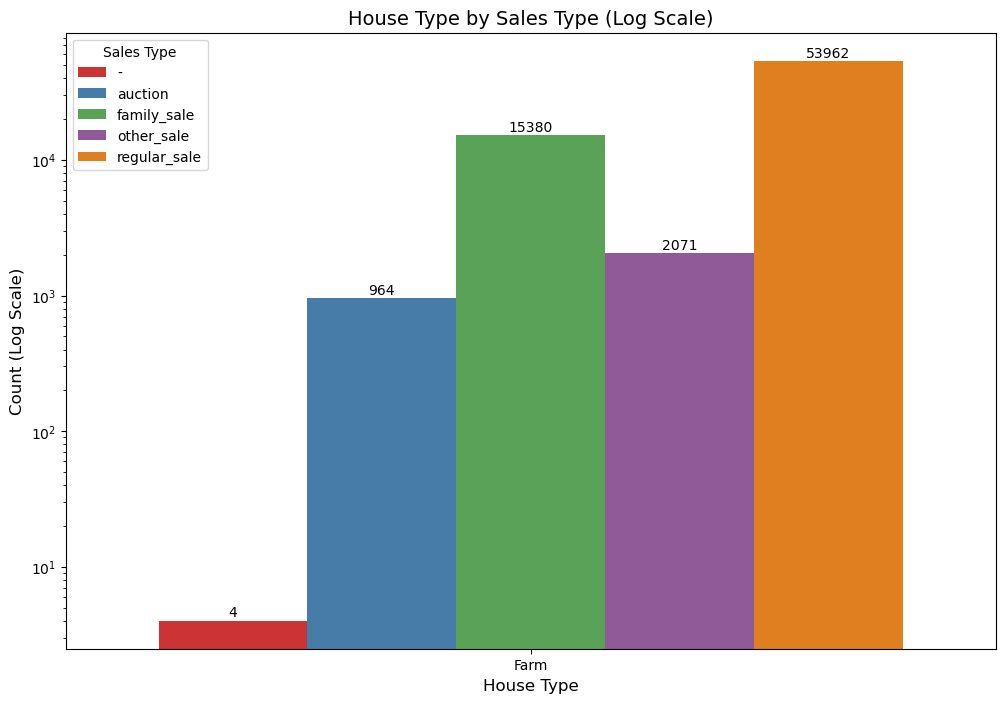

Farms Built Before 1800


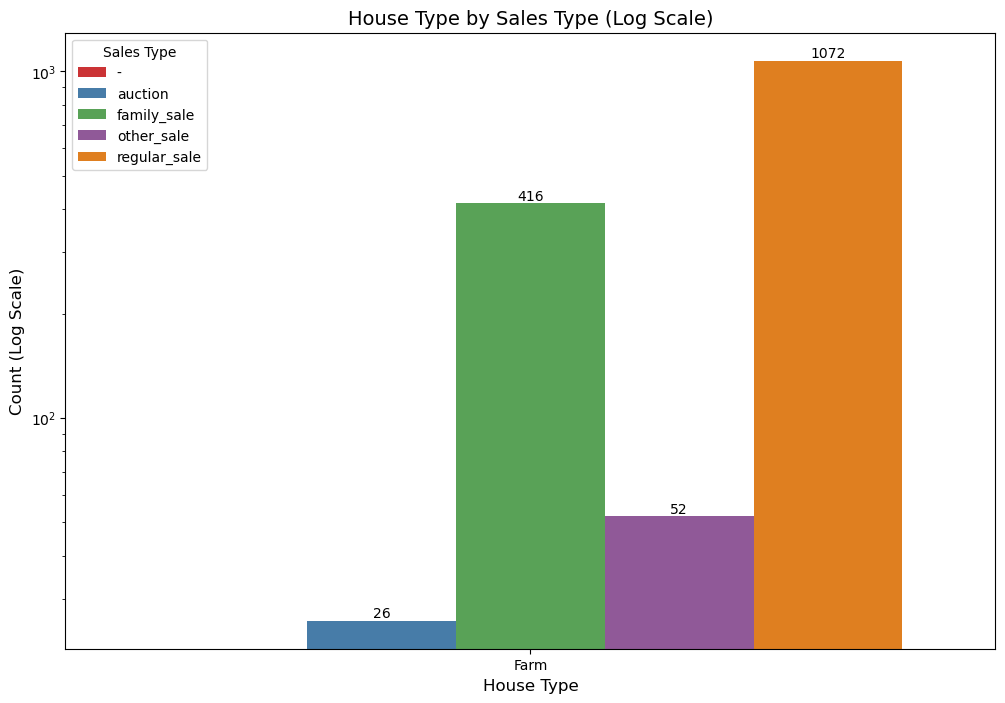

Non-Farms Built From 1900 Onward


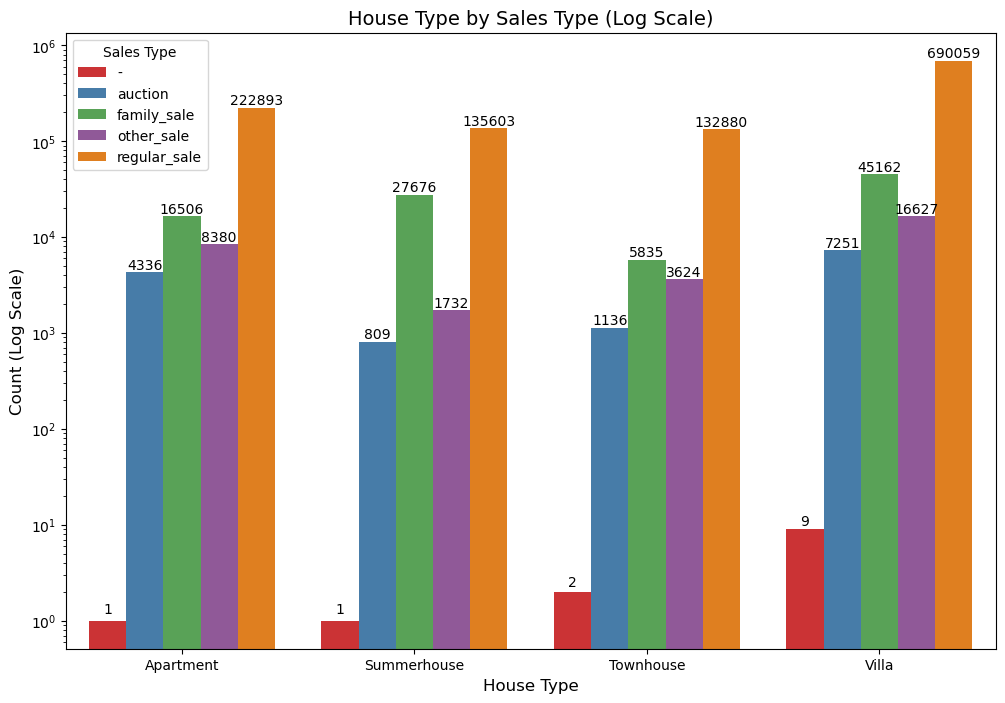

Non-Farms Built Before 1900


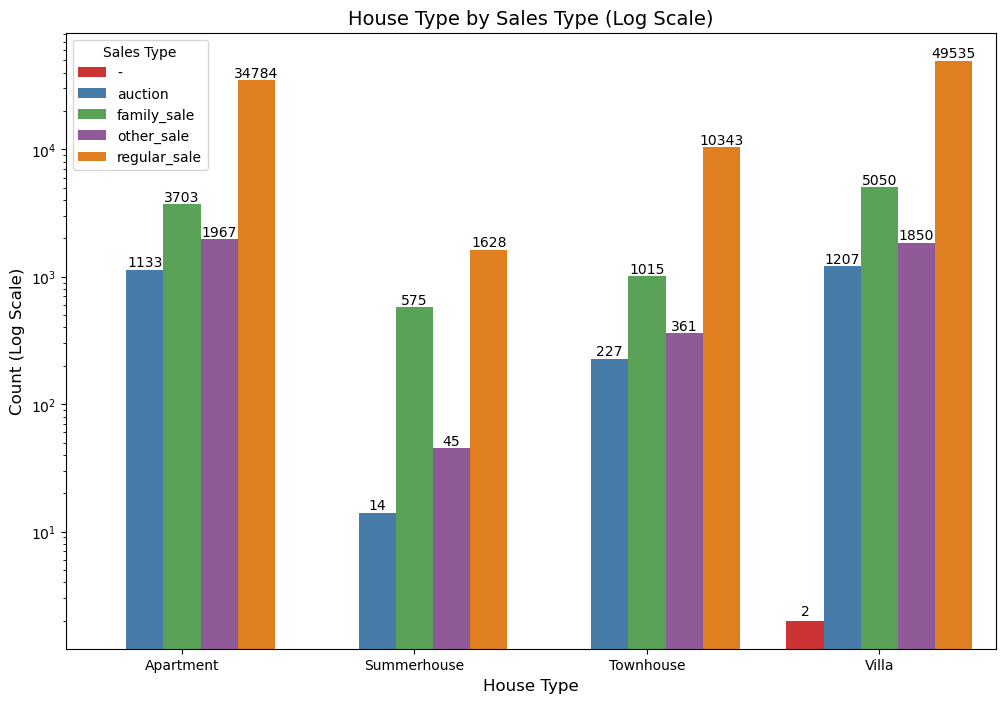

In [64]:
for title, df in dataframes:
    print(title)
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df, x='house_type', hue='sales_type', palette='Set1')

    # Set logarithmic scaling for the y-axis
    ax.set_yscale('log')

    # Add titles and labels
    plt.title('House Type by Sales Type (Log Scale)', fontsize=14)
    plt.xlabel('House Type', fontsize=12)
    plt.ylabel('Count (Log Scale)', fontsize=12)

    # Add annotations above bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Annotate only non-zero bars
            ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{int(height)}', 
                    ha='center', va='bottom', fontsize=10)

    plt.legend(title='Sales Type', fontsize=10)
    plt.show()

Farms Built From 1800 Onward


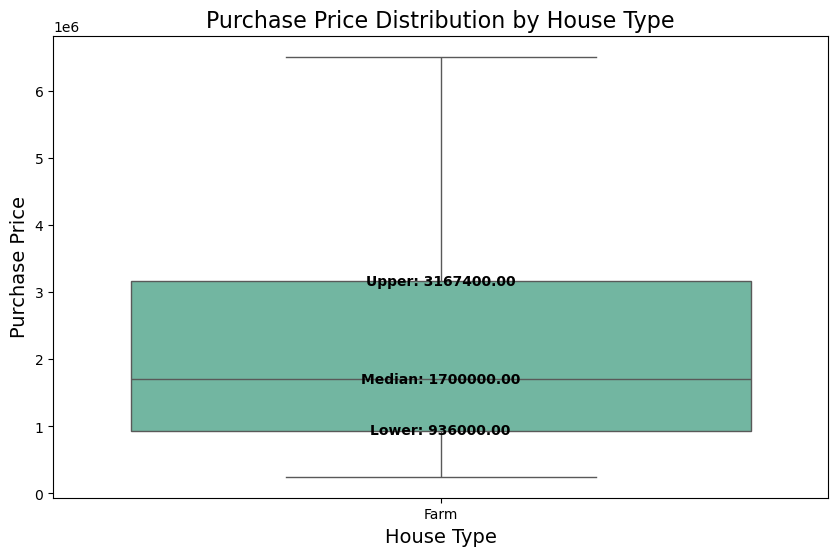

Farms Built Before 1800


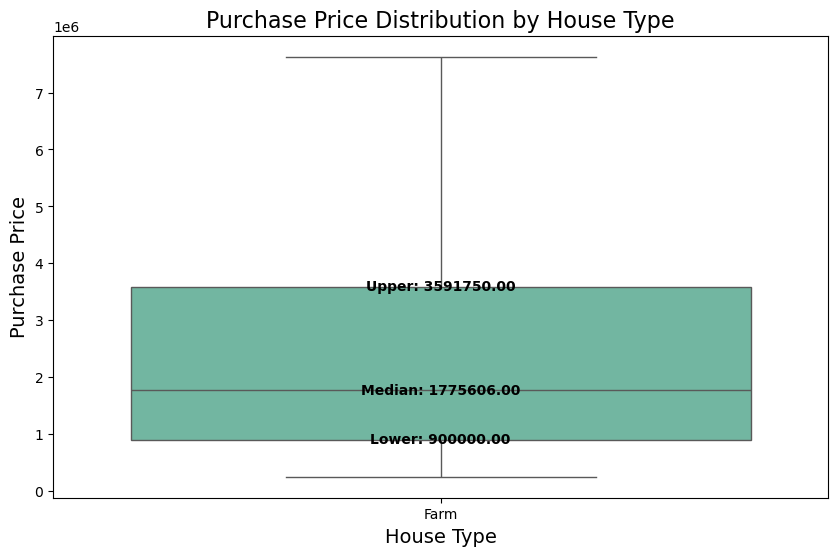

Non-Farms Built From 1900 Onward


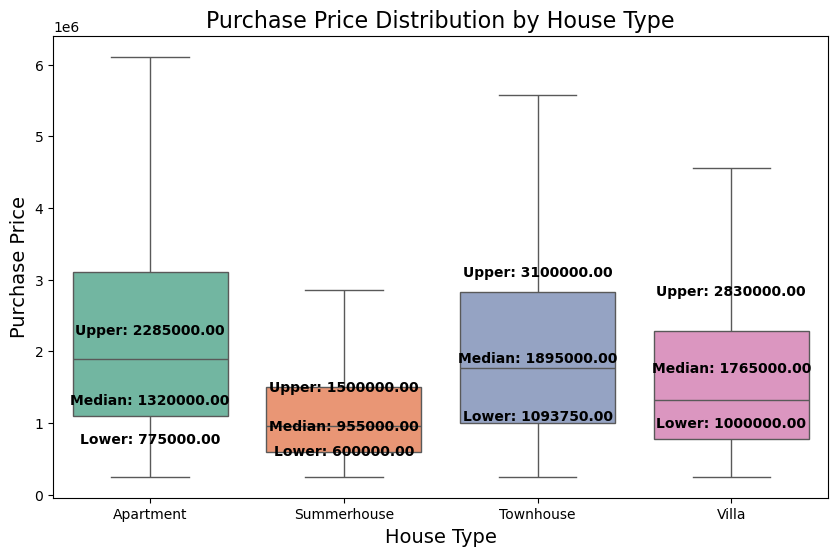

Non-Farms Built Before 1900


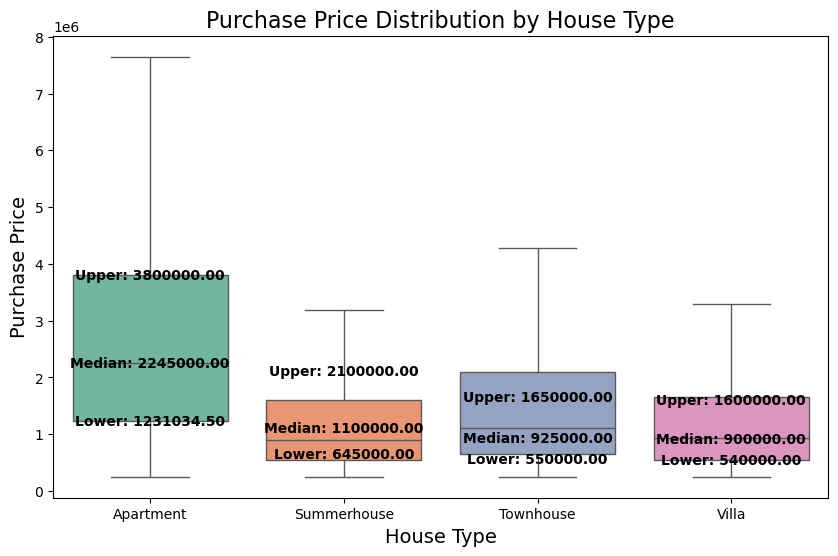

In [100]:
for title, df in dataframes:
    print(title)    
    # Assuming your dataframe is 'df' and it has 'house_type' and 'purchase_price' columns
    plt.figure(figsize=(10, 6))

    # Create a boxplot to show the distribution of 'purchase_price' for each 'house_type'
    ax = sns.boxplot(data=df, x='house_type', y='purchase_price', palette='Set2', showfliers=False)

    # Adding labels and title
    ax.set_title('Purchase Price Distribution by House Type', fontsize=16)
    ax.set_xlabel('House Type', fontsize=14)
    ax.set_ylabel('Purchase Price', fontsize=14)
    # Annotating median, lower limit, and higher limit for each box
    for i, house_type in enumerate(df['house_type'].unique()):
        # Get the data for each house_type
        house_data = df[df['house_type'] == house_type]['purchase_price']
        
        # Calculate the relevant statistics
        median = np.median(house_data)
        lower_quartile = np.percentile(house_data, 25)
        upper_quartile = np.percentile(house_data, 75)
        
        # Adding labels for median, lower limit, and higher limit
        ax.text(i, median , f'Median: {median:.2f}', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
        ax.text(i, lower_quartile, f'Lower: {lower_quartile:.2f}', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
        ax.text(i, upper_quartile, f'Upper: {upper_quartile:.2f}', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
        # Show the plot
    plt.show()

Farms Built From 1800 Onward


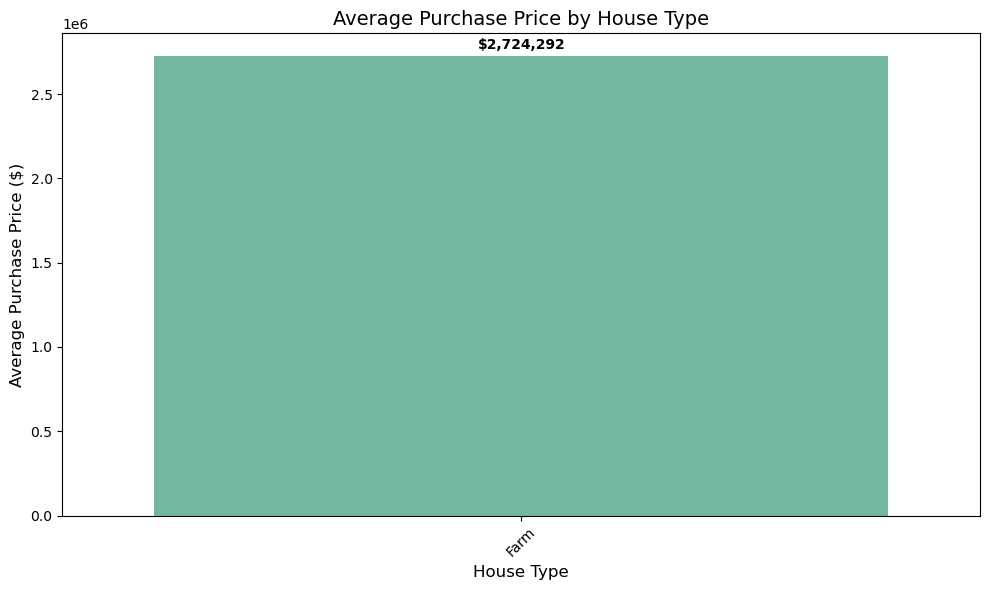

Farms Built Before 1800


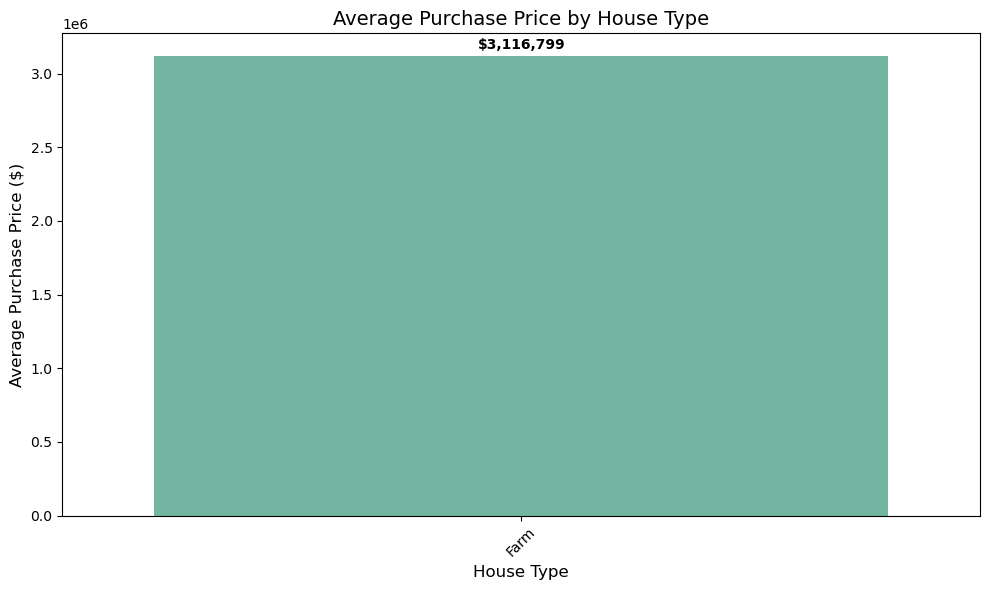

Non-Farms Built From 1900 Onward


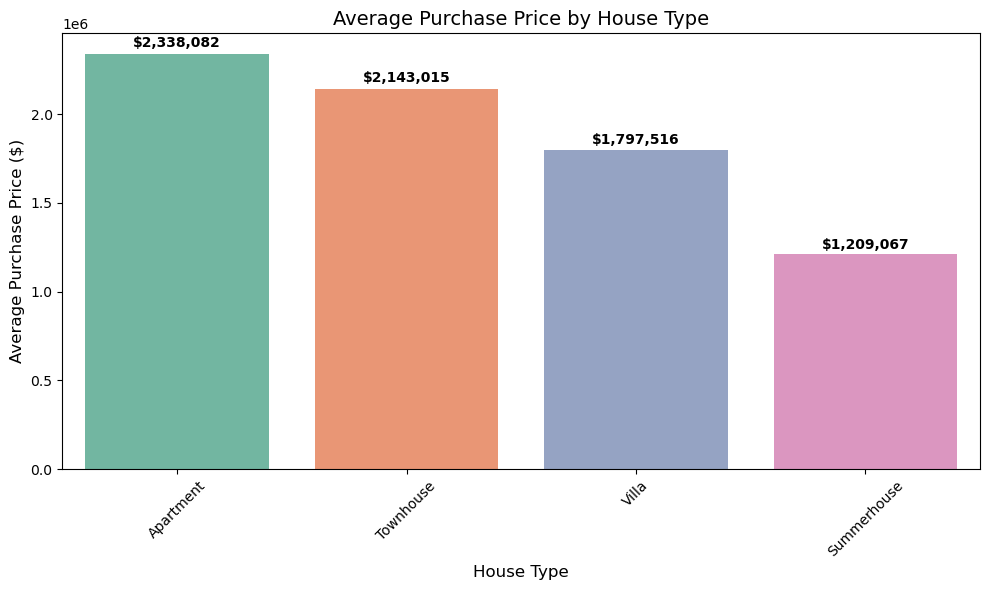

Non-Farms Built Before 1900


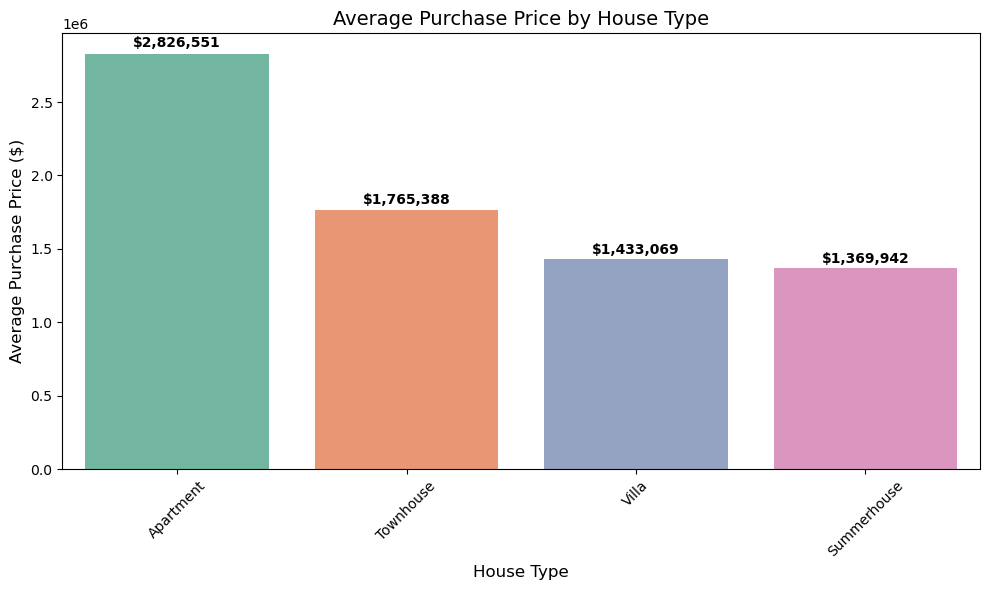

In [68]:
for title, df in dataframes:
    print(title)
    # Group data by 'house_type' and calculate the mean of 'purchase_price'
    grouped_data = df.groupby('house_type')['purchase_price'].mean().reset_index()

    # Sort values by 'purchase_price' in descending order
    grouped_data = grouped_data.sort_values(by='purchase_price', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='house_type', y='purchase_price', palette='Set2', order=grouped_data['house_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"${height:,.0f}",  # Format with commas and no decimals
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="black", 
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('Average Purchase Price by House Type', fontsize=14)
    plt.xlabel('House Type', fontsize=12)
    plt.ylabel('Average Purchase Price ($)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

Farms Built From 1800 Onward


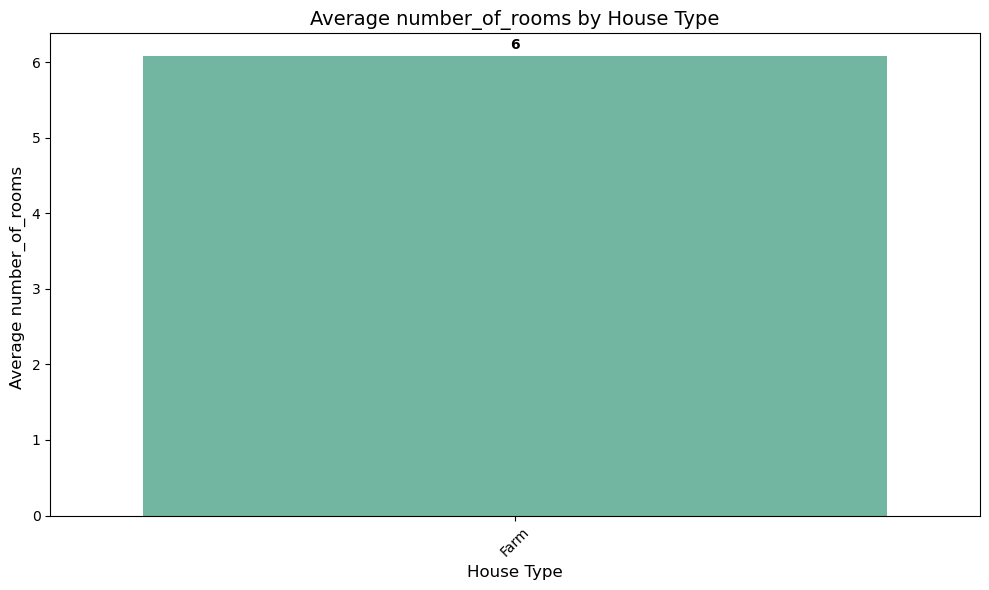

Farms Built Before 1800


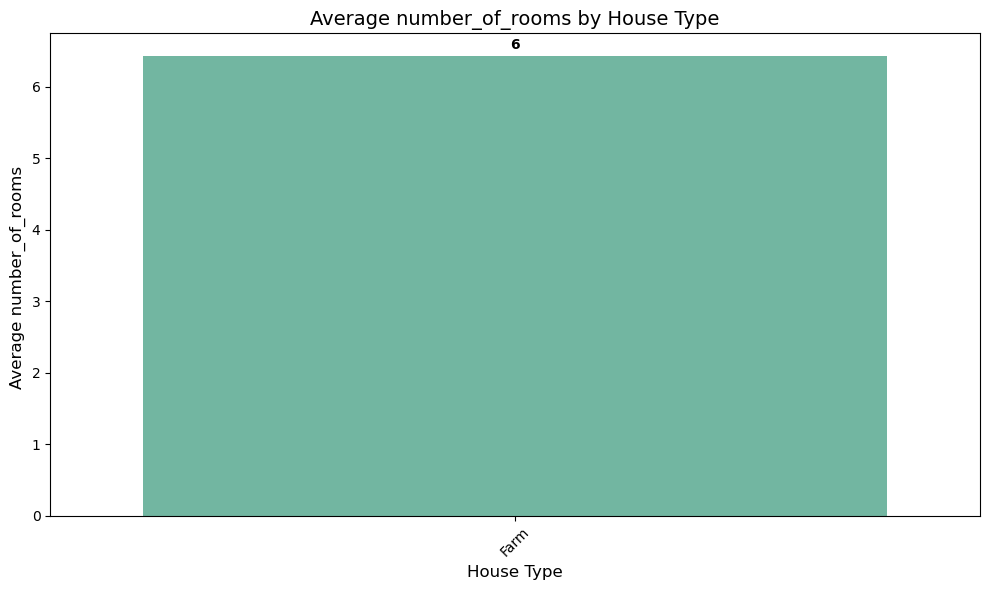

Non-Farms Built From 1900 Onward


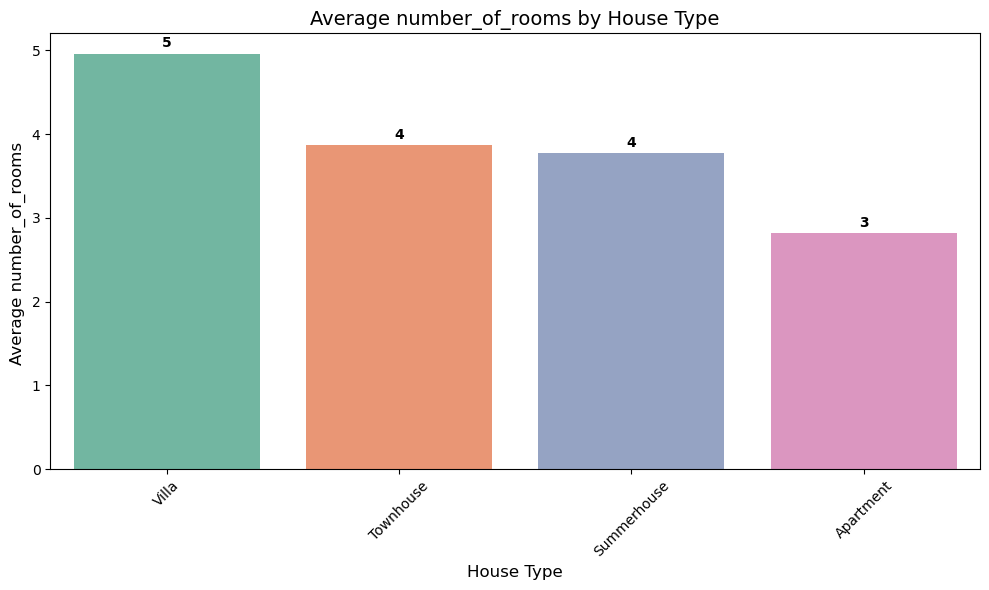

Non-Farms Built Before 1900


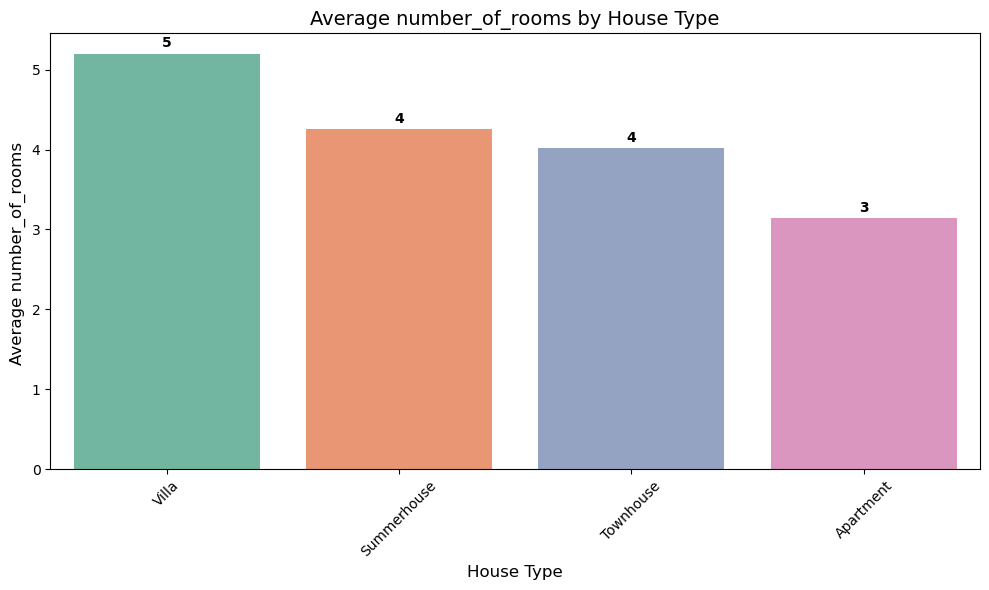

In [71]:
for title, df in dataframes:
    print(title)
    # Group data by 'house_type' and calculate the mean of 'number_of_rooms'
    grouped_data = df.groupby('house_type')['number_of_rooms'].mean().reset_index()

    # Sort values by 'number_of_rooms' in descending order
    grouped_data = grouped_data.sort_values(by='number_of_rooms', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='house_type', y='number_of_rooms', palette='Set2', order=grouped_data['house_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"{height:,.0f}",  # Format with commas and no decimals
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="black", 
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('Average number_of_rooms by House Type', fontsize=14)
    plt.xlabel('House Type', fontsize=12)
    plt.ylabel('Average number_of_rooms ', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

Farms Built From 1800 Onward


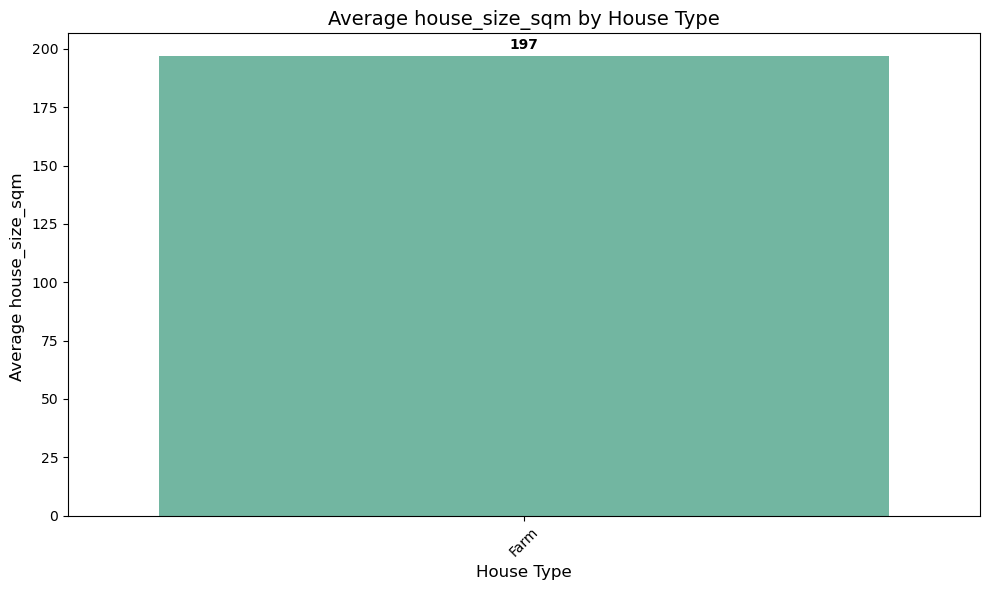

Farms Built Before 1800


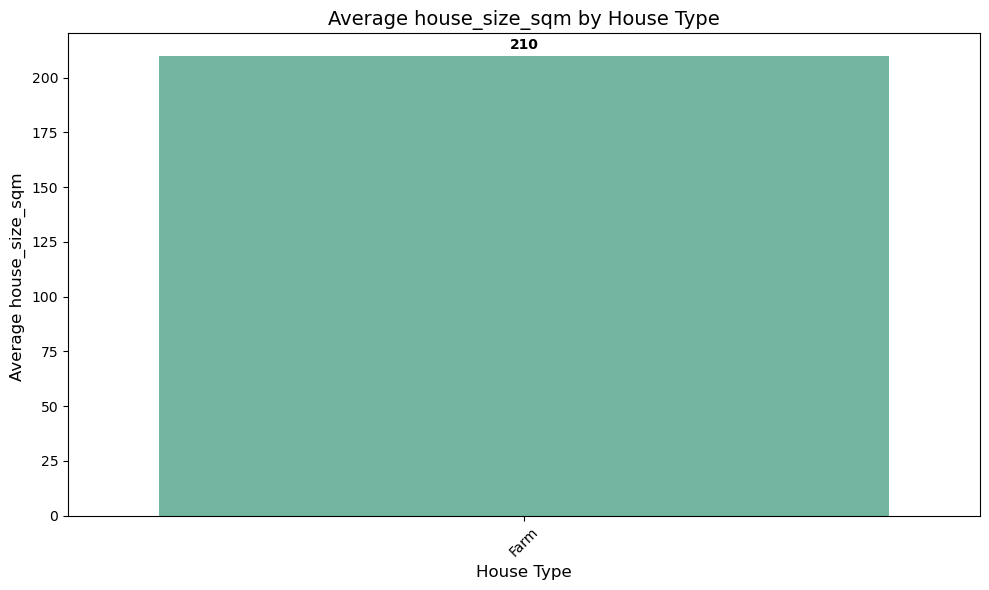

Non-Farms Built From 1900 Onward


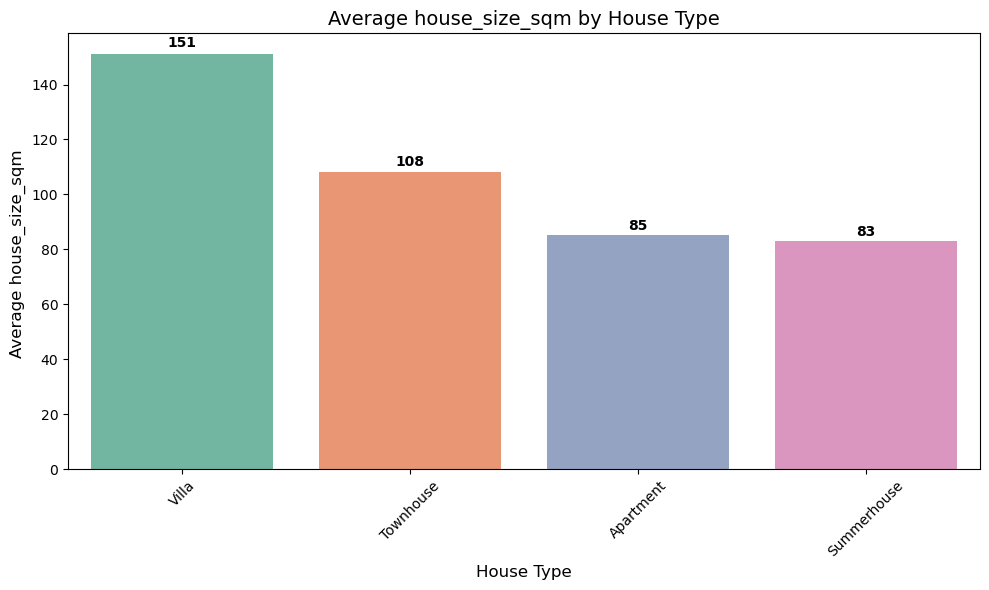

Non-Farms Built Before 1900


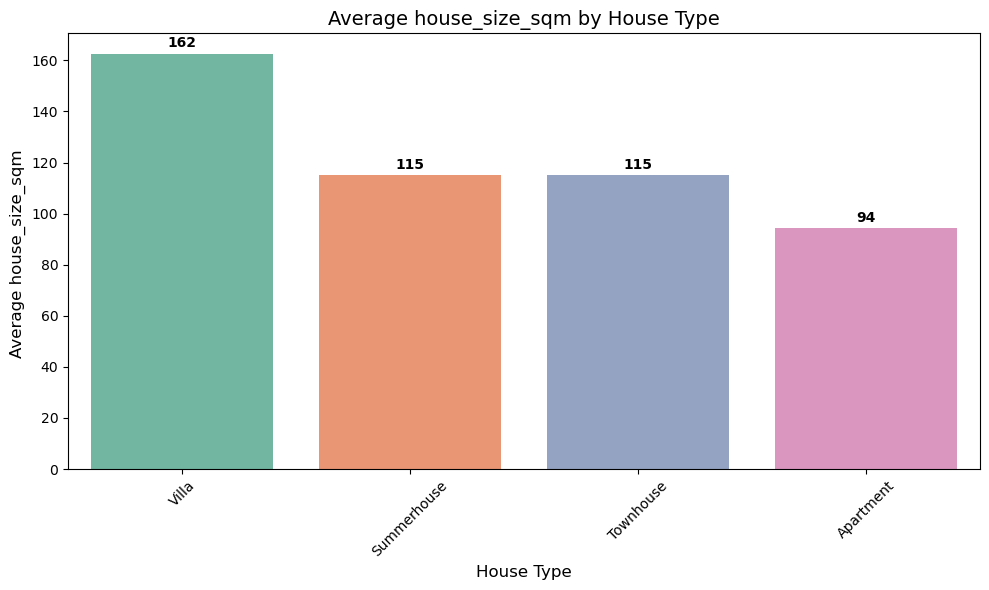

In [72]:
for title, df in dataframes:
    print(title)
    # Group data by 'house_type' and calculate the mean of 'house_size_sqm'
    grouped_data = df.groupby('house_type')['house_size_sqm'].mean().reset_index()

    # Sort values by 'house_size_sqm' in descending order
    grouped_data = grouped_data.sort_values(by='house_size_sqm', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='house_type', y='house_size_sqm', palette='Set2', order=grouped_data['house_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"{height:,.0f}",  # Format with commas and no decimals
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="black", 
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('Average house_size_sqm by House Type', fontsize=14)
    plt.xlabel('House Type', fontsize=12)
    plt.ylabel('Average house_size_sqm ', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

Farms Built From 1800 Onward


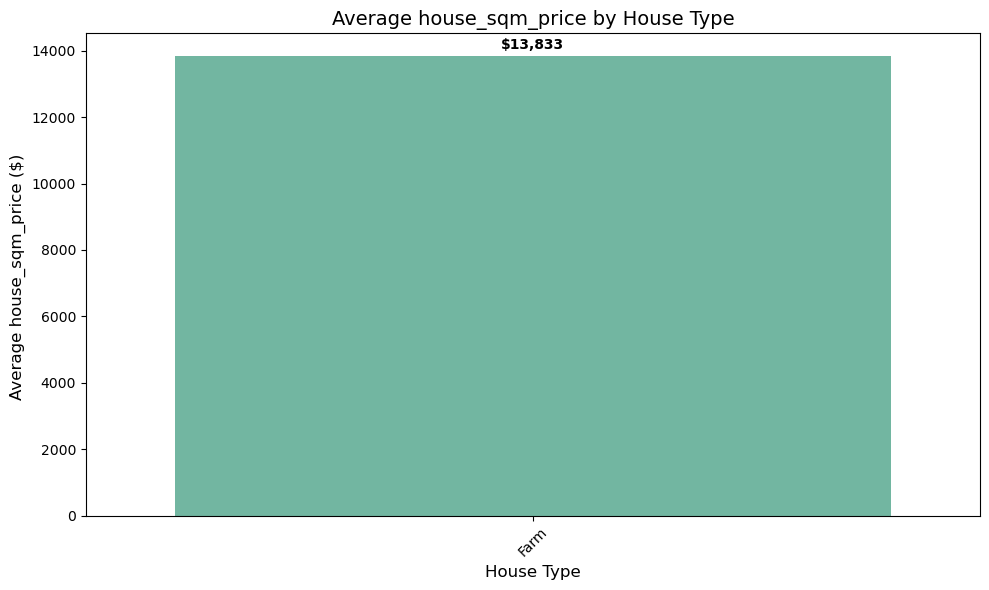

Farms Built Before 1800


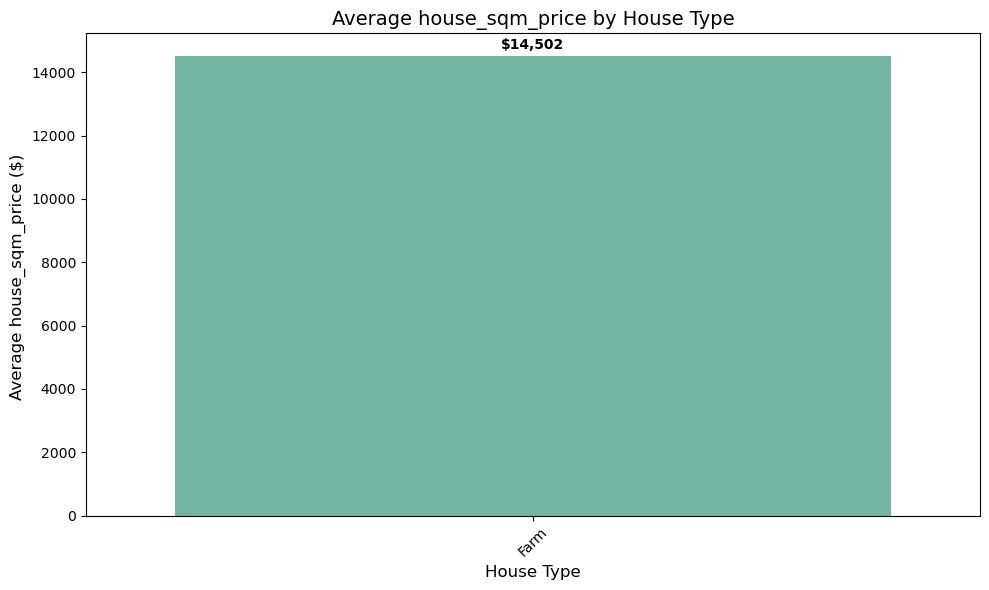

Non-Farms Built From 1900 Onward


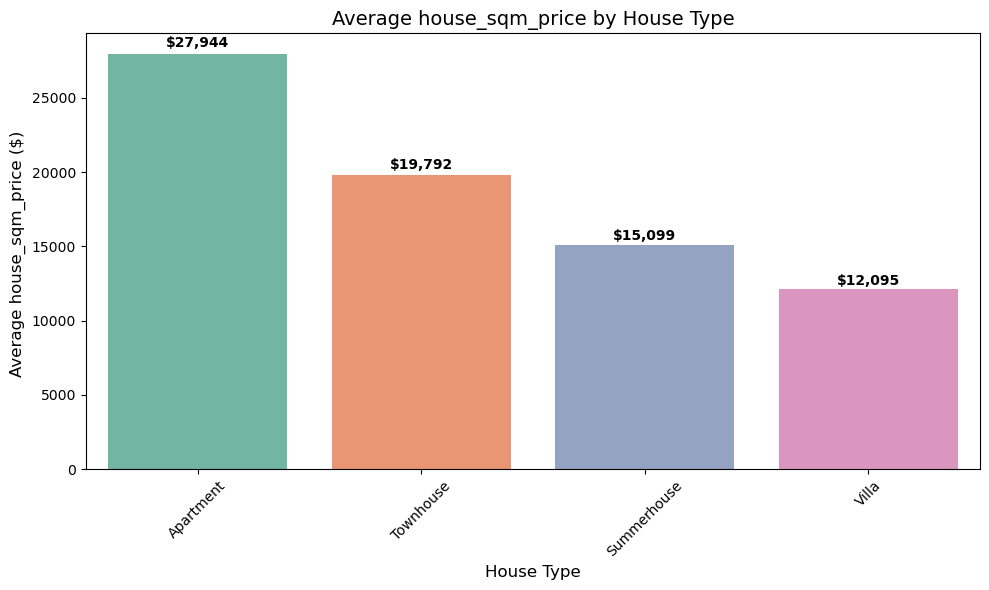

Non-Farms Built Before 1900


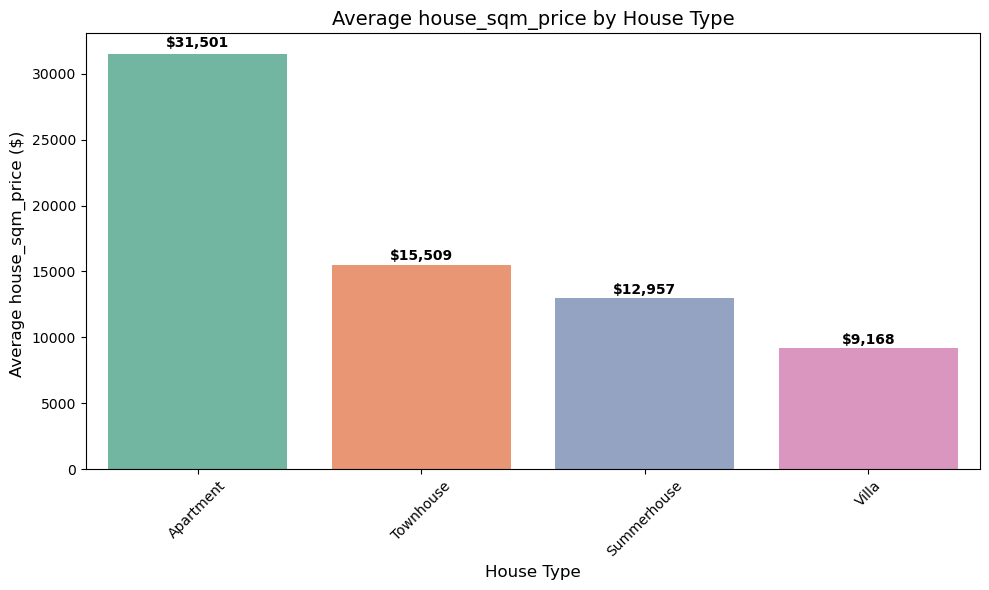

In [78]:
for title, df in dataframes:
    print(title)
    # Group data by 'house_type' and calculate the mean of 'house_sqm_price'
    grouped_data = df.groupby('house_type')['house_sqm_price'].mean().reset_index()

    # Sort values by 'house_sqm_price' in descending order
    grouped_data = grouped_data.sort_values(by='house_sqm_price', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='house_type', y='house_sqm_price', palette='Set2', order=grouped_data['house_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"${height:,.0f}",  # Format with commas and no decimals
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="black", 
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('Average house_sqm_price by House Type', fontsize=14)
    plt.xlabel('House Type', fontsize=12)
    plt.ylabel('Average house_sqm_price ($) ', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

In [79]:
df.head()

purchase_date  house_id house_type    sales_type  year_built  \
15    2024-10-24        13  Apartment  regular_sale        1885   
47    2024-10-23        25  Apartment   family_sale        1896   
48    2024-10-23        26  Apartment   family_sale        1896   
54    2024-10-23        24  Townhouse  regular_sale        1777   
76    2024-10-22        97      Villa  regular_sale        1870   

    purchase_price  offer_to_purchase_change_percent  number_of_rooms  \
15         3400000                               0.0                2   
47          640000                               0.0                4   
48          640000                               0.0                2   
54          675000                               0.0                3   
76          550000                               0.0                5   

    house_size_sqm  house_sqm_price             city                 area  \
15            46.0     73913.046875  Frederiksberg C  Capital, Copenhagen   
47            84.0      7619.047852       Nykøbing F        Other islands   
48            33.0     19393.939453       Nykøbing F        Other islands   
54            49.0     13775.509766        Rudkøbing        Fyn & islands   
76           117.0      4700.854492         Avernakø        Fyn & islands   

           region  nominal_interest_rate_percent  \
15        Zealand                            3.1   
47        Zealand                            3.1   
48        Zealand                            3.1   
54  Fyn & islands                            3.1   
76  Fyn & islands                            3.1   

    dk_annual_inflation_rate_percent  yield_on_mortgage_bonds_percent  \
15                               NaN                              NaN   
47                               NaN                              NaN   
48                               NaN                              NaN   
54                               NaN                              NaN   
76                               NaN                              NaN   

    purchase_year  purchase_quarter purchase_month purchase_day  
15           2024                 4            Oct     Thursday  
47           2024                 4            Oct    Wednesday  
48           2024                 4            Oct    Wednesday  
54           2024                 4            Oct    Wednesday  
76           2024                 4            Oct      Tuesday

Farms Built From 1800 Onward


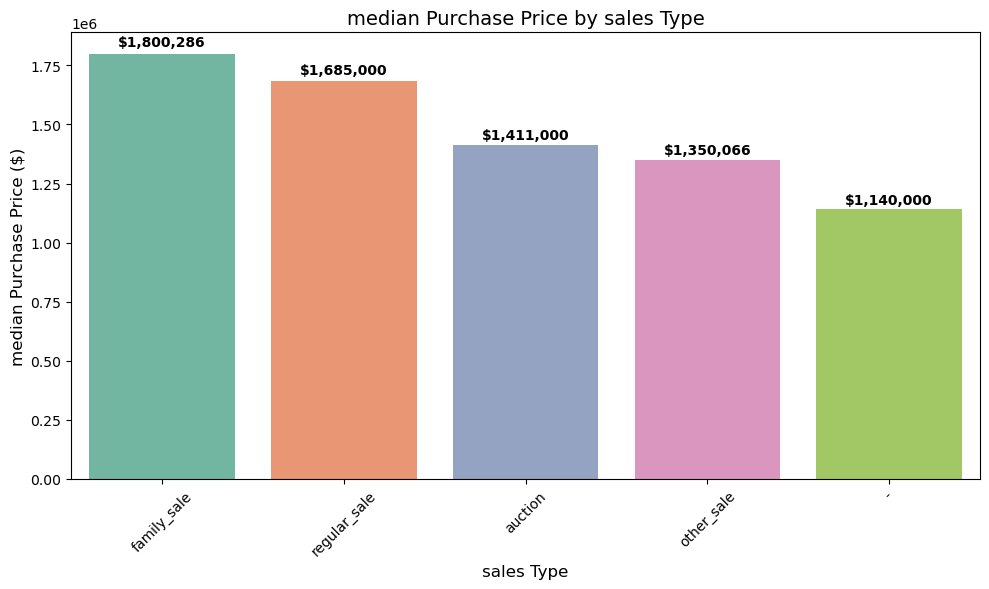

Farms Built Before 1800


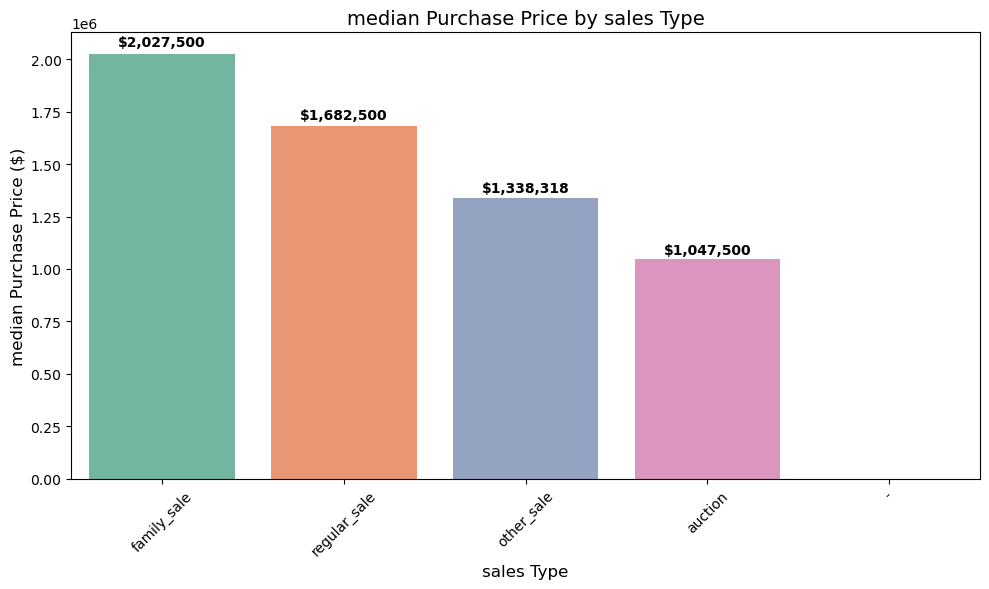

Non-Farms Built From 1900 Onward


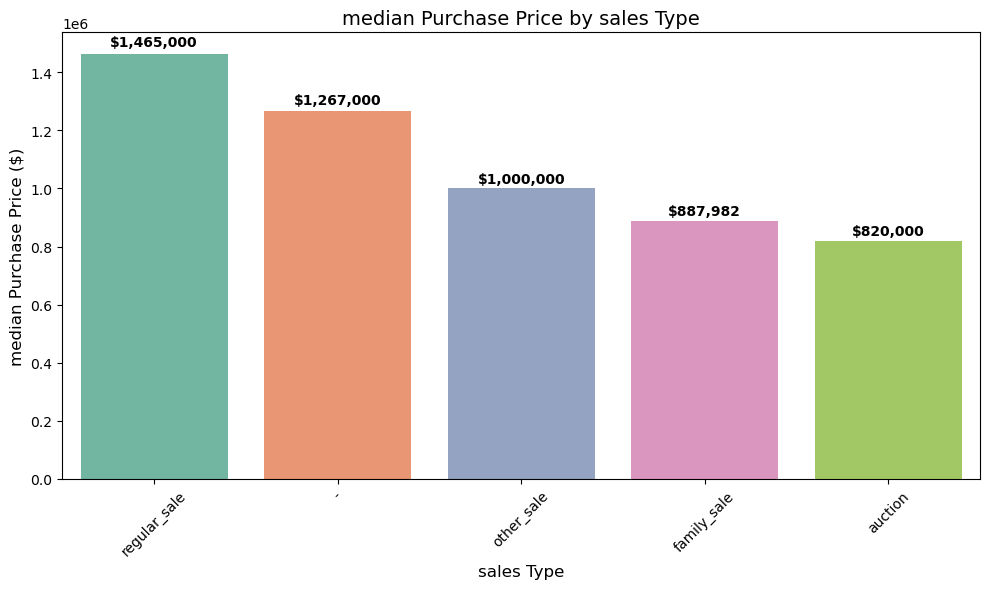

Non-Farms Built Before 1900


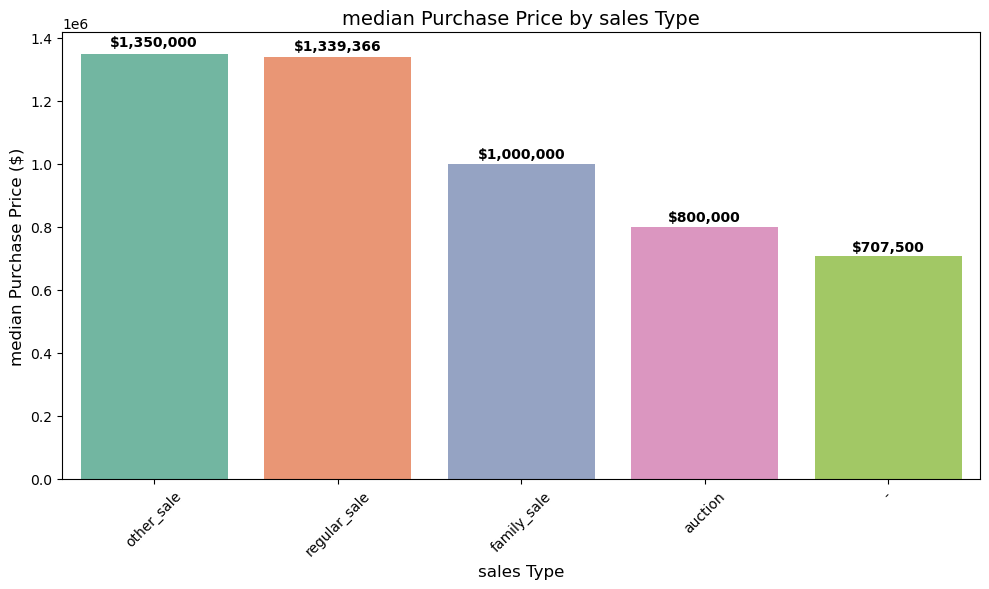

In [ ]:
for title, df in dataframes:
    print(title)
    # Group data by 'sales_type' and calculate the median of 'purchase_price'
    grouped_data = df.groupby('sales_type')['purchase_price'].median().reset_index()

    # Sort values by 'purchase_price' in descending order
    grouped_data = grouped_data.sort_values(by='purchase_price', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='sales_type', y='purchase_price', palette='Set2', order=grouped_data['sales_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"${height:,.0f}",  # Format with commas and no decimals
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="black", 
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('median Purchase Price by sales Type', fontsize=14)
    plt.xlabel('sales Type', fontsize=12)
    plt.ylabel('median Purchase Price ($)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

Farms Built From 1800 Onward


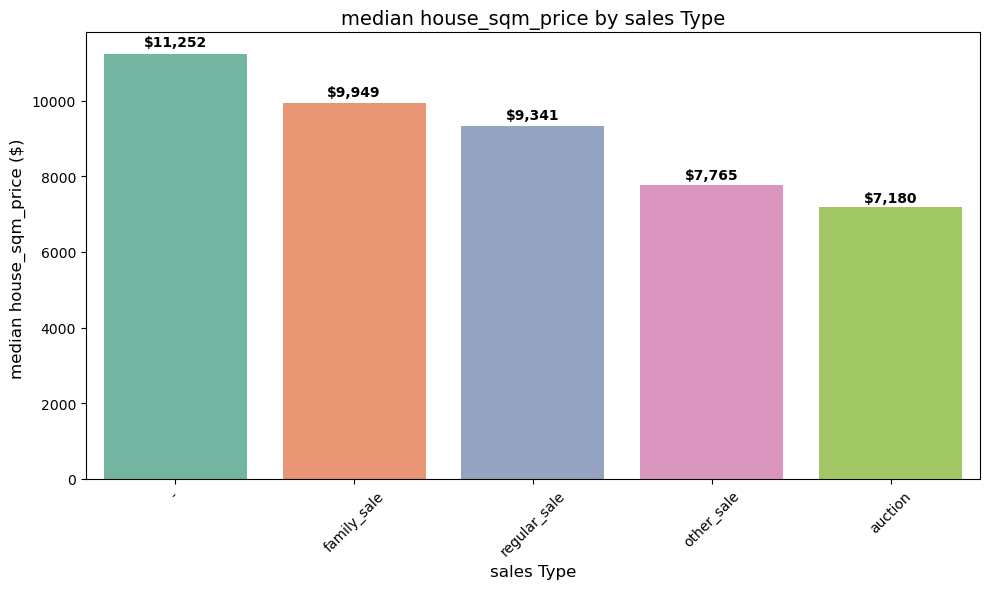

Farms Built Before 1800


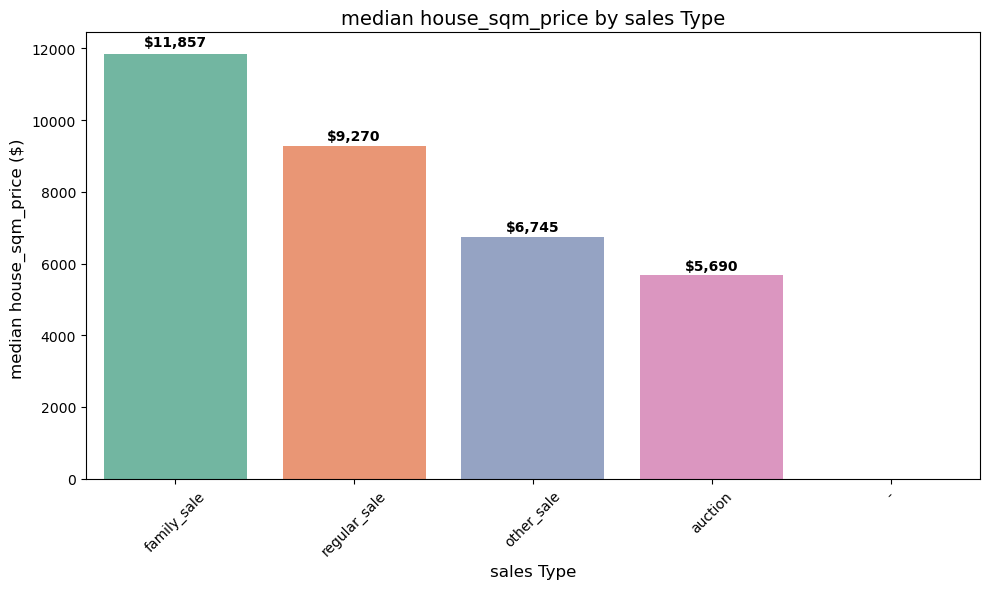

Non-Farms Built From 1900 Onward


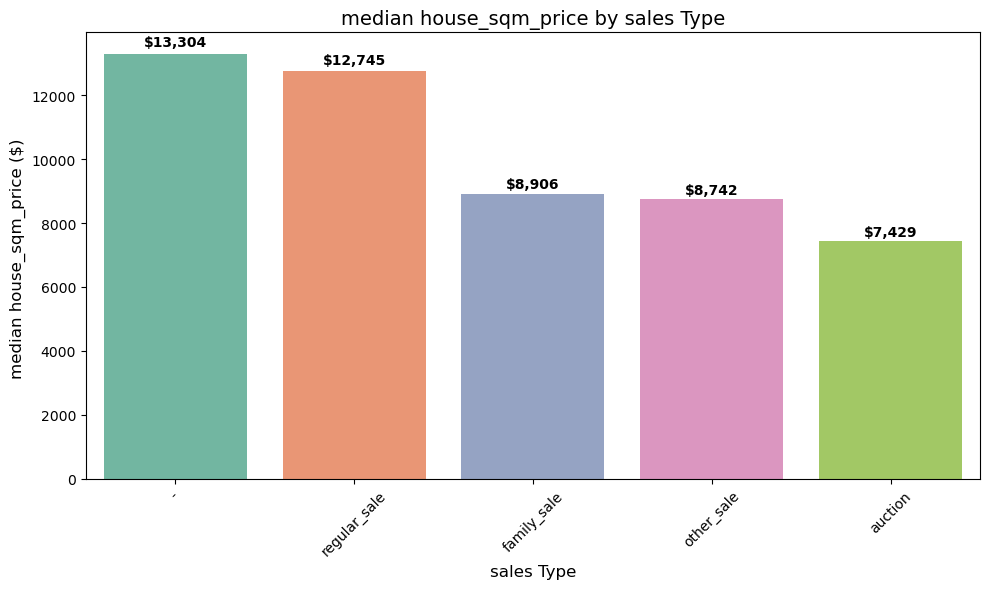

Non-Farms Built Before 1900


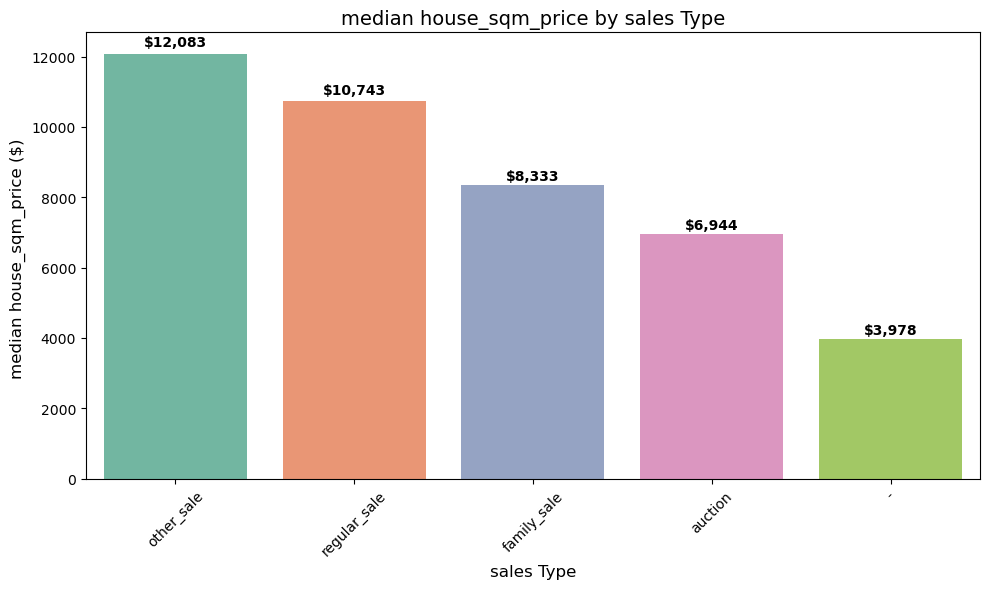

In [86]:
for title, df in dataframes:
    print(title)
    # Group data by 'sales_type' and calculate the median of 'house_sqm_price'
    grouped_data = df.groupby('sales_type')['house_sqm_price'].median().reset_index()

    # Sort values by 'house_sqm_price' in descending order
    grouped_data = grouped_data.sort_values(by='house_sqm_price', ascending=False)

    # Plot the data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='sales_type', y='house_sqm_price', palette='Set2', order=grouped_data['sales_type'])

    # Add data labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + height * 0.01, 
            f"${height:,.0f}",  # Format with commas and no decimals
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold"
        )

    # Customize plot appearance
    plt.title('median house_sqm_price by sales Type', fontsize=14)
    plt.xlabel('sales Type', fontsize=12)
    plt.ylabel('median house_sqm_price ($) ', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

In [102]:
farms_after_1800.to_csv('Farms Built From 1800 Onward.csv', index=False)
farms_before_1800.to_csv('Farms Built Before 1800.csv', index=False)
non_farms_after_1900.to_csv('Non-Farms Built From 1900 Onward.csv', index=False)
non_farms_before_1900.to_csv('Non-Farms Built Before 1900.csv', index=False)